# alpha beta gamma

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Flatten,Dense,Activation
from keras.optimizers import Adam


2024-01-08 09:48:48.004779: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-08 09:48:48.004804: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-08 09:48:48.004821: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-08 09:48:48.009584: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-08 09:48:48.632201: W tensorflow/compiler/

In [2]:
import numpy as np
from mealpy.optimizer import Optimizer
# from mealpy.optimizer import Optimizer

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
# data = pd.read_csv("/home3/222it022/majorcode/major_dataset/data_arc.csv",sep= ',')
from scipy.io import arff
import pandas as pd

df= arff.loadarff('/home/student/major_code/MDP/KC1.arff')
data = pd.DataFrame(df[0])


originalfeatures= data.columns
print('original features len', len(originalfeatures))
print('original features', (originalfeatures))
print(data.head())

original features len 22
original features Index(['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS',
       'CYCLOMATIC_COMPLEXITY', 'DESIGN_COMPLEXITY', 'ESSENTIAL_COMPLEXITY',
       'LOC_EXECUTABLE', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY',
       'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH',
       'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME',
       'NUM_OPERANDS', 'NUM_OPERATORS', 'NUM_UNIQUE_OPERANDS',
       'NUM_UNIQUE_OPERATORS', 'LOC_TOTAL', 'Defective'],
      dtype='object')
   LOC_BLANK  BRANCH_COUNT  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0        0.0           1.0                   0.0           0.0   
1        0.0           1.0                   0.0           0.0   
2        0.0           1.0                   0.0           0.0   
3        0.0           1.0                   0.0           0.0   
4        2.0           1.0                   0.0           0.0   

   CYCLOMATIC_COMPLEXITY  DESIGN_COMPLEXITY  ESSENTIAL_COMPLEXI

In [5]:
def map_to_int(value):
    if value == b'Y':
        return 1
    elif value == b'N':
        return 0
    else:
        return None

# Apply the mapping function to the 'object_column' and create a new column 'integer_column'
data['Defective'] = data['Defective'].apply(map_to_int)

In [6]:
X=data.drop(labels=['Defective'], axis=1)
y=data['Defective']

In [7]:
#check for non-numeric value in each column

for column in data.columns:
    numeric_column = pd.to_numeric(data[column], errors='coerce')
    non_numeric_indices = pd.isna(numeric_column)
    
    if non_numeric_indices.any():
        print(f"Column '{column}' contains non-numeric values at indices: {non_numeric_indices[non_numeric_indices].index.tolist()}")
    else:
        print(f"Column '{column}' contains only numeric values.")

Column 'LOC_BLANK' contains only numeric values.
Column 'BRANCH_COUNT' contains only numeric values.
Column 'LOC_CODE_AND_COMMENT' contains only numeric values.
Column 'LOC_COMMENTS' contains only numeric values.
Column 'CYCLOMATIC_COMPLEXITY' contains only numeric values.
Column 'DESIGN_COMPLEXITY' contains only numeric values.
Column 'ESSENTIAL_COMPLEXITY' contains only numeric values.
Column 'LOC_EXECUTABLE' contains only numeric values.
Column 'HALSTEAD_CONTENT' contains only numeric values.
Column 'HALSTEAD_DIFFICULTY' contains only numeric values.
Column 'HALSTEAD_EFFORT' contains only numeric values.
Column 'HALSTEAD_ERROR_EST' contains only numeric values.
Column 'HALSTEAD_LENGTH' contains only numeric values.
Column 'HALSTEAD_LEVEL' contains only numeric values.
Column 'HALSTEAD_PROG_TIME' contains only numeric values.
Column 'HALSTEAD_VOLUME' contains only numeric values.
Column 'NUM_OPERANDS' contains only numeric values.
Column 'NUM_OPERATORS' contains only numeric values.


mean_col1 = data['col1'].mean()
data['col1'].fillna(mean_col1, inplace=True)
data['']

In [8]:
data.describe()

LOC_BLANK  BRANCH_COUNT  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
count  2107.000000   2107.000000           2107.000000    2107.00000   
mean      1.759848      4.669198              0.131467       0.94542   
std       3.858642      7.795171              0.702926       3.08665   
min       0.000000      1.000000              0.000000       0.00000   
25%       0.000000      1.000000              0.000000       0.00000   
50%       0.000000      1.000000              0.000000       0.00000   
75%       2.000000      5.000000              0.000000       0.00000   
max      58.000000     89.000000             12.000000      44.00000   

       CYCLOMATIC_COMPLEXITY  DESIGN_COMPLEXITY  ESSENTIAL_COMPLEXITY  \
count            2107.000000        2107.000000           2107.000000   
mean                2.839582           2.547698              1.674893   
std                 3.902283           3.377201              2.201646   
min                 1.000000           1.000000              1.000000   
25%                 1.000000           1.000000              1.000000   
50%                 1.000000           1.000000              1.000000   
75%                 3.000000           3.000000              1.000000   
max                45.000000          45.000000             26.000000   

       LOC_EXECUTABLE  HALSTEAD_CONTENT  HALSTEAD_DIFFICULTY  ...  \
count     2107.000000       2107.000000          2107.000000  ...   
mean        14.537731         21.259141             6.776578  ...   
std         24.196447         21.501653             7.865468  ...   
min          0.000000          0.000000             0.000000  ...   
25%          0.000000          5.330000             1.500000  ...   
50%          5.000000         14.400000             3.500000  ...   
75%         17.000000         29.850000             9.230000  ...   
max        262.000000        193.060000            53.750000  ...   

       HALSTEAD_LENGTH  HALSTEAD_LEVEL  HALSTEAD_PROG_TIME  HALSTEAD_VOLUME  \
count      2107.000000     2107.000000         2107.000000      2107.000000   
mean         49.875653        0.318794          291.520403       258.941187   
std          83.626094        0.316111          969.583992       516.501678   
min           0.000000        0.000000            0.000000         0.000000   
25%           4.000000        0.080000            0.670000         8.000000   
50%          16.000000        0.200000           11.890000        57.060000   
75%          58.000000        0.670000          126.575000       265.930000   
max        1106.000000        2.000000        18044.640000      7918.820000   

       NUM_OPERANDS  NUM_OPERATORS  NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS  \
count   2107.000000    2107.000000          2107.000000           2107.000000   
mean      18.803512      31.072140             9.545325              7.637874   
std       32.084991      51.792408            12.198742              5.729528   
min        0.000000       0.000000             0.000000              0.000000   
25%        1.000000       3.000000             1.000000              3.000000   
50%        6.000000      10.000000             5.000000              6.000000   
75%       22.000000      36.000000            13.000000             11.000000   
max      428.000000     678.000000           120.000000             37.000000   

         LOC_TOTAL    Defective  
count  2107.000000  2107.000000  
mean     20.390603     0.154248  
std      29.762606     0.361272  
min       1.000000     0.000000  
25%       3.000000     0.000000  
50%       9.000000     0.000000  
75%      24.000000     0.000000  
max     288.000000     1.000000  

[8 rows x 22 columns]

In [9]:
import numpy as np
import pandas as pd

def find_outliers_IQR(df, column_name):
    """
    Identify and replace outliers in a specified column using the IQR method.

    Parameters:
    - df: pandas DataFrame
        The DataFrame containing the data.
    - column_name: str
        The name of the column for which outliers should be identified and replaced.

    Returns:
    - df: pandas DataFrame
        The DataFrame with outliers replaced in the specified column.
    """

    # Calculate the upper and lower limits
    upper_limit = df[column_name].mean() + 3 * df[column_name].std()
    lower_limit = df[column_name].mean() - 3 * df[column_name].std()

    # Replace outliers with the upper or lower limit
    df[column_name] = np.where(df[column_name] > upper_limit, upper_limit,
                               np.where(df[column_name] < lower_limit, lower_limit, df[column_name]))

    return df

# Example usage:
# Assuming 'data' is your DataFrame and 'LOC_BLANK' is the column to process
# data = find_outliers_IQR(data, 'LOC_BLANK')


In [10]:
import pandas as pd

# Assuming you have a DataFrame named 'data'
# You may need to import the find_outliers_IQR function from the previous response

def find_outliers_for_all_columns(df):
    """
    Identify and replace outliers in all columns of a DataFrame using the IQR method.

    Parameters:
    - df: pandas DataFrame
        The DataFrame containing the data.

    Returns:
    - df: pandas DataFrame
        The DataFrame with outliers replaced in all columns.
    """
    for column in df.columns:
        df = find_outliers_IQR(df, column)
    
    return df

# Example usage:
X = find_outliers_for_all_columns(X)
X.describe()

LOC_BLANK  BRANCH_COUNT  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
count  2107.000000   2107.000000           2107.000000   2107.000000   
mean      1.598693      4.359809              0.094659      0.791372   
std       2.944458      6.272314              0.401031      2.033852   
min       0.000000      1.000000              0.000000      0.000000   
25%       0.000000      1.000000              0.000000      0.000000   
50%       0.000000      1.000000              0.000000      0.000000   
75%       2.000000      5.000000              0.000000      0.000000   
max      13.335774     28.054710              2.240243     10.205370   

       CYCLOMATIC_COMPLEXITY  DESIGN_COMPLEXITY  ESSENTIAL_COMPLEXITY  \
count            2107.000000        2107.000000           2107.000000   
mean                2.687259           2.421642              1.572639   
std                 3.150734           2.726986              1.651048   
min                 1.000000           1.000000              1.000000   
25%                 1.000000           1.000000              1.000000   
50%                 1.000000           1.000000              1.000000   
75%                 3.000000           3.000000              1.000000   
max                14.546432          12.679301              8.279832   

       LOC_EXECUTABLE  HALSTEAD_CONTENT  HALSTEAD_DIFFICULTY  ...  \
count     2107.000000       2107.000000          2107.000000  ...   
mean        13.761975         20.841250             6.609793  ...   
std         20.329989         19.635020             7.201067  ...   
min          0.000000          0.000000             0.000000  ...   
25%          0.000000          5.330000             1.500000  ...   
50%          5.000000         14.400000             3.500000  ...   
75%         17.000000         29.850000             9.230000  ...   
max         87.127074         85.764101            30.372982  ...   

       HALSTEAD_ERROR_EST  HALSTEAD_LENGTH  HALSTEAD_LEVEL  \
count         2107.000000      2107.000000     2107.000000   
mean             0.078992        47.002711        0.311998   
std              0.135348        69.146809        0.286501   
min              0.000000         0.000000        0.000000   
25%              0.000000         4.000000        0.080000   
50%              0.020000        16.000000        0.200000   
75%              0.090000        58.000000        0.670000   
max              0.603051       300.753934        1.267127   

       HALSTEAD_PROG_TIME  HALSTEAD_VOLUME  NUM_OPERANDS  NUM_OPERATORS  \
count         2107.000000      2107.000000   2107.000000    2107.000000   
mean           242.511979       238.684878     17.672568      29.326443   
std            611.120553       404.800636     26.420558      42.921595   
min              0.000000         0.000000      0.000000       0.000000   
25%              0.670000         8.000000      1.000000       3.000000   
50%             11.890000        57.060000      6.000000      10.000000   
75%            126.575000       265.930000     22.000000      36.000000   
max           3200.272379      1808.446220    115.058485     186.449363   

       NUM_UNIQUE_OPERANDS  NUM_UNIQUE_OPERATORS    LOC_TOTAL  
count          2107.000000           2107.000000  2107.000000  
mean              9.270093              7.602427    19.368275  
std              11.024762              5.605818    24.797631  
min               0.000000              0.000000     1.000000  
25%               1.000000              3.000000     3.000000  
50%               5.000000              6.000000     9.000000  
75%              13.000000             11.000000    24.000000  
max              46.141552             24.826458   109.678420  

[8 rows x 21 columns]

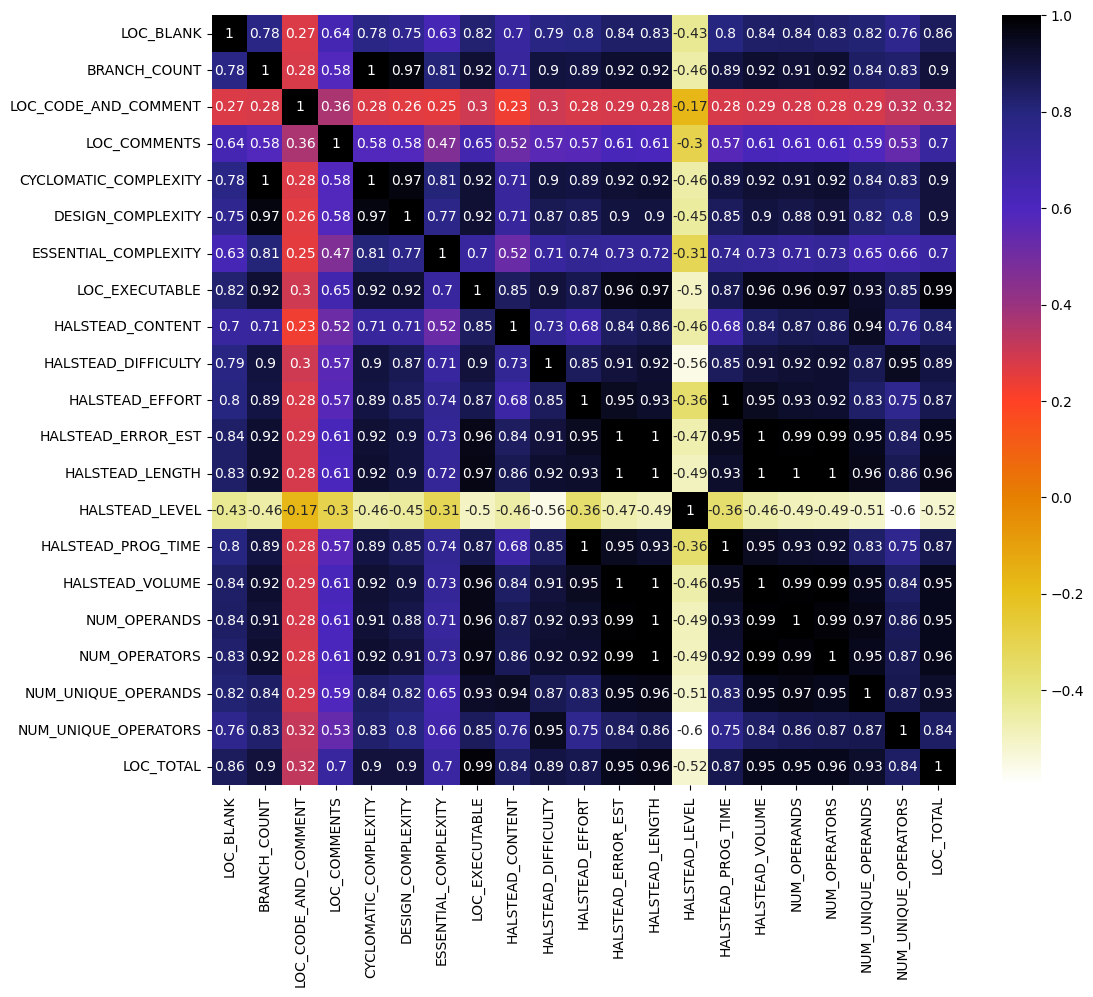

In [11]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [12]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, 0.97)
print(len(set(corr_features)))
print(corr_features)

7
{'NUM_OPERATORS', 'HALSTEAD_VOLUME', 'CYCLOMATIC_COMPLEXITY', 'HALSTEAD_PROG_TIME', 'NUM_OPERANDS', 'HALSTEAD_LENGTH', 'LOC_TOTAL'}


In [13]:
X=X.drop(['NUM_OPERATORS', 'HALSTEAD_VOLUME', 'NUM_OPERANDS', 'HALSTEAD_LENGTH', 'HALSTEAD_PROG_TIME', 'LOC_TOTAL', 'CYCLOMATIC_COMPLEXITY'],axis=1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
trans = MinMaxScaler()
X = trans.fit_transform(X)
# # convert the array back to a dataframe
X = DataFrame(X)
# summarize
print(X.describe())

                0            1            2            3            4   \
count  2107.000000  2107.000000  2107.000000  2107.000000  2107.000000   
mean      0.119880     0.124186     0.042254     0.077545     0.121723   
std       0.220794     0.231838     0.179012     0.199292     0.233489   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.149973     0.147849     0.000000     0.000000     0.171243   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7            8            9   \
count  2107.000000  2107.000000  2107.000000  2107.000000  2107.000000   
mean      0.078661     0.157953     0.243007     0.217621     0.075778   
std       0.226798     0.233337     0.228942     0.237088     0.190959   
min       0.000000     0.000000     0

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state = 100)

In [16]:
i= X_train.shape[1]

In [17]:
i

14

In [18]:
from mealpy import FloatVar
def fitness_function(position):
    learningrate,n1,n2,batch_size,epochs,_,_,_ = position
    n1,n2,batch_size,epochs=int(n1),int(n2),int(batch_size),int(epochs)
    print(learningrate,n1,n2,batch_size,epochs)
    classifier = Sequential()
    classifier.add(Dense(n1, activation='relu', kernel_initializer='glorot_uniform',input_dim=i))
    classifier.add(Dense(n2, activation='relu', kernel_initializer='glorot_uniform'))
    # classifier.add(Dense(n3, activation='relu', kernel_initializer='glorot_uniform'))
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
    opt = Adam(learning_rate=learningrate)
    classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])


    history = classifier.fit(X_train,y_train, epochs=int(epochs),batch_size=batch_size, validation_data=(X_test, y_test))
    return history.history['val_accuracy'][-1]

In [19]:
#!/usr/bin/env python
# Created by "Thieu" at 14:53, 17/03/2020 ----------%
#       Email: nguyenthieu2102@gmail.com            %
#       Github: https://github.com/thieu1995        %
# --------------------------------------------------%

import numpy as np
from mealpy.optimizer import Optimizer


class OriginalGOA(Optimizer):
    """
    The original version of: Grasshopper Optimization Algorithm (GOA)

    Links:
        1. https://dx.doi.org/10.1016/j.advengsoft.2017.01.004
        2. https://www.mathworks.com/matlabcentral/fileexchange/61421-grasshopper-optimisation-algorithm-goa

    Hyper-parameters should fine-tune in approximate range to get faster convergence toward the global optimum:
        + c_min (float): coefficient c min, default = 0.00004
        + c_max (float): coefficient c max, default = 2.0

    Examples
    ~~~~~~~~
    >>> import numpy as np
    >>> from mealpy import FloatVar, GOA
    >>>
    >>> def objective_function(solution):
    >>>     return np.sum(solution**2)
    >>>
    >>> problem_dict = {
    >>>     "bounds": FloatVar(n_vars=30, lb=(-10.,) * 30, ub=(10.,) * 30, name="delta"),
    >>>     "minmax": "min",
    >>>     "obj_func": objective_function
    >>> }
    >>>
    >>> model = GOA.OriginalGOA(epoch=1000, pop_size=50, c_min = 0.00004, c_max = 1.0)
    >>> g_best = model.solve(problem_dict)
    >>> print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
    >>> print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")

    References
    ~~~~~~~~~~
    [1] Saremi, S., Mirjalili, S. and Lewis, A., 2017. Grasshopper optimisation algorithm:
    theory and application. Advances in Engineering Software, 105, pp.30-47.
    """

    def __init__(self, epoch: int = 10000, pop_size: int = 100, c_min: float = 0.00004, c_max: float = 2.0, **kwargs: object) -> None:
        """
        Args:
            epoch (int): maximum number of iterations, default = 10000
            pop_size (int): number of population size, default = 100
            c_min (float): coefficient c min, default=0.00004
            c_max (float): coefficient c max, default=2.0
        """
        super().__init__(**kwargs)
        self.epoch = self.validator.check_int("epoch", epoch, [1, 100000])
        self.pop_size = self.validator.check_int("pop_size", pop_size, [5, 10000])
        self.c_min = self.validator.check_float("c_min", c_min, [0.00001, 0.2])
        self.c_max = self.validator.check_float("c_max", c_max, [0.2, 5.0])
        self.set_parameters(["epoch", "pop_size", "c_min", "c_max"])
        self.sort_flag = False

    def s_function__(self, r_vector=None):
        f = 0.5
        l = 1.5
        # Eq.(2.3) in the paper
        return f * np.exp(-r_vector / l) - np.exp(-r_vector)

    def evolve(self, epoch):
        """
        The main operations (equations) of algorithm. Inherit from Optimizer class

        Args:
            epoch (int): The current iteration
        """
        # Eq.(2.8) in the paper
        c = self.c_max - epoch * ((self.c_max - self.c_min) / self.epoch)
        pop_new = []
        for idx in range(0, self.pop_size):
            S_i_total = np.zeros(self.problem.n_dims)
            for j in range(0, self.pop_size):
                dist = np.sqrt(np.sum((self.pop[idx].solution - self.pop[j].solution) ** 2))
                r_ij_vector = (self.pop[idx].solution - self.pop[j].solution) / (dist + self.EPSILON)  # xj - xi / dij in Eq.(2.7)
                xj_xi = 2 + np.remainder(dist, 2)  # |xjd - xid| in Eq. (2.7)
                ## The first part inside the big bracket in Eq. (2.7)   16 955 230 764    212 047 193 643
                ran = (c / 2) * (self.problem.ub - self.problem.lb)
                s_ij = ran * self.s_function__(xj_xi) * r_ij_vector
                S_i_total += s_ij
            x_new = c * self.generator.normal(0, 1, self.problem.n_dims) * S_i_total + self.g_best.solution  # Eq. (2.7) in the paper
            pos_new = self.correct_solution(x_new)
            agent = self.generate_empty_agent(pos_new)
            pop_new.append(agent)
            if self.mode not in self.AVAILABLE_MODES:
                agent.target = self.get_target(pos_new)
                self.pop[idx] = self.get_better_agent(agent, self.pop[idx], self.problem.minmax)
        if self.mode in self.AVAILABLE_MODES:
            pop_new = self.update_target_for_population(pop_new)
            self.pop = self.greedy_selection_population(self.pop, pop_new, self.problem.minmax)


from mealpy import FloatVar

problem_dict = {
    "bounds": FloatVar( lb=(0.001,8,6, 4, 10,1,1,1) , ub=(0.1, 10,10, 32,50,1,1,1) , name="delta"),
         "minmax": "max",
       "obj_func": fitness_function     }
model = OriginalGOA(epoch=100, pop_size=10)
g_best = model.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")

0.08594131644987789 8 6 22 39
Epoch 1/39
67/67 [==============================] - 1s 3ms/step - loss: 0.3957 - accuracy: 0.8338 - val_loss: 0.3607 - val_accuracy: 0.8468
Epoch 2/39
67/67 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8453 - val_loss: 0.3662 - val_accuracy: 0.8468
Epoch 3/39
67/67 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8453 - val_loss: 0.3807 - val_accuracy: 0.8468
Epoch 4/39
67/67 [==============================] - 0s 1ms/step - loss: 0.3660 - accuracy: 0.8453 - val_loss: 0.3626 - val_accuracy: 0.8468
Epoch 5/39
67/67 [==============================] - 0s 1ms/step - loss: 0.3637 - accuracy: 0.8453 - val_loss: 0.3625 - val_accuracy: 0.8468
Epoch 6/39
67/67 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.8453 - val_loss: 0.3673 - val_accuracy: 0.8468
Epoch 7/39
67/67 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8453 - val_loss: 0.3624 - val_accurac

2024/01/08 09:49:03 AM, INFO, __main__.OriginalGOA: Solving single objective optimization problem.


0.06416021409479832 9 8 27 45
Epoch 1/45
55/55 [==============================] - 1s 3ms/step - loss: 0.4143 - accuracy: 0.8297 - val_loss: 0.3558 - val_accuracy: 0.8468
Epoch 2/45
55/55 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8453 - val_loss: 0.3596 - val_accuracy: 0.8468
Epoch 3/45
55/55 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.8453 - val_loss: 0.3712 - val_accuracy: 0.8468
Epoch 4/45
55/55 [==============================] - 0s 1ms/step - loss: 0.3692 - accuracy: 0.8453 - val_loss: 0.3633 - val_accuracy: 0.8468
Epoch 5/45
55/55 [==============================] - 0s 2ms/step - loss: 0.3690 - accuracy: 0.8453 - val_loss: 0.3556 - val_accuracy: 0.8468
Epoch 6/45
55/55 [==============================] - 0s 1ms/step - loss: 0.3621 - accuracy: 0.8453 - val_loss: 0.3556 - val_accuracy: 0.8468
Epoch 7/45
55/55 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8453 - val_loss: 0.3558 - val_accurac

KeyboardInterrupt: 

In [20]:
#!/usr/bin/env python
# Created by "Thieu" at 14:53, 17/03/2020 ----------%
#       Email: nguyenthieu2102@gmail.com            %
#       Github: https://github.com/thieu1995        %
# --------------------------------------------------%

import numpy as np
from mealpy.optimizer import Optimizer
from math import gamma


class HybridGOA(Optimizer):
    """
    The original version of: Grasshopper Optimization Algorithm (GOA)

    Links:
        1. https://dx.doi.org/10.1016/j.advengsoft.2017.01.004
        2. https://www.mathworks.com/matlabcentral/fileexchange/61421-grasshopper-optimisation-algorithm-goa

    Hyper-parameters should fine-tune in approximate range to get faster convergence toward the global optimum:
        + c_min (float): coefficient c min, default = 0.00004
        + c_max (float): coefficient c max, default = 2.0

    Examples
    ~~~~~~~~
    >>> import numpy as np
    >>> from mealpy import FloatVar, GOA
    >>>
    >>> def objective_function(solution):
    >>>     return np.sum(solution**2)
    >>>
    >>> problem_dict = {
    >>>     "bounds": FloatVar(n_vars=30, lb=(-10.,) * 30, ub=(10.,) * 30, name="delta"),
    >>>     "minmax": "min",
    >>>     "obj_func": objective_function
    >>> }
    >>>
    >>> model = GOA.OriginalGOA(epoch=1000, pop_size=50, c_min = 0.00004, c_max = 1.0)
    >>> g_best = model.solve(problem_dict)
    >>> print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
    >>> print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")

    References
    ~~~~~~~~~~
    [1] Saremi, S., Mirjalili, S. and Lewis, A., 2017. Grasshopper optimisation algorithm:
    theory and application. Advances in Engineering Software, 105, pp.30-47.
    """

    def __init__(self, epoch: int = 10000, pop_size: int = 100, c_min: float = 0.00004,n=2, c_max: float = 2.0, ST: float = 0.8, PD: float = 0.2, SD: float = 0.1,**kwargs: object) -> None:
        """
        Args:
            epoch (int): maximum number of iterations, default = 10000
            pop_size (int): number of population size, default = 100
            c_min (float): coefficient c min, default=0.00004
            c_max (float): coefficient c max, default=2.0
        """
        super().__init__(**kwargs)
        self.epoch = self.validator.check_int("epoch", epoch, [1, 100000])
        self.pop_size = self.validator.check_int("pop_size", pop_size, [5, 10000])
        self.c_min = self.validator.check_float("c_min", c_min, [0.00001, 0.2])
        self.c_max = self.validator.check_float("c_max", c_max, [0.2, 5.0])
        self.set_parameters(["epoch", "pop_size", "c_min", "c_max"])
        self.sort_flag = False
        self.beta=1.5
        self.ST = self.validator.check_float("ST", ST, (0, 1.0))
        self.PD = self.validator.check_float("PD", PD, (0, 1.0))
        self.SD = self.validator.check_float("SD", SD, (0, 1.0))
        self.set_parameters(["epoch", "pop_size", "ST", "PD", "SD"])
        self.n1 = int(self.PD * self.pop_size)
        self.n2 = int(self.SD * self.pop_size)
        self.n= n
        self.sort_flag = True

    def s_function__(self, r_vector=None):
        f = 0.5
        l = 1.5
        # Eq.(2.3) in the paper
        return f * np.exp(-r_vector / l) - np.exp(-r_vector)

    def evolve(self, epoch):
        """
        The main operations (equations) of algorithm. Inherit from Optimizer class

        Args:
            epoch (int): The current iteration
        """
        # Eq.(2.8) in the paper
        c = self.c_max - epoch * ((self.c_max - self.c_min) / self.epoch)
        
        pop_new = []
        num = gamma(1+self.beta)*np.sin(np.pi*self.beta/2)
        den = gamma((1+self.beta)/2)*self.beta*(2**((self.beta-1)/2))
        σu = (num/den)**(1/self.beta)
        σv = 1
        u = np.random.normal(0, σu, self.problem.n_dims)
        v = np.random.normal(0, σv, self.problem.n_dims)
        levy = u/(np.abs(v)**(1/self.beta))
        g=0.9
        r2 = self.generator.uniform() 
        for idx in range(0, self.pop_size):
            if np.random.rand()<0.5:
                
                S_i_total = np.zeros(self.problem.n_dims)
                for j in range(0, self.pop_size):
                    dist = np.sqrt(np.sum((self.pop[idx].solution - self.pop[j].solution) ** 2))
                    r_ij_vector = (self.pop[idx].solution - self.pop[j].solution) / (dist + self.EPSILON)  # xj - xi / dij in Eq.(2.7)
                    xj_xi = 2 + np.remainder(dist, 2)  # |xjd - xid| in Eq. (2.7)
                    ## The first part inside the big bracket in Eq. (2.7)   16 955 230 764    212 047 193 643
                    ran = (c / 2) * (self.problem.ub - self.problem.lb)
                    s_ij = ran * self.s_function__(xj_xi) * r_ij_vector
                    G= g*r_ij_vector
                    S_i_total = S_i_total+s_ij-G
                x_new = (levy* c) * self.generator.normal(0, 1, self.problem.n_dims) * S_i_total + self.g_best.solution  # Eq. (2.7) in the paper g_best- T_d
            else:
                # Using equation (3) update the sparrow’s location;
                if idx < self.n1:
                    if r2 < self.ST:
                        des = (idx + 1) / (self.generator.uniform() * self.epoch + self.EPSILON)
                        if des > 5:
                            des = self.generator.uniform()
                        x_new = self.pop[idx].solution * np.exp(des)
                    else:
                        x_new = self.pop[idx].solution + self.generator.normal() * np.ones(self.problem.n_dims)
                else:
                    # Using equation (4) update the sparrow’s location;
                    _, x_p, worst = self.get_special_agents(self.pop, n_best=1, n_worst=1, minmax=self.problem.minmax)
                    g_best, g_worst = x_p[0], worst[0]
                    if idx > int(self.pop_size / 2):
                        x_new = self.generator.normal() * np.exp((g_worst.solution - self.pop[idx].solution) / (idx + 1) ** 2)
                    else:
                        L = np.ones((1, self.problem.n_dims))
                        A = np.sign(self.generator.uniform(-1, 1, (1, self.problem.n_dims)))
                        A1 = A.T * np.linalg.inv(np.matmul(A, A.T)) * L
                        x_new = g_best.solution + np.matmul(np.abs(self.pop[idx].solution - g_best.solution), A1)
                
            pos_new = self.correct_solution(x_new)
            agent = self.generate_empty_agent(pos_new)
            pop_new.append(agent)
            if self.mode not in self.AVAILABLE_MODES:
                agent.target = self.get_target(pos_new)
                self.pop[idx] = self.get_better_agent(agent, self.pop[idx], self.problem.minmax)
        if self.mode in self.AVAILABLE_MODES:
            pop_new = self.update_target_for_population(pop_new)
            self.pop = self.greedy_selection_population(self.pop, pop_new, self.problem.minmax)


from mealpy import FloatVar

problem_dict = {
    "bounds": FloatVar( lb=(0.001,8,6, 4, 10,1,1,1) , ub=(0.1, 10,10, 32,50,1,1,1) , name="delta"),
         "minmax": "max",
       "obj_func": fitness_function     }

model = HybridGOA(epoch=100, pop_size=10)
g_best = model.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")

0.07665906746628122 8 8 23 27
Epoch 1/27
65/65 [==============================] - 1s 3ms/step - loss: 0.4133 - accuracy: 0.8399 - val_loss: 0.3579 - val_accuracy: 0.8468
Epoch 2/27
65/65 [==============================] - 0s 1ms/step - loss: 0.3791 - accuracy: 0.8453 - val_loss: 0.3549 - val_accuracy: 0.8468
Epoch 3/27
65/65 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8453 - val_loss: 0.3635 - val_accuracy: 0.8468
Epoch 4/27
65/65 [==============================] - 0s 2ms/step - loss: 0.3664 - accuracy: 0.8453 - val_loss: 0.3610 - val_accuracy: 0.8468
Epoch 5/27
65/65 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8453 - val_loss: 0.3639 - val_accuracy: 0.8468
Epoch 6/27
65/65 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8453 - val_loss: 0.3589 - val_accuracy: 0.8468
Epoch 7/27
65/65 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8433 - val_loss: 0.3617 - val_accurac

2024/01/08 09:49:25 AM, INFO, __main__.HybridGOA: Solving single objective optimization problem.


0.05177161331514292 9 7 18 22
Epoch 1/22
82/82 [==============================] - 1s 2ms/step - loss: 0.3849 - accuracy: 0.8453 - val_loss: 0.3603 - val_accuracy: 0.8468
Epoch 2/22
82/82 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8453 - val_loss: 0.3551 - val_accuracy: 0.8468
Epoch 3/22
82/82 [==============================] - 0s 1ms/step - loss: 0.3598 - accuracy: 0.8453 - val_loss: 0.3511 - val_accuracy: 0.8468
Epoch 4/22
82/82 [==============================] - 0s 1ms/step - loss: 0.3663 - accuracy: 0.8453 - val_loss: 0.3594 - val_accuracy: 0.8468
Epoch 5/22
82/82 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8453 - val_loss: 0.3628 - val_accuracy: 0.8468
Epoch 6/22
82/82 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8453 - val_loss: 0.3835 - val_accuracy: 0.8468
Epoch 7/22
82/82 [==============================] - 0s 1ms/step - loss: 0.3632 - accuracy: 0.8453 - val_loss: 0.3570 - val_accurac

2024/01/08 09:51:09 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 1, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 60.41143 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.5586 - accuracy: 0.8026 - val_loss: 0.4196 - val_accuracy: 0.8594
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8474 - val_loss: 0.3629 - val_accuracy: 0.8594
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8487 - val_loss: 0.3555 - val_accuracy: 0.8562
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3678 - accuracy: 0.8494 - val_loss: 0.3483 - val_accuracy: 0.8720
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3645 - accuracy: 0.8541 - val_loss: 0.3463 - val_accuracy: 0.8657
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8555 - val_loss: 0.3448 - val_accuracy: 0.8689
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.8562 - val_loss: 0.3448 - val_accuracy

2024/01/08 09:51:59 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 2, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 50.16752 seconds


0.001012519576712801 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.5186 - accuracy: 0.8453 - val_loss: 0.3988 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3823 - accuracy: 0.8453 - val_loss: 0.3534 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3681 - accuracy: 0.8487 - val_loss: 0.3526 - val_accuracy: 0.8547
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3637 - accuracy: 0.8514 - val_loss: 0.3490 - val_accuracy: 0.8531
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3610 - accuracy: 0.8494 - val_loss: 0.3488 - val_accuracy: 0.8531
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3598 - accuracy: 0.8494 - val_loss: 0.3490 - val_accuracy: 0.8594
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8514 - val_loss: 0.3485

2024/01/08 09:52:51 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 3, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 51.60828 seconds


0.006518540170549264 8 6 5 10
Epoch 1/10
295/295 [==============================] - 1s 2ms/step - loss: 0.4286 - accuracy: 0.8338 - val_loss: 0.3544 - val_accuracy: 0.8420
Epoch 2/10
295/295 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8528 - val_loss: 0.3616 - val_accuracy: 0.8499
Epoch 3/10
295/295 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8602 - val_loss: 0.3678 - val_accuracy: 0.8499
Epoch 4/10
295/295 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8535 - val_loss: 0.3605 - val_accuracy: 0.8483
Epoch 5/10
295/295 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.8602 - val_loss: 0.3461 - val_accuracy: 0.8515
Epoch 6/10
295/295 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.8528 - val_loss: 0.3459 - val_accuracy: 0.8594
Epoch 7/10
295/295 [==============================] - 0s 1ms/step - loss: 0.3487 - accuracy: 0.8569 - val_loss: 0.3534

2024/01/08 09:53:40 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 4, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 48.91694 seconds


0.0010560153896561552 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4747 - accuracy: 0.8446 - val_loss: 0.3770 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3756 - accuracy: 0.8474 - val_loss: 0.3478 - val_accuracy: 0.8515
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3609 - accuracy: 0.8569 - val_loss: 0.3502 - val_accuracy: 0.8594
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8528 - val_loss: 0.3467 - val_accuracy: 0.8562
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8548 - val_loss: 0.3470 - val_accuracy: 0.8610
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3551 - accuracy: 0.8575 - val_loss: 0.3482 - val_accuracy: 0.8594
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.8535 - val_loss: 0.361

2024/01/08 09:54:32 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 5, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 51.91139 seconds


0.1 10 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4152 - accuracy: 0.8365 - val_loss: 0.3821 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3931 - accuracy: 0.8453 - val_loss: 0.3601 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3786 - accuracy: 0.8453 - val_loss: 0.3611 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8453 - val_loss: 0.3790 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3961 - accuracy: 0.8453 - val_loss: 0.3769 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8453 - val_loss: 0.3758 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3881 - accuracy: 0.8453 - val_loss: 0.3619 - val_accuracy:

2024/01/08 09:55:25 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 6, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 52.89787 seconds


0.1 9 7 4 11
Epoch 1/11
369/369 [==============================] - 1s 1ms/step - loss: 0.3979 - accuracy: 0.8433 - val_loss: 0.4068 - val_accuracy: 0.8468
Epoch 2/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3892 - accuracy: 0.8453 - val_loss: 0.3607 - val_accuracy: 0.8468
Epoch 3/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3735 - accuracy: 0.8453 - val_loss: 0.3647 - val_accuracy: 0.8468
Epoch 4/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8453 - val_loss: 0.3778 - val_accuracy: 0.8468
Epoch 5/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3869 - accuracy: 0.8453 - val_loss: 0.3667 - val_accuracy: 0.8468
Epoch 6/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8453 - val_loss: 0.3727 - val_accuracy: 0.8468
Epoch 7/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3853 - accuracy: 0.8453 - val_loss: 0.3852 - val_accuracy: 

2024/01/08 09:56:24 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 7, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 58.92465 seconds


0.001010781151229732 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5081 - accuracy: 0.8372 - val_loss: 0.3937 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.8467 - val_loss: 0.3540 - val_accuracy: 0.8515
Epoch 3/10
369/369 [==============================] - 1s 2ms/step - loss: 0.3667 - accuracy: 0.8521 - val_loss: 0.3469 - val_accuracy: 0.8594
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3627 - accuracy: 0.8514 - val_loss: 0.3451 - val_accuracy: 0.8578
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8535 - val_loss: 0.3447 - val_accuracy: 0.8610
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3566 - accuracy: 0.8535 - val_loss: 0.3429 - val_accuracy: 0.8578
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3539 - accuracy: 0.8555 - val_loss: 0.3415

2024/01/08 09:57:23 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 8, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 59.23341 seconds


0.1 8 6 4 11
Epoch 1/11
369/369 [==============================] - 1s 2ms/step - loss: 0.3918 - accuracy: 0.8426 - val_loss: 0.4108 - val_accuracy: 0.8468
Epoch 2/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8453 - val_loss: 0.3709 - val_accuracy: 0.8468
Epoch 3/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3875 - accuracy: 0.8453 - val_loss: 0.3604 - val_accuracy: 0.8468
Epoch 4/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3813 - accuracy: 0.8453 - val_loss: 0.3693 - val_accuracy: 0.8468
Epoch 5/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.8453 - val_loss: 0.3703 - val_accuracy: 0.8468
Epoch 6/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.8453 - val_loss: 0.3820 - val_accuracy: 0.8468
Epoch 7/11
369/369 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8453 - val_loss: 0.3996 - val_accuracy: 

2024/01/08 09:58:18 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 9, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.28204 seconds


0.001 8 6 4 11
Epoch 1/11
369/369 [==============================] - 1s 2ms/step - loss: 0.5619 - accuracy: 0.7626 - val_loss: 0.4213 - val_accuracy: 0.8468
Epoch 2/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.8474 - val_loss: 0.3592 - val_accuracy: 0.8641
Epoch 3/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3680 - accuracy: 0.8535 - val_loss: 0.3496 - val_accuracy: 0.8562
Epoch 4/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3631 - accuracy: 0.8562 - val_loss: 0.3460 - val_accuracy: 0.8594
Epoch 5/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.8575 - val_loss: 0.3436 - val_accuracy: 0.8594
Epoch 6/11
369/369 [==============================] - 1s 1ms/step - loss: 0.3544 - accuracy: 0.8602 - val_loss: 0.3425 - val_accuracy: 0.8610
Epoch 7/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3510 - accuracy: 0.8609 - val_loss: 0.3404 - val_accuracy

2024/01/08 09:59:14 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 10, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.81486 seconds


0.0010114777359263212 8 6 4 10
Epoch 1/10
369/369 [==============================] - 2s 2ms/step - loss: 0.4664 - accuracy: 0.8453 - val_loss: 0.3894 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3743 - accuracy: 0.8453 - val_loss: 0.3660 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3630 - accuracy: 0.8453 - val_loss: 0.3618 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3590 - accuracy: 0.8453 - val_loss: 0.3558 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3566 - accuracy: 0.8453 - val_loss: 0.3555 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3551 - accuracy: 0.8453 - val_loss: 0.3545 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3534 - accuracy: 0.8460 - val_loss: 0.354

2024/01/08 10:01:10 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 11, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 116.05939 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.4885 - accuracy: 0.8433 - val_loss: 0.3789 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8453 - val_loss: 0.3577 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 1s 2ms/step - loss: 0.3666 - accuracy: 0.8453 - val_loss: 0.3530 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3625 - accuracy: 0.8460 - val_loss: 0.3510 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3602 - accuracy: 0.8480 - val_loss: 0.3504 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3602 - accuracy: 0.8487 - val_loss: 0.3481 - val_accuracy: 0.8515
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3577 - accuracy: 0.8521 - val_loss: 0.3463 - val_accuracy

2024/01/08 10:02:06 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 12, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 56.18786 seconds


0.0010014740162860281 8 6 5 10
Epoch 1/10
295/295 [==============================] - 1s 2ms/step - loss: 0.5876 - accuracy: 0.7978 - val_loss: 0.4746 - val_accuracy: 0.8468
Epoch 2/10
295/295 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.8460 - val_loss: 0.3752 - val_accuracy: 0.8483
Epoch 3/10
295/295 [==============================] - 0s 1ms/step - loss: 0.3719 - accuracy: 0.8453 - val_loss: 0.3510 - val_accuracy: 0.8641
Epoch 4/10
295/295 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8501 - val_loss: 0.3454 - val_accuracy: 0.8689
Epoch 5/10
295/295 [==============================] - 0s 1ms/step - loss: 0.3562 - accuracy: 0.8521 - val_loss: 0.3450 - val_accuracy: 0.8673
Epoch 6/10
295/295 [==============================] - 0s 1ms/step - loss: 0.3550 - accuracy: 0.8569 - val_loss: 0.3446 - val_accuracy: 0.8578
Epoch 7/10
295/295 [==============================] - 0s 1ms/step - loss: 0.3529 - accuracy: 0.8521 - val_loss: 0.344

2024/01/08 10:03:04 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 13, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 57.79110 seconds


0.0010222752011270076 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5294 - accuracy: 0.8304 - val_loss: 0.4130 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 0.8446 - val_loss: 0.3660 - val_accuracy: 0.8657
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3725 - accuracy: 0.8507 - val_loss: 0.3578 - val_accuracy: 0.8610
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3659 - accuracy: 0.8474 - val_loss: 0.3542 - val_accuracy: 0.8626
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3609 - accuracy: 0.8535 - val_loss: 0.3518 - val_accuracy: 0.8610
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3586 - accuracy: 0.8541 - val_loss: 0.3515 - val_accuracy: 0.8626
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3552 - accuracy: 0.8507 - val_loss: 0.351

2024/01/08 10:04:02 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 14, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 57.89258 seconds


0.0010110185859659978 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.4912 - accuracy: 0.8453 - val_loss: 0.3997 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 2ms/step - loss: 0.3800 - accuracy: 0.8467 - val_loss: 0.3617 - val_accuracy: 0.8641
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3617 - accuracy: 0.8474 - val_loss: 0.3508 - val_accuracy: 0.8610
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3581 - accuracy: 0.8514 - val_loss: 0.3498 - val_accuracy: 0.8657
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3554 - accuracy: 0.8494 - val_loss: 0.3479 - val_accuracy: 0.8626
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8569 - val_loss: 0.3481 - val_accuracy: 0.8610
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3522 - accuracy: 0.8528 - val_loss: 0.346

2024/01/08 10:05:01 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 15, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 59.57500 seconds


0.1 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.4122 - accuracy: 0.8440 - val_loss: 0.3586 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3820 - accuracy: 0.8453 - val_loss: 0.5619 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4001 - accuracy: 0.8379 - val_loss: 0.3719 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8453 - val_loss: 0.4053 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3855 - accuracy: 0.8453 - val_loss: 0.3632 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3808 - accuracy: 0.8453 - val_loss: 0.3808 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3851 - accuracy: 0.8453 - val_loss: 0.3715 - val_accuracy: 

2024/01/08 10:05:57 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 16, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.49099 seconds


0.001013305604077633 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5949 - accuracy: 0.8175 - val_loss: 0.4887 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.8453 - val_loss: 0.4013 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3888 - accuracy: 0.8453 - val_loss: 0.3674 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3671 - accuracy: 0.8480 - val_loss: 0.3533 - val_accuracy: 0.8531
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3610 - accuracy: 0.8494 - val_loss: 0.3504 - val_accuracy: 0.8515
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3580 - accuracy: 0.8575 - val_loss: 0.3490 - val_accuracy: 0.8610
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3560 - accuracy: 0.8562 - val_loss: 0.3481

2024/01/08 10:06:54 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 17, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 56.61676 seconds


0.1 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.4004 - accuracy: 0.8433 - val_loss: 0.3719 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.8453 - val_loss: 0.3689 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3919 - accuracy: 0.8453 - val_loss: 0.3652 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3852 - accuracy: 0.8453 - val_loss: 0.3615 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3813 - accuracy: 0.8453 - val_loss: 0.3661 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3829 - accuracy: 0.8453 - val_loss: 0.3669 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3816 - accuracy: 0.8453 - val_loss: 0.3626 - val_accuracy: 

2024/01/08 10:07:54 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 18, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 60.85192 seconds


0.001019904042205312 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5188 - accuracy: 0.8446 - val_loss: 0.4262 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3991 - accuracy: 0.8453 - val_loss: 0.3726 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 1s 2ms/step - loss: 0.3739 - accuracy: 0.8453 - val_loss: 0.3617 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 0.8440 - val_loss: 0.3581 - val_accuracy: 0.8531
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8474 - val_loss: 0.3558 - val_accuracy: 0.8483
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3641 - accuracy: 0.8487 - val_loss: 0.3564 - val_accuracy: 0.8531
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3621 - accuracy: 0.8555 - val_loss: 0.3534

2024/01/08 10:08:51 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 19, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 56.74546 seconds


0.0010127900085814072 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5566 - accuracy: 0.8121 - val_loss: 0.4106 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3829 - accuracy: 0.8501 - val_loss: 0.3599 - val_accuracy: 0.8641
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3653 - accuracy: 0.8474 - val_loss: 0.3497 - val_accuracy: 0.8641
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3601 - accuracy: 0.8507 - val_loss: 0.3474 - val_accuracy: 0.8594
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3559 - accuracy: 0.8507 - val_loss: 0.3497 - val_accuracy: 0.8610
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8616 - val_loss: 0.3473 - val_accuracy: 0.8594
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.8582 - val_loss: 0.347

2024/01/08 10:09:47 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 20, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 56.26036 seconds


0.001013546541492039 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5470 - accuracy: 0.8250 - val_loss: 0.4321 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3916 - accuracy: 0.8460 - val_loss: 0.3606 - val_accuracy: 0.8610
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3671 - accuracy: 0.8535 - val_loss: 0.3523 - val_accuracy: 0.8641
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3601 - accuracy: 0.8575 - val_loss: 0.3485 - val_accuracy: 0.8673
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8602 - val_loss: 0.3502 - val_accuracy: 0.8610
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3552 - accuracy: 0.8596 - val_loss: 0.3487 - val_accuracy: 0.8657
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.8616 - val_loss: 0.3467

2024/01/08 10:10:44 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 21, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 56.21322 seconds


0.0011063522758418855 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5212 - accuracy: 0.8256 - val_loss: 0.3878 - val_accuracy: 0.8483
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3745 - accuracy: 0.8453 - val_loss: 0.3565 - val_accuracy: 0.8657
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8569 - val_loss: 0.3506 - val_accuracy: 0.8689
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8535 - val_loss: 0.3490 - val_accuracy: 0.8626
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3542 - accuracy: 0.8569 - val_loss: 0.3474 - val_accuracy: 0.8610
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3519 - accuracy: 0.8541 - val_loss: 0.3467 - val_accuracy: 0.8594
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8569 - val_loss: 0.346

2024/01/08 10:11:42 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 22, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 58.62422 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5380 - accuracy: 0.8148 - val_loss: 0.4056 - val_accuracy: 0.8483
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3751 - accuracy: 0.8528 - val_loss: 0.3632 - val_accuracy: 0.8594
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3611 - accuracy: 0.8514 - val_loss: 0.3566 - val_accuracy: 0.8594
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8528 - val_loss: 0.3579 - val_accuracy: 0.8562
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8528 - val_loss: 0.3536 - val_accuracy: 0.8594
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3536 - accuracy: 0.8548 - val_loss: 0.3538 - val_accuracy: 0.8547
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.8535 - val_loss: 0.3523 - val_accuracy

2024/01/08 10:12:37 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 23, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.62349 seconds


0.0010179162759989253 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.5800 - accuracy: 0.8053 - val_loss: 0.4680 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.4082 - accuracy: 0.8453 - val_loss: 0.3638 - val_accuracy: 0.8436
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3656 - accuracy: 0.8480 - val_loss: 0.3497 - val_accuracy: 0.8594
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8521 - val_loss: 0.3489 - val_accuracy: 0.8515
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8501 - val_loss: 0.3467 - val_accuracy: 0.8641
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3562 - accuracy: 0.8494 - val_loss: 0.3462 - val_accuracy: 0.8626
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3546 - accuracy: 0.8507 - val_loss: 0.345

2024/01/08 10:13:33 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 24, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.63128 seconds


0.0010175615195063608 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7924 - val_loss: 0.4273 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8440 - val_loss: 0.3616 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3651 - accuracy: 0.8528 - val_loss: 0.3487 - val_accuracy: 0.8547
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3576 - accuracy: 0.8535 - val_loss: 0.3465 - val_accuracy: 0.8547
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8528 - val_loss: 0.3452 - val_accuracy: 0.8562
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3516 - accuracy: 0.8575 - val_loss: 0.3448 - val_accuracy: 0.8547
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3507 - accuracy: 0.8562 - val_loss: 0.345

2024/01/08 10:14:21 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 25, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 48.27226 seconds


0.0010240634126521626 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.5299 - accuracy: 0.8453 - val_loss: 0.4417 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8453 - val_loss: 0.3780 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.8453 - val_loss: 0.3640 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.8453 - val_loss: 0.3577 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.8453 - val_loss: 0.3540 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3621 - accuracy: 0.8453 - val_loss: 0.3526 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3590 - accuracy: 0.8453 - val_loss: 0.351

2024/01/08 10:15:15 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 26, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.30591 seconds


0.0010268963977712404 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5223 - accuracy: 0.8433 - val_loss: 0.3965 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8453 - val_loss: 0.3601 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3724 - accuracy: 0.8433 - val_loss: 0.3533 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3672 - accuracy: 0.8446 - val_loss: 0.3525 - val_accuracy: 0.8562
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8453 - val_loss: 0.3499 - val_accuracy: 0.8547
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.8467 - val_loss: 0.3502 - val_accuracy: 0.8562
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8474 - val_loss: 0.348

2024/01/08 10:16:10 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 27, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.11604 seconds


0.0010113254033119329 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.6192 - accuracy: 0.8195 - val_loss: 0.5040 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8453 - val_loss: 0.3857 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3753 - accuracy: 0.8453 - val_loss: 0.3626 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3645 - accuracy: 0.8501 - val_loss: 0.3537 - val_accuracy: 0.8499
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.8541 - val_loss: 0.3508 - val_accuracy: 0.8641
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8548 - val_loss: 0.3491 - val_accuracy: 0.8578
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3555 - accuracy: 0.8555 - val_loss: 0.347

2024/01/08 10:17:04 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 28, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.71021 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.5483 - accuracy: 0.8304 - val_loss: 0.4273 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8494 - val_loss: 0.3669 - val_accuracy: 0.8594
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8474 - val_loss: 0.3589 - val_accuracy: 0.8452
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3681 - accuracy: 0.8528 - val_loss: 0.3487 - val_accuracy: 0.8562
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3629 - accuracy: 0.8494 - val_loss: 0.3456 - val_accuracy: 0.8547
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3590 - accuracy: 0.8528 - val_loss: 0.3458 - val_accuracy: 0.8657
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8562 - val_loss: 0.3440 - val_accuracy

2024/01/08 10:17:57 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 29, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 52.79706 seconds


0.0010616417111102487 8 7 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.5425 - accuracy: 0.8161 - val_loss: 0.4063 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3823 - accuracy: 0.8453 - val_loss: 0.3574 - val_accuracy: 0.8515
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3604 - accuracy: 0.8582 - val_loss: 0.3476 - val_accuracy: 0.8562
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8596 - val_loss: 0.3440 - val_accuracy: 0.8578
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.8609 - val_loss: 0.3411 - val_accuracy: 0.8578
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 0.8636 - val_loss: 0.3436 - val_accuracy: 0.8547
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3481 - accuracy: 0.8616 - val_loss: 0.341

2024/01/08 10:18:49 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 30, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 52.25026 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.5201 - accuracy: 0.8182 - val_loss: 0.4154 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3907 - accuracy: 0.8453 - val_loss: 0.3712 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.8446 - val_loss: 0.3621 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3629 - accuracy: 0.8480 - val_loss: 0.3564 - val_accuracy: 0.8499
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8575 - val_loss: 0.3557 - val_accuracy: 0.8547
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.8528 - val_loss: 0.3545 - val_accuracy: 0.8515
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3556 - accuracy: 0.8528 - val_loss: 0.3527 - val_accuracy

2024/01/08 10:19:41 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 31, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 52.32887 seconds


0.0010888089764513047 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5228 - accuracy: 0.8304 - val_loss: 0.3899 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8453 - val_loss: 0.3617 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3644 - accuracy: 0.8453 - val_loss: 0.3573 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8453 - val_loss: 0.3555 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3595 - accuracy: 0.8453 - val_loss: 0.3554 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3587 - accuracy: 0.8453 - val_loss: 0.3536 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3579 - accuracy: 0.8453 - val_loss: 0.353

2024/01/08 10:20:36 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 32, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.27872 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.4561 - accuracy: 0.8453 - val_loss: 0.3824 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3799 - accuracy: 0.8453 - val_loss: 0.3592 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3693 - accuracy: 0.8453 - val_loss: 0.3531 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3640 - accuracy: 0.8453 - val_loss: 0.3535 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8453 - val_loss: 0.3539 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3594 - accuracy: 0.8453 - val_loss: 0.3518 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8453 - val_loss: 0.3512 - val_accuracy

2024/01/08 10:21:29 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 33, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.70472 seconds


0.0012189758625856266 9 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.4999 - accuracy: 0.8365 - val_loss: 0.3777 - val_accuracy: 0.8515
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3771 - accuracy: 0.8514 - val_loss: 0.3516 - val_accuracy: 0.8594
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3653 - accuracy: 0.8535 - val_loss: 0.3633 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3640 - accuracy: 0.8589 - val_loss: 0.3469 - val_accuracy: 0.8578
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3580 - accuracy: 0.8596 - val_loss: 0.3507 - val_accuracy: 0.8547
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3563 - accuracy: 0.8596 - val_loss: 0.3437 - val_accuracy: 0.8626
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8589 - val_loss: 0.349

2024/01/08 10:22:24 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 34, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.95357 seconds


0.1 9 7 5 11
Epoch 1/11
295/295 [==============================] - 1s 2ms/step - loss: 0.3968 - accuracy: 0.8453 - val_loss: 0.3541 - val_accuracy: 0.8468
Epoch 2/11
295/295 [==============================] - 0s 1ms/step - loss: 0.3811 - accuracy: 0.8453 - val_loss: 0.3964 - val_accuracy: 0.8468
Epoch 3/11
295/295 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.8453 - val_loss: 0.3593 - val_accuracy: 0.8468
Epoch 4/11
295/295 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8453 - val_loss: 0.4283 - val_accuracy: 0.8468
Epoch 5/11
295/295 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.8453 - val_loss: 0.4296 - val_accuracy: 0.8468
Epoch 6/11
295/295 [==============================] - 0s 1ms/step - loss: 0.4356 - accuracy: 0.8453 - val_loss: 0.4319 - val_accuracy: 0.8468
Epoch 7/11
295/295 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.8453 - val_loss: 0.4283 - val_accuracy: 

2024/01/08 10:23:18 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 35, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.22816 seconds


0.0010347863037944852 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4598 - accuracy: 0.8446 - val_loss: 0.3849 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3746 - accuracy: 0.8446 - val_loss: 0.3582 - val_accuracy: 0.8452
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3641 - accuracy: 0.8494 - val_loss: 0.3530 - val_accuracy: 0.8515
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8589 - val_loss: 0.3540 - val_accuracy: 0.8499
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3562 - accuracy: 0.8609 - val_loss: 0.3537 - val_accuracy: 0.8547
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8602 - val_loss: 0.3497 - val_accuracy: 0.8515
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.8602 - val_loss: 0.347

2024/01/08 10:24:11 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 36, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.14991 seconds


0.001 8 6 4 14
Epoch 1/14
369/369 [==============================] - 1s 2ms/step - loss: 0.5661 - accuracy: 0.7999 - val_loss: 0.4371 - val_accuracy: 0.8468
Epoch 2/14
369/369 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8453 - val_loss: 0.3767 - val_accuracy: 0.8468
Epoch 3/14
369/369 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8467 - val_loss: 0.3584 - val_accuracy: 0.8468
Epoch 4/14
369/369 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8528 - val_loss: 0.3545 - val_accuracy: 0.8515
Epoch 5/14
369/369 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8548 - val_loss: 0.3522 - val_accuracy: 0.8531
Epoch 6/14
369/369 [==============================] - 0s 1ms/step - loss: 0.3536 - accuracy: 0.8602 - val_loss: 0.3501 - val_accuracy: 0.8562
Epoch 7/14
369/369 [==============================] - 0s 1ms/step - loss: 0.3523 - accuracy: 0.8562 - val_loss: 0.3495 - val_accuracy

2024/01/08 10:25:05 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 37, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.40971 seconds


0.0014394462711496922 8 7 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.5610 - accuracy: 0.7754 - val_loss: 0.4268 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3993 - accuracy: 0.8453 - val_loss: 0.3734 - val_accuracy: 0.8547
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8480 - val_loss: 0.3609 - val_accuracy: 0.8547
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 0.8474 - val_loss: 0.3554 - val_accuracy: 0.8578
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3648 - accuracy: 0.8474 - val_loss: 0.3511 - val_accuracy: 0.8562
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.8514 - val_loss: 0.3488 - val_accuracy: 0.8641
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8535 - val_loss: 0.347

2024/01/08 10:25:58 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 38, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.22113 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5101 - accuracy: 0.8453 - val_loss: 0.3854 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8453 - val_loss: 0.3573 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3648 - accuracy: 0.8453 - val_loss: 0.3539 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3604 - accuracy: 0.8453 - val_loss: 0.3522 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3585 - accuracy: 0.8453 - val_loss: 0.3507 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8453 - val_loss: 0.3515 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3566 - accuracy: 0.8453 - val_loss: 0.3499 - val_accuracy

2024/01/08 10:26:55 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 39, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 56.82444 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.6185 - accuracy: 0.8270 - val_loss: 0.5418 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.8446 - val_loss: 0.4169 - val_accuracy: 0.8436
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8487 - val_loss: 0.3713 - val_accuracy: 0.8547
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3723 - accuracy: 0.8521 - val_loss: 0.3586 - val_accuracy: 0.8610
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3630 - accuracy: 0.8569 - val_loss: 0.3553 - val_accuracy: 0.8594
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3583 - accuracy: 0.8528 - val_loss: 0.3520 - val_accuracy: 0.8594
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3554 - accuracy: 0.8575 - val_loss: 0.3496 - val_accuracy

2024/01/08 10:27:50 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 40, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.34807 seconds


0.0010294121351155608 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5149 - accuracy: 0.8270 - val_loss: 0.4064 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3913 - accuracy: 0.8453 - val_loss: 0.3643 - val_accuracy: 0.8610
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3714 - accuracy: 0.8467 - val_loss: 0.3595 - val_accuracy: 0.8610
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3652 - accuracy: 0.8419 - val_loss: 0.3537 - val_accuracy: 0.8594
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3607 - accuracy: 0.8501 - val_loss: 0.3482 - val_accuracy: 0.8578
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3554 - accuracy: 0.8528 - val_loss: 0.3475 - val_accuracy: 0.8578
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3537 - accuracy: 0.8541 - val_loss: 0.347

2024/01/08 10:28:45 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 41, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.84553 seconds


0.001 10 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.4934 - accuracy: 0.8331 - val_loss: 0.3767 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3716 - accuracy: 0.8453 - val_loss: 0.3537 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8453 - val_loss: 0.3504 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3591 - accuracy: 0.8453 - val_loss: 0.3479 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3585 - accuracy: 0.8460 - val_loss: 0.3471 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8460 - val_loss: 0.3469 - val_accuracy: 0.8499
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3538 - accuracy: 0.8467 - val_loss: 0.3471 - val_accurac

2024/01/08 10:29:39 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 42, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.04420 seconds


0.0010107037137031657 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.6002 - accuracy: 0.7714 - val_loss: 0.4679 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8453 - val_loss: 0.3812 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8453 - val_loss: 0.3632 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.8453 - val_loss: 0.3544 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3663 - accuracy: 0.8453 - val_loss: 0.3505 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3631 - accuracy: 0.8467 - val_loss: 0.3493 - val_accuracy: 0.8499
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3611 - accuracy: 0.8521 - val_loss: 0.347

2024/01/08 10:30:33 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 43, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.80156 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4930 - accuracy: 0.8453 - val_loss: 0.4041 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3863 - accuracy: 0.8453 - val_loss: 0.3666 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3656 - accuracy: 0.8453 - val_loss: 0.3559 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3605 - accuracy: 0.8453 - val_loss: 0.3535 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8453 - val_loss: 0.3534 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8453 - val_loss: 0.3517 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3550 - accuracy: 0.8453 - val_loss: 0.3521 - val_accuracy

2024/01/08 10:31:26 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 44, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.30605 seconds


0.0010118667043074998 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.7469 - val_loss: 0.4880 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.4376 - accuracy: 0.8453 - val_loss: 0.3920 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3838 - accuracy: 0.8501 - val_loss: 0.3586 - val_accuracy: 0.8626
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3671 - accuracy: 0.8541 - val_loss: 0.3506 - val_accuracy: 0.8610
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8562 - val_loss: 0.3481 - val_accuracy: 0.8594
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8562 - val_loss: 0.3496 - val_accuracy: 0.8594
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3544 - accuracy: 0.8569 - val_loss: 0.347

2024/01/08 10:32:20 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 45, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.90581 seconds


0.0010182467113365175 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5023 - accuracy: 0.8385 - val_loss: 0.3827 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8467 - val_loss: 0.3604 - val_accuracy: 0.8483
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3630 - accuracy: 0.8487 - val_loss: 0.3536 - val_accuracy: 0.8531
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3584 - accuracy: 0.8528 - val_loss: 0.3495 - val_accuracy: 0.8547
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8521 - val_loss: 0.3479 - val_accuracy: 0.8531
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.8548 - val_loss: 0.3472 - val_accuracy: 0.8562
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.8609 - val_loss: 0.347

2024/01/08 10:33:15 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 46, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.41662 seconds


0.001054736234465318 8 6 4 10
Epoch 1/10
369/369 [==============================] - 3s 2ms/step - loss: 0.4912 - accuracy: 0.8433 - val_loss: 0.3917 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3759 - accuracy: 0.8453 - val_loss: 0.3565 - val_accuracy: 0.8578
Epoch 3/10
369/369 [==============================] - 1s 2ms/step - loss: 0.3628 - accuracy: 0.8501 - val_loss: 0.3515 - val_accuracy: 0.8641
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8528 - val_loss: 0.3482 - val_accuracy: 0.8641
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3558 - accuracy: 0.8569 - val_loss: 0.3499 - val_accuracy: 0.8531
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.8575 - val_loss: 0.3471 - val_accuracy: 0.8610
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.8609 - val_loss: 0.3467

2024/01/08 10:34:13 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 47, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 58.44547 seconds


0.0011059492503091447 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.4680 - accuracy: 0.8277 - val_loss: 0.3727 - val_accuracy: 0.8499
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3697 - accuracy: 0.8535 - val_loss: 0.3555 - val_accuracy: 0.8547
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3622 - accuracy: 0.8562 - val_loss: 0.3533 - val_accuracy: 0.8483
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3590 - accuracy: 0.8548 - val_loss: 0.3509 - val_accuracy: 0.8594
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3567 - accuracy: 0.8582 - val_loss: 0.3493 - val_accuracy: 0.8531
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3544 - accuracy: 0.8569 - val_loss: 0.3489 - val_accuracy: 0.8531
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3537 - accuracy: 0.8569 - val_loss: 0.352

2024/01/08 10:35:08 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 48, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.23888 seconds


0.001155927384333377 9 6 4 11
Epoch 1/11
369/369 [==============================] - 1s 2ms/step - loss: 0.5736 - accuracy: 0.8290 - val_loss: 0.4426 - val_accuracy: 0.8468
Epoch 2/11
369/369 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8467 - val_loss: 0.3633 - val_accuracy: 0.8641
Epoch 3/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3697 - accuracy: 0.8514 - val_loss: 0.3516 - val_accuracy: 0.8657
Epoch 4/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3632 - accuracy: 0.8548 - val_loss: 0.3502 - val_accuracy: 0.8547
Epoch 5/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3610 - accuracy: 0.8507 - val_loss: 0.3470 - val_accuracy: 0.8641
Epoch 6/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8562 - val_loss: 0.3482 - val_accuracy: 0.8594
Epoch 7/11
369/369 [==============================] - 1s 1ms/step - loss: 0.3579 - accuracy: 0.8548 - val_loss: 0.3462

2024/01/08 10:36:03 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 49, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.75500 seconds


0.1 9 7 5 11
Epoch 1/11
295/295 [==============================] - 1s 2ms/step - loss: 0.4254 - accuracy: 0.8453 - val_loss: 0.3704 - val_accuracy: 0.8468
Epoch 2/11
295/295 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8453 - val_loss: 0.3598 - val_accuracy: 0.8468
Epoch 3/11
295/295 [==============================] - 0s 1ms/step - loss: 0.3833 - accuracy: 0.8453 - val_loss: 0.3667 - val_accuracy: 0.8468
Epoch 4/11
295/295 [==============================] - 0s 1ms/step - loss: 0.3817 - accuracy: 0.8453 - val_loss: 0.3625 - val_accuracy: 0.8468
Epoch 5/11
295/295 [==============================] - 0s 1ms/step - loss: 0.3768 - accuracy: 0.8453 - val_loss: 0.3793 - val_accuracy: 0.8468
Epoch 6/11
295/295 [==============================] - 0s 1ms/step - loss: 0.3878 - accuracy: 0.8453 - val_loss: 0.3836 - val_accuracy: 0.8468
Epoch 7/11
295/295 [==============================] - 0s 1ms/step - loss: 0.3883 - accuracy: 0.8453 - val_loss: 0.3744 - val_accuracy: 

2024/01/08 10:36:57 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 50, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.63386 seconds


0.00101092560455803 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.6094 - accuracy: 0.8066 - val_loss: 0.5004 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8453 - val_loss: 0.3886 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3805 - accuracy: 0.8487 - val_loss: 0.3581 - val_accuracy: 0.8547
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3678 - accuracy: 0.8453 - val_loss: 0.3542 - val_accuracy: 0.8531
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8460 - val_loss: 0.3486 - val_accuracy: 0.8626
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3587 - accuracy: 0.8440 - val_loss: 0.3497 - val_accuracy: 0.8515
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3582 - accuracy: 0.8474 - val_loss: 0.3468 

2024/01/08 10:37:51 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 51, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.62368 seconds


0.001012781743912856 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.5790 - accuracy: 0.7822 - val_loss: 0.4464 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4056 - accuracy: 0.8433 - val_loss: 0.3682 - val_accuracy: 0.8499
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3741 - accuracy: 0.8507 - val_loss: 0.3508 - val_accuracy: 0.8673
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3656 - accuracy: 0.8487 - val_loss: 0.3478 - val_accuracy: 0.8610
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8474 - val_loss: 0.3495 - val_accuracy: 0.8515
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3574 - accuracy: 0.8535 - val_loss: 0.3483 - val_accuracy: 0.8483
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8501 - val_loss: 0.3473

2024/01/08 10:38:42 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 52, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 51.69139 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5830 - accuracy: 0.7626 - val_loss: 0.4701 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.8453 - val_loss: 0.3810 - val_accuracy: 0.8562
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.8507 - val_loss: 0.3619 - val_accuracy: 0.8594
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3694 - accuracy: 0.8480 - val_loss: 0.3544 - val_accuracy: 0.8626
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3648 - accuracy: 0.8507 - val_loss: 0.3496 - val_accuracy: 0.8610
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3609 - accuracy: 0.8494 - val_loss: 0.3472 - val_accuracy: 0.8578
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3585 - accuracy: 0.8528 - val_loss: 0.3456 - val_accuracy

2024/01/08 10:39:36 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 53, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.70878 seconds


0.00111039003352163 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4671 - accuracy: 0.8297 - val_loss: 0.3625 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3669 - accuracy: 0.8494 - val_loss: 0.3512 - val_accuracy: 0.8610
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3602 - accuracy: 0.8575 - val_loss: 0.3488 - val_accuracy: 0.8610
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8582 - val_loss: 0.3463 - val_accuracy: 0.8547
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3561 - accuracy: 0.8548 - val_loss: 0.3479 - val_accuracy: 0.8531
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.8609 - val_loss: 0.3492 - val_accuracy: 0.8578
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8575 - val_loss: 0.3451 

2024/01/08 10:40:30 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 54, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.75712 seconds


0.001538204005470118 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4842 - accuracy: 0.8433 - val_loss: 0.3644 - val_accuracy: 0.8657
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3703 - accuracy: 0.8541 - val_loss: 0.3507 - val_accuracy: 0.8578
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3640 - accuracy: 0.8541 - val_loss: 0.3450 - val_accuracy: 0.8626
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.8569 - val_loss: 0.3441 - val_accuracy: 0.8610
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8555 - val_loss: 0.3516 - val_accuracy: 0.8610
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3552 - accuracy: 0.8569 - val_loss: 0.3426 - val_accuracy: 0.8594
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3520 - accuracy: 0.8609 - val_loss: 0.3434

2024/01/08 10:41:26 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 55, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 56.29976 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5355 - accuracy: 0.8053 - val_loss: 0.4209 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.8474 - val_loss: 0.3680 - val_accuracy: 0.8594
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3683 - accuracy: 0.8541 - val_loss: 0.3544 - val_accuracy: 0.8626
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3625 - accuracy: 0.8521 - val_loss: 0.3502 - val_accuracy: 0.8610
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3576 - accuracy: 0.8535 - val_loss: 0.3516 - val_accuracy: 0.8547
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8602 - val_loss: 0.3472 - val_accuracy: 0.8578
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.8602 - val_loss: 0.3475 - val_accuracy

2024/01/08 10:42:22 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 56, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 56.40666 seconds


0.001 10 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5105 - accuracy: 0.8175 - val_loss: 0.3872 - val_accuracy: 0.8483
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3724 - accuracy: 0.8487 - val_loss: 0.3542 - val_accuracy: 0.8594
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8521 - val_loss: 0.3507 - val_accuracy: 0.8610
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3582 - accuracy: 0.8528 - val_loss: 0.3502 - val_accuracy: 0.8641
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3559 - accuracy: 0.8541 - val_loss: 0.3461 - val_accuracy: 0.8641
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3539 - accuracy: 0.8548 - val_loss: 0.3462 - val_accuracy: 0.8641
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.8569 - val_loss: 0.3452 - val_accurac

2024/01/08 10:43:18 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 57, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.55438 seconds


0.0010062332419748113 8 7 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5076 - accuracy: 0.8365 - val_loss: 0.3711 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3670 - accuracy: 0.8501 - val_loss: 0.3533 - val_accuracy: 0.8531
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3585 - accuracy: 0.8535 - val_loss: 0.3549 - val_accuracy: 0.8673
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3537 - accuracy: 0.8535 - val_loss: 0.3483 - val_accuracy: 0.8562
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3540 - accuracy: 0.8562 - val_loss: 0.3450 - val_accuracy: 0.8641
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.8562 - val_loss: 0.3459 - val_accuracy: 0.8547
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3517 - accuracy: 0.8569 - val_loss: 0.345

2024/01/08 10:44:13 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 58, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.09973 seconds


0.0010394986463140793 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5983 - accuracy: 0.8046 - val_loss: 0.4680 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.4129 - accuracy: 0.8453 - val_loss: 0.3740 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3728 - accuracy: 0.8453 - val_loss: 0.3596 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3660 - accuracy: 0.8453 - val_loss: 0.3562 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3623 - accuracy: 0.8453 - val_loss: 0.3550 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3611 - accuracy: 0.8453 - val_loss: 0.3548 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.8453 - val_loss: 0.353

2024/01/08 10:45:08 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 59, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.66357 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5323 - accuracy: 0.8440 - val_loss: 0.4207 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3962 - accuracy: 0.8453 - val_loss: 0.3644 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3719 - accuracy: 0.8446 - val_loss: 0.3583 - val_accuracy: 0.8483
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3660 - accuracy: 0.8460 - val_loss: 0.3519 - val_accuracy: 0.8626
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8460 - val_loss: 0.3525 - val_accuracy: 0.8594
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3615 - accuracy: 0.8480 - val_loss: 0.3501 - val_accuracy: 0.8610
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3604 - accuracy: 0.8453 - val_loss: 0.3509 - val_accuracy

2024/01/08 10:46:06 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 60, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 57.91580 seconds


0.0011432276709218505 9 6 4 11
Epoch 1/11
369/369 [==============================] - 1s 2ms/step - loss: 0.4795 - accuracy: 0.8345 - val_loss: 0.3682 - val_accuracy: 0.8468
Epoch 2/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8467 - val_loss: 0.3526 - val_accuracy: 0.8452
Epoch 3/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3622 - accuracy: 0.8501 - val_loss: 0.3505 - val_accuracy: 0.8515
Epoch 4/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8541 - val_loss: 0.3472 - val_accuracy: 0.8547
Epoch 5/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8555 - val_loss: 0.3473 - val_accuracy: 0.8499
Epoch 6/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.8575 - val_loss: 0.3459 - val_accuracy: 0.8562
Epoch 7/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.8548 - val_loss: 0.347

2024/01/08 10:47:01 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 61, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.94983 seconds


0.0010405156041921135 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.4452 - accuracy: 0.8453 - val_loss: 0.3783 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.8453 - val_loss: 0.3617 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.8453 - val_loss: 0.3579 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3613 - accuracy: 0.8446 - val_loss: 0.3555 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8494 - val_loss: 0.3542 - val_accuracy: 0.8499
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3580 - accuracy: 0.8528 - val_loss: 0.3536 - val_accuracy: 0.8531
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8528 - val_loss: 0.352

2024/01/08 10:47:55 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 62, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.51125 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5533 - accuracy: 0.8331 - val_loss: 0.4249 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3931 - accuracy: 0.8453 - val_loss: 0.3714 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3700 - accuracy: 0.8453 - val_loss: 0.3569 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3635 - accuracy: 0.8460 - val_loss: 0.3564 - val_accuracy: 0.8452
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3616 - accuracy: 0.8467 - val_loss: 0.3513 - val_accuracy: 0.8452
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8507 - val_loss: 0.3495 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8548 - val_loss: 0.3494 - val_accuracy

2024/01/08 10:48:50 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 63, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.25634 seconds


0.0012280964929014652 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.4939 - accuracy: 0.8406 - val_loss: 0.3747 - val_accuracy: 0.8483
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8548 - val_loss: 0.3551 - val_accuracy: 0.8531
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3530 - accuracy: 0.8562 - val_loss: 0.3506 - val_accuracy: 0.8578
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3510 - accuracy: 0.8548 - val_loss: 0.3511 - val_accuracy: 0.8547
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8596 - val_loss: 0.3488 - val_accuracy: 0.8547
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3477 - accuracy: 0.8609 - val_loss: 0.3475 - val_accuracy: 0.8547
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.8589 - val_loss: 0.347

2024/01/08 10:49:46 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 64, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.53423 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.5082 - accuracy: 0.7958 - val_loss: 0.3847 - val_accuracy: 0.8531
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3788 - accuracy: 0.8480 - val_loss: 0.3550 - val_accuracy: 0.8626
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3635 - accuracy: 0.8528 - val_loss: 0.3526 - val_accuracy: 0.8641
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3610 - accuracy: 0.8575 - val_loss: 0.3476 - val_accuracy: 0.8626
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8548 - val_loss: 0.3497 - val_accuracy: 0.8626
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3549 - accuracy: 0.8535 - val_loss: 0.3488 - val_accuracy: 0.8610
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.8541 - val_loss: 0.3482 - val_accuracy

2024/01/08 10:50:44 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 65, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 57.98019 seconds


0.0010598539840468318 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5211 - accuracy: 0.8168 - val_loss: 0.3920 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3830 - accuracy: 0.8474 - val_loss: 0.3567 - val_accuracy: 0.8483
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3676 - accuracy: 0.8541 - val_loss: 0.3514 - val_accuracy: 0.8626
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3604 - accuracy: 0.8541 - val_loss: 0.3576 - val_accuracy: 0.8499
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3592 - accuracy: 0.8569 - val_loss: 0.3496 - val_accuracy: 0.8515
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3561 - accuracy: 0.8569 - val_loss: 0.3471 - val_accuracy: 0.8531
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8507 - val_loss: 0.345

2024/01/08 10:51:42 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 66, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 57.98990 seconds


0.001010531864159294 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5152 - accuracy: 0.8446 - val_loss: 0.4069 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3896 - accuracy: 0.8453 - val_loss: 0.3614 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3714 - accuracy: 0.8453 - val_loss: 0.3527 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8453 - val_loss: 0.3480 - val_accuracy: 0.8483
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3617 - accuracy: 0.8541 - val_loss: 0.3468 - val_accuracy: 0.8562
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3597 - accuracy: 0.8569 - val_loss: 0.3471 - val_accuracy: 0.8610
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3575 - accuracy: 0.8589 - val_loss: 0.3462

2024/01/08 10:52:39 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 67, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 56.70539 seconds


0.001 10 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.4507 - accuracy: 0.8453 - val_loss: 0.3717 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3671 - accuracy: 0.8453 - val_loss: 0.3568 - val_accuracy: 0.8515
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8514 - val_loss: 0.3512 - val_accuracy: 0.8499
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3555 - accuracy: 0.8487 - val_loss: 0.3494 - val_accuracy: 0.8657
Epoch 5/10
369/369 [==============================] - 1s 2ms/step - loss: 0.3526 - accuracy: 0.8548 - val_loss: 0.3494 - val_accuracy: 0.8531
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3519 - accuracy: 0.8507 - val_loss: 0.3481 - val_accuracy: 0.8547
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3500 - accuracy: 0.8521 - val_loss: 0.3473 - val_accurac

2024/01/08 10:53:40 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 68, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 61.86921 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5950 - accuracy: 0.8128 - val_loss: 0.4806 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4237 - accuracy: 0.8467 - val_loss: 0.3836 - val_accuracy: 0.8641
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3799 - accuracy: 0.8535 - val_loss: 0.3638 - val_accuracy: 0.8626
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3673 - accuracy: 0.8521 - val_loss: 0.3607 - val_accuracy: 0.8562
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8535 - val_loss: 0.3577 - val_accuracy: 0.8578
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8514 - val_loss: 0.3529 - val_accuracy: 0.8562
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3587 - accuracy: 0.8562 - val_loss: 0.3540 - val_accuracy

2024/01/08 10:54:37 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 69, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 56.46252 seconds


0.0016793783863996345 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.4590 - accuracy: 0.8453 - val_loss: 0.3703 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3634 - accuracy: 0.8453 - val_loss: 0.3568 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3582 - accuracy: 0.8453 - val_loss: 0.3543 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8453 - val_loss: 0.3534 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8453 - val_loss: 0.3541 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3535 - accuracy: 0.8453 - val_loss: 0.3524 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.8453 - val_loss: 0.352

2024/01/08 10:55:32 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 70, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.29584 seconds


0.001054843590815767 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.4800 - accuracy: 0.8460 - val_loss: 0.3818 - val_accuracy: 0.8499
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3744 - accuracy: 0.8569 - val_loss: 0.3518 - val_accuracy: 0.8610
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3640 - accuracy: 0.8521 - val_loss: 0.3528 - val_accuracy: 0.8641
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8569 - val_loss: 0.3477 - val_accuracy: 0.8610
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8589 - val_loss: 0.3465 - val_accuracy: 0.8594
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3566 - accuracy: 0.8582 - val_loss: 0.3496 - val_accuracy: 0.8594
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3541 - accuracy: 0.8582 - val_loss: 0.3443

2024/01/08 10:56:27 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 71, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.63415 seconds


0.0010282030846235433 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4679 - accuracy: 0.8453 - val_loss: 0.3855 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.8453 - val_loss: 0.3647 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3667 - accuracy: 0.8453 - val_loss: 0.3604 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3638 - accuracy: 0.8453 - val_loss: 0.3567 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3611 - accuracy: 0.8453 - val_loss: 0.3558 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8453 - val_loss: 0.3541 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3576 - accuracy: 0.8453 - val_loss: 0.353

2024/01/08 10:57:17 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 72, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 49.69475 seconds


0.001143437881287633 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4784 - accuracy: 0.8453 - val_loss: 0.3679 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3674 - accuracy: 0.8453 - val_loss: 0.3522 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3619 - accuracy: 0.8453 - val_loss: 0.3512 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3591 - accuracy: 0.8453 - val_loss: 0.3501 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8453 - val_loss: 0.3506 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3561 - accuracy: 0.8453 - val_loss: 0.3482 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3555 - accuracy: 0.8453 - val_loss: 0.3480

2024/01/08 10:58:06 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 73, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 49.67598 seconds


0.0010230984153932945 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.5257 - accuracy: 0.8392 - val_loss: 0.4074 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3850 - accuracy: 0.8453 - val_loss: 0.3570 - val_accuracy: 0.8436
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3640 - accuracy: 0.8507 - val_loss: 0.3491 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3585 - accuracy: 0.8480 - val_loss: 0.3452 - val_accuracy: 0.8578
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3541 - accuracy: 0.8589 - val_loss: 0.3453 - val_accuracy: 0.8499
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.8596 - val_loss: 0.3437 - val_accuracy: 0.8515
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3503 - accuracy: 0.8589 - val_loss: 0.343

2024/01/08 10:58:56 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 74, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 49.46259 seconds


0.1 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3946 - accuracy: 0.8446 - val_loss: 0.3870 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8453 - val_loss: 0.3609 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3877 - accuracy: 0.8453 - val_loss: 0.4010 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3835 - accuracy: 0.8453 - val_loss: 0.3639 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3863 - accuracy: 0.8453 - val_loss: 0.3700 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3813 - accuracy: 0.8453 - val_loss: 0.3615 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3796 - accuracy: 0.8453 - val_loss: 0.3725 - val_accuracy: 

2024/01/08 10:59:45 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 75, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 49.53093 seconds


0.0010138431321632584 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.5268 - accuracy: 0.8453 - val_loss: 0.4188 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3898 - accuracy: 0.8487 - val_loss: 0.3684 - val_accuracy: 0.8547
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3672 - accuracy: 0.8514 - val_loss: 0.3582 - val_accuracy: 0.8531
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8569 - val_loss: 0.3562 - val_accuracy: 0.8578
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3580 - accuracy: 0.8555 - val_loss: 0.3531 - val_accuracy: 0.8626
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8541 - val_loss: 0.3524 - val_accuracy: 0.8610
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.8541 - val_loss: 0.355

2024/01/08 11:00:35 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 76, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 49.39964 seconds


0.09632733883353453 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4005 - accuracy: 0.8433 - val_loss: 0.3844 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.8419 - val_loss: 0.3834 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8453 - val_loss: 0.4012 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3792 - accuracy: 0.8453 - val_loss: 0.3727 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8453 - val_loss: 0.3818 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3872 - accuracy: 0.8453 - val_loss: 0.3670 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3811 - accuracy: 0.8453 - val_loss: 0.3876 

2024/01/08 11:01:27 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 77, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 52.90312 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4702 - accuracy: 0.8379 - val_loss: 0.3770 - val_accuracy: 0.8499
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.8474 - val_loss: 0.3583 - val_accuracy: 0.8562
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3681 - accuracy: 0.8474 - val_loss: 0.3541 - val_accuracy: 0.8562
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.8501 - val_loss: 0.3511 - val_accuracy: 0.8594
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3602 - accuracy: 0.8521 - val_loss: 0.3500 - val_accuracy: 0.8657
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3584 - accuracy: 0.8535 - val_loss: 0.3482 - val_accuracy: 0.8547
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3554 - accuracy: 0.8514 - val_loss: 0.3470 - val_accuracy

2024/01/08 11:02:18 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 78, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 50.73756 seconds


0.001011926044689421 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4588 - accuracy: 0.8453 - val_loss: 0.3827 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3789 - accuracy: 0.8460 - val_loss: 0.3557 - val_accuracy: 0.8594
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3683 - accuracy: 0.8487 - val_loss: 0.3523 - val_accuracy: 0.8641
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.8514 - val_loss: 0.3488 - val_accuracy: 0.8610
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3605 - accuracy: 0.8535 - val_loss: 0.3475 - val_accuracy: 0.8499
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3585 - accuracy: 0.8514 - val_loss: 0.3466 - val_accuracy: 0.8562
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8555 - val_loss: 0.3458

2024/01/08 11:03:09 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 79, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 50.58183 seconds


0.0013321489723318405 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4655 - accuracy: 0.8453 - val_loss: 0.3790 - val_accuracy: 0.8452
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8453 - val_loss: 0.3604 - val_accuracy: 0.8452
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3604 - accuracy: 0.8521 - val_loss: 0.3555 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.8514 - val_loss: 0.3540 - val_accuracy: 0.8499
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3536 - accuracy: 0.8514 - val_loss: 0.3593 - val_accuracy: 0.8515
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0.8555 - val_loss: 0.3538 - val_accuracy: 0.8515
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3500 - accuracy: 0.8569 - val_loss: 0.355

2024/01/08 11:03:59 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 80, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 50.38870 seconds


0.0010721907077465669 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4925 - accuracy: 0.8446 - val_loss: 0.4020 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3845 - accuracy: 0.8453 - val_loss: 0.3712 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3691 - accuracy: 0.8453 - val_loss: 0.3626 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3630 - accuracy: 0.8453 - val_loss: 0.3573 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3591 - accuracy: 0.8453 - val_loss: 0.3557 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3568 - accuracy: 0.8453 - val_loss: 0.3542 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3544 - accuracy: 0.8453 - val_loss: 0.354

2024/01/08 11:04:50 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 81, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 50.52609 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.5591 - accuracy: 0.8318 - val_loss: 0.4347 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8460 - val_loss: 0.3650 - val_accuracy: 0.8515
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3702 - accuracy: 0.8562 - val_loss: 0.3540 - val_accuracy: 0.8673
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8480 - val_loss: 0.3500 - val_accuracy: 0.8578
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3587 - accuracy: 0.8535 - val_loss: 0.3486 - val_accuracy: 0.8657
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3562 - accuracy: 0.8528 - val_loss: 0.3476 - val_accuracy: 0.8594
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.8575 - val_loss: 0.3481 - val_accuracy

2024/01/08 11:05:40 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 82, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 50.19857 seconds


0.001040932240734002 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4573 - accuracy: 0.8453 - val_loss: 0.3660 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8453 - val_loss: 0.3487 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3594 - accuracy: 0.8453 - val_loss: 0.3475 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3568 - accuracy: 0.8453 - val_loss: 0.3486 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3555 - accuracy: 0.8453 - val_loss: 0.3467 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3532 - accuracy: 0.8453 - val_loss: 0.3466 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3534 - accuracy: 0.8453 - val_loss: 0.3462

2024/01/08 11:06:30 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 83, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 50.07469 seconds


0.001105733364949037 8 6 4 11
Epoch 1/11
369/369 [==============================] - 1s 1ms/step - loss: 0.4973 - accuracy: 0.8440 - val_loss: 0.3888 - val_accuracy: 0.8468
Epoch 2/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8453 - val_loss: 0.3591 - val_accuracy: 0.8468
Epoch 3/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3688 - accuracy: 0.8453 - val_loss: 0.3532 - val_accuracy: 0.8468
Epoch 4/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3639 - accuracy: 0.8453 - val_loss: 0.3506 - val_accuracy: 0.8468
Epoch 5/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3621 - accuracy: 0.8453 - val_loss: 0.3488 - val_accuracy: 0.8468
Epoch 6/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8460 - val_loss: 0.3470 - val_accuracy: 0.8468
Epoch 7/11
369/369 [==============================] - 0s 1ms/step - loss: 0.3580 - accuracy: 0.8433 - val_loss: 0.3464

2024/01/08 11:07:23 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 84, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.10777 seconds


0.0019746140579651877 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4900 - accuracy: 0.8365 - val_loss: 0.3648 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3655 - accuracy: 0.8514 - val_loss: 0.3522 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3608 - accuracy: 0.8453 - val_loss: 0.3509 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3578 - accuracy: 0.8514 - val_loss: 0.3480 - val_accuracy: 0.8641
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3563 - accuracy: 0.8555 - val_loss: 0.3450 - val_accuracy: 0.8562
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3534 - accuracy: 0.8548 - val_loss: 0.3454 - val_accuracy: 0.8562
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3514 - accuracy: 0.8562 - val_loss: 0.343

2024/01/08 11:08:22 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 85, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 58.55918 seconds


0.1 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4023 - accuracy: 0.8453 - val_loss: 0.3713 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8453 - val_loss: 0.3839 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.8453 - val_loss: 0.3705 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.8453 - val_loss: 0.3779 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8453 - val_loss: 0.3724 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3854 - accuracy: 0.8453 - val_loss: 0.3776 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3901 - accuracy: 0.8453 - val_loss: 0.3796 - val_accuracy: 

2024/01/08 11:09:17 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 86, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.84317 seconds


0.0010105434915360562 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4779 - accuracy: 0.8453 - val_loss: 0.4007 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8453 - val_loss: 0.3644 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3684 - accuracy: 0.8453 - val_loss: 0.3564 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3630 - accuracy: 0.8453 - val_loss: 0.3549 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8453 - val_loss: 0.3568 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3589 - accuracy: 0.8453 - val_loss: 0.3516 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8453 - val_loss: 0.350

2024/01/08 11:10:10 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 87, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.76065 seconds


0.001 8 7 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4902 - accuracy: 0.8467 - val_loss: 0.3839 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3801 - accuracy: 0.8419 - val_loss: 0.3584 - val_accuracy: 0.8594
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3690 - accuracy: 0.8460 - val_loss: 0.3522 - val_accuracy: 0.8578
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3653 - accuracy: 0.8467 - val_loss: 0.3519 - val_accuracy: 0.8626
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3635 - accuracy: 0.8521 - val_loss: 0.3482 - val_accuracy: 0.8641
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3610 - accuracy: 0.8555 - val_loss: 0.3475 - val_accuracy: 0.8578
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8548 - val_loss: 0.3464 - val_accuracy

2024/01/08 11:11:04 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 88, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.78194 seconds


0.0010372045853547418 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5342 - accuracy: 0.8345 - val_loss: 0.4330 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.8453 - val_loss: 0.3689 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3702 - accuracy: 0.8494 - val_loss: 0.3547 - val_accuracy: 0.8578
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3637 - accuracy: 0.8521 - val_loss: 0.3515 - val_accuracy: 0.8515
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3607 - accuracy: 0.8528 - val_loss: 0.3540 - val_accuracy: 0.8499
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3584 - accuracy: 0.8548 - val_loss: 0.3488 - val_accuracy: 0.8562
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3556 - accuracy: 0.8541 - val_loss: 0.350

2024/01/08 11:11:58 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 89, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.96853 seconds


0.0012070957135538506 9 7 4 12
Epoch 1/12
369/369 [==============================] - 1s 1ms/step - loss: 0.4801 - accuracy: 0.8243 - val_loss: 0.3760 - val_accuracy: 0.8468
Epoch 2/12
369/369 [==============================] - 0s 1ms/step - loss: 0.3686 - accuracy: 0.8440 - val_loss: 0.3607 - val_accuracy: 0.8578
Epoch 3/12
369/369 [==============================] - 0s 1ms/step - loss: 0.3634 - accuracy: 0.8494 - val_loss: 0.3584 - val_accuracy: 0.8547
Epoch 4/12
369/369 [==============================] - 1s 1ms/step - loss: 0.3600 - accuracy: 0.8480 - val_loss: 0.3560 - val_accuracy: 0.8562
Epoch 5/12
369/369 [==============================] - 0s 1ms/step - loss: 0.3574 - accuracy: 0.8548 - val_loss: 0.3533 - val_accuracy: 0.8578
Epoch 6/12
369/369 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8535 - val_loss: 0.3538 - val_accuracy: 0.8594
Epoch 7/12
369/369 [==============================] - 1s 1ms/step - loss: 0.3532 - accuracy: 0.8569 - val_loss: 0.352

2024/01/08 11:12:59 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 90, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 60.50536 seconds


0.001011332354010257 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5420 - accuracy: 0.8365 - val_loss: 0.4161 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3903 - accuracy: 0.8480 - val_loss: 0.3587 - val_accuracy: 0.8547
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3720 - accuracy: 0.8474 - val_loss: 0.3524 - val_accuracy: 0.8531
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3665 - accuracy: 0.8460 - val_loss: 0.3535 - val_accuracy: 0.8594
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3638 - accuracy: 0.8494 - val_loss: 0.3523 - val_accuracy: 0.8531
Epoch 6/10
369/369 [==============================] - 1s 2ms/step - loss: 0.3607 - accuracy: 0.8535 - val_loss: 0.3520 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3594 - accuracy: 0.8521 - val_loss: 0.3514

2024/01/08 11:13:58 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 91, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 59.87291 seconds


0.0010142079692901425 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5906 - accuracy: 0.8073 - val_loss: 0.4655 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.4050 - accuracy: 0.8487 - val_loss: 0.3665 - val_accuracy: 0.8547
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3670 - accuracy: 0.8569 - val_loss: 0.3563 - val_accuracy: 0.8610
Epoch 4/10
369/369 [==============================] - 1s 2ms/step - loss: 0.3600 - accuracy: 0.8575 - val_loss: 0.3604 - val_accuracy: 0.8578
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3591 - accuracy: 0.8596 - val_loss: 0.3498 - val_accuracy: 0.8610
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3556 - accuracy: 0.8555 - val_loss: 0.3517 - val_accuracy: 0.8578
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3546 - accuracy: 0.8589 - val_loss: 0.348

2024/01/08 11:14:57 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 92, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 58.82396 seconds


0.0010398910771126577 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5107 - accuracy: 0.8399 - val_loss: 0.3980 - val_accuracy: 0.8531
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3795 - accuracy: 0.8467 - val_loss: 0.3620 - val_accuracy: 0.8562
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3670 - accuracy: 0.8494 - val_loss: 0.3555 - val_accuracy: 0.8657
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3623 - accuracy: 0.8487 - val_loss: 0.3542 - val_accuracy: 0.8531
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3592 - accuracy: 0.8487 - val_loss: 0.3519 - val_accuracy: 0.8562
Epoch 6/10
369/369 [==============================] - 1s 2ms/step - loss: 0.3579 - accuracy: 0.8514 - val_loss: 0.3509 - val_accuracy: 0.8657
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3564 - accuracy: 0.8528 - val_loss: 0.350

2024/01/08 11:16:00 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 93, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 62.83434 seconds


0.001226666489137486 9 7 4 12
Epoch 1/12
369/369 [==============================] - 1s 2ms/step - loss: 0.4544 - accuracy: 0.8351 - val_loss: 0.3640 - val_accuracy: 0.8610
Epoch 2/12
369/369 [==============================] - 1s 2ms/step - loss: 0.3642 - accuracy: 0.8569 - val_loss: 0.3553 - val_accuracy: 0.8515
Epoch 3/12
369/369 [==============================] - 1s 1ms/step - loss: 0.3582 - accuracy: 0.8555 - val_loss: 0.3518 - val_accuracy: 0.8578
Epoch 4/12
369/369 [==============================] - 1s 1ms/step - loss: 0.3536 - accuracy: 0.8582 - val_loss: 0.3522 - val_accuracy: 0.8547
Epoch 5/12
369/369 [==============================] - 0s 1ms/step - loss: 0.3503 - accuracy: 0.8596 - val_loss: 0.3490 - val_accuracy: 0.8594
Epoch 6/12
369/369 [==============================] - 1s 1ms/step - loss: 0.3517 - accuracy: 0.8528 - val_loss: 0.3489 - val_accuracy: 0.8562
Epoch 7/12
369/369 [==============================] - 1s 1ms/step - loss: 0.3500 - accuracy: 0.8609 - val_loss: 0.3532

2024/01/08 11:16:59 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 94, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 59.20174 seconds


0.0010801629467175717 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5260 - accuracy: 0.8107 - val_loss: 0.3991 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3785 - accuracy: 0.8426 - val_loss: 0.3629 - val_accuracy: 0.8452
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3633 - accuracy: 0.8419 - val_loss: 0.3561 - val_accuracy: 0.8547
Epoch 4/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3585 - accuracy: 0.8467 - val_loss: 0.3531 - val_accuracy: 0.8499
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8494 - val_loss: 0.3519 - val_accuracy: 0.8547
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3554 - accuracy: 0.8480 - val_loss: 0.3510 - val_accuracy: 0.8531
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3538 - accuracy: 0.8467 - val_loss: 0.350

2024/01/08 11:17:57 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 95, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 57.81124 seconds


0.0010406506622674002 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5354 - accuracy: 0.8453 - val_loss: 0.4046 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3872 - accuracy: 0.8453 - val_loss: 0.3569 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 0.8453 - val_loss: 0.3525 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8453 - val_loss: 0.3479 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3632 - accuracy: 0.8453 - val_loss: 0.3481 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3606 - accuracy: 0.8453 - val_loss: 0.3490 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3593 - accuracy: 0.8453 - val_loss: 0.346

2024/01/08 11:18:54 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 96, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 56.97636 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5414 - accuracy: 0.8433 - val_loss: 0.4414 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.4087 - accuracy: 0.8460 - val_loss: 0.3621 - val_accuracy: 0.8483
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3692 - accuracy: 0.8555 - val_loss: 0.3513 - val_accuracy: 0.8578
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8582 - val_loss: 0.3487 - val_accuracy: 0.8531
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3547 - accuracy: 0.8582 - val_loss: 0.3482 - val_accuracy: 0.8547
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3522 - accuracy: 0.8636 - val_loss: 0.3485 - val_accuracy: 0.8483
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3507 - accuracy: 0.8623 - val_loss: 0.3524 - val_accuracy

2024/01/08 11:19:51 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 97, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 57.24579 seconds


0.0010012044121654625 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5639 - accuracy: 0.7626 - val_loss: 0.4266 - val_accuracy: 0.8499
Epoch 2/10
369/369 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8467 - val_loss: 0.3711 - val_accuracy: 0.8626
Epoch 3/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3777 - accuracy: 0.8453 - val_loss: 0.3599 - val_accuracy: 0.8657
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3681 - accuracy: 0.8528 - val_loss: 0.3551 - val_accuracy: 0.8689
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3621 - accuracy: 0.8535 - val_loss: 0.3536 - val_accuracy: 0.8610
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3604 - accuracy: 0.8569 - val_loss: 0.3507 - val_accuracy: 0.8657
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3576 - accuracy: 0.8582 - val_loss: 0.350

2024/01/08 11:20:54 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 98, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 63.16650 seconds


0.001011030719217293 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 1ms/step - loss: 0.5483 - accuracy: 0.8066 - val_loss: 0.4097 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 2ms/step - loss: 0.3913 - accuracy: 0.8453 - val_loss: 0.3685 - val_accuracy: 0.8468
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3737 - accuracy: 0.8453 - val_loss: 0.3611 - val_accuracy: 0.8468
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 0.8453 - val_loss: 0.3585 - val_accuracy: 0.8468
Epoch 5/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3656 - accuracy: 0.8453 - val_loss: 0.3567 - val_accuracy: 0.8468
Epoch 6/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3640 - accuracy: 0.8453 - val_loss: 0.3560 - val_accuracy: 0.8468
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8453 - val_loss: 0.3547

2024/01/08 11:21:51 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 99, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 56.14654 seconds


0.001 8 6 4 10
Epoch 1/10
369/369 [==============================] - 1s 2ms/step - loss: 0.5295 - accuracy: 0.8460 - val_loss: 0.4180 - val_accuracy: 0.8468
Epoch 2/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3901 - accuracy: 0.8480 - val_loss: 0.3581 - val_accuracy: 0.8626
Epoch 3/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3697 - accuracy: 0.8480 - val_loss: 0.3525 - val_accuracy: 0.8641
Epoch 4/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.8521 - val_loss: 0.3478 - val_accuracy: 0.8657
Epoch 5/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3587 - accuracy: 0.8521 - val_loss: 0.3484 - val_accuracy: 0.8657
Epoch 6/10
369/369 [==============================] - 1s 1ms/step - loss: 0.3558 - accuracy: 0.8541 - val_loss: 0.3449 - val_accuracy: 0.8626
Epoch 7/10
369/369 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.8528 - val_loss: 0.3467 - val_accuracy

2024/01/08 11:22:47 AM, INFO, __main__.HybridGOA: >>>Problem: P, Epoch: 100, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 56.25067 seconds


Solution: [1.e-03 8.e+00 6.e+00 4.e+00 1.e+01 1.e+00 1.e+00 1.e+00], Fitness: 0.8672986030578613
Solution: [1.e-03 8.e+00 6.e+00 4.e+00 1.e+01 1.e+00 1.e+00 1.e+00], Fitness: 0.8672986030578613


In [21]:
#!/usr/bin/env python
# Created by "Thieu" at 14:53, 17/03/2020 ----------%
#       Email: nguyenthieu2102@gmail.com            %
#       Github: https://github.com/thieu1995        %
# --------------------------------------------------%

import numpy as np
from mealpy.optimizer import Optimizer
from math import gamma
# class OriginalABC(Optimizer):
#     """
#     The original version of: Artificial Bee Colony (ABC)

#     Links:
#         1. https://www.sciencedirect.com/topics/computer-science/artificial-bee-colony

#     Hyper-parameters should fine-tune in approximate range to get faster convergence toward the global optimum:
#         + n_limits (int): Limit of trials before abandoning a food source, default=25

#     Examples
#     ~~~~~~~~
#     >>> import numpy as np
#     >>> from mealpy import FloatVar, ABC
#     >>>
#     >>> def objective_function(solution):
#     >>>     return np.sum(solution**2)
#     >>>
#     >>> problem_dict = {
#     >>>     "bounds": FloatVar(n_vars=30, lb=(-10.,) * 30, ub=(10.,) * 30, name="delta"),
#     >>>     "minmax": "min",
#     >>>     "obj_func": objective_function
#     >>> }
#     >>>
#     >>> model = ABC.OriginalABC(epoch=1000, pop_size=50, n_limits = 50)
#     >>> g_best = model.solve(problem_dict)
#     >>> print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
#     >>> print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")

#     References
#     ~~~~~~~~~~
#     [1] B. Basturk, D. Karaboga, An artificial bee colony (ABC) algorithm for numeric function optimization,
#     in: IEEE Swarm Intelligence Symposium 2006, May 12–14, Indianapolis, IN, USA, 2006.
#     """
#     def __init__(self, epoch: int = 10000, pop_size: int = 100, n_limits: int = 25, **kwargs: object) -> None:
#         """
#         Args:
#             epoch: maximum number of iterations, default = 10000
#             pop_size: number of population size = onlooker bees = employed bees, default = 100
#             n_limits: Limit of trials before abandoning a food source, default=25
#         """
#         super().__init__(**kwargs)
#         self.epoch = self.validator.check_int("epoch", epoch, [1, 100000])
#         self.pop_size = self.validator.check_int("pop_size", pop_size, [5, 10000])
#         self.n_limits = self.validator.check_int("n_limits", n_limits, [1, 1000])
#         self.is_parallelizable = False
#         self.set_parameters(["epoch", "pop_size", "n_limits"])
#         self.sort_flag = False

#     def initialize_variables(self):
#         self.trials = np.zeros(self.pop_size)

#     def evolve(self, epoch):
#         """
#         The main operations (equations) of algorithm. Inherit from Optimizer class

#         Args:
#             epoch (int): The current iteration
#         """
#         for idx in range(0, self.pop_size):
#             # Choose a random employed bee to generate a new solution
#             rdx = self.generator.choice(list(set(range(0, self.pop_size)) - {idx}))
#             # Generate a new solution by the equation x_{ij} = x_{ij} + phi_{ij} * (x_{tj} - x_{ij})
#             phi = self.generator.uniform(low=-1, high=1, size=self.problem.n_dims)
#             pos_new = self.pop[idx].solution + phi * (self.pop[rdx].solution - self.pop[idx].solution)
#             pos_new = self.correct_solution(pos_new)
#             agent = self.generate_agent(pos_new)
#             if self.compare_target(agent.target, self.pop[idx].target, self.problem.minmax):
#                 self.pop[idx] = agent
#                 self.trials[idx] = 0
#             else:
#                 self.trials[idx] += 1
#         # Onlooker bees phase
#         # Calculate the probabilities of each employed bee
#         employed_fits = np.array([agent.target.fitness for agent in self.pop])
#         # probabilities = employed_fits / np.sum(employed_fits)
#         for idx in range(0, self.pop_size):
#             # Select an employed bee using roulette wheel selection
#             selected_bee = self.get_index_roulette_wheel_selection(employed_fits)
#             # Choose a random employed bee to generate a new solution
#             rdx = self.generator.choice(list(set(range(0, self.pop_size)) - {idx, selected_bee}))
#             # Generate a new solution by the equation x_{ij} = x_{ij} + phi_{ij} * (x_{tj} - x_{ij})
#             phi = self.generator.uniform(low=-1, high=1, size=self.problem.n_dims)
#             pos_new = self.pop[selected_bee].solution + phi * (self.pop[rdx].solution - self.pop[selected_bee].solution)
#             pos_new = self.correct_solution(pos_new)
#             agent = self.generate_agent(pos_new)
#             if self.compare_target(agent.target, self.pop[selected_bee].target, self.problem.minmax):
#                 self.pop[selected_bee] = agent
#                 self.trials[selected_bee] = 0
#             else:
#                 self.trials[selected_bee] += 1
#         # Scout bees phase
#         # Check the number of trials for each employed bee and abandon the food source if the limit is exceeded
#         abandoned = np.where(self.trials >= self.n_limits)[0]
#         for idx in abandoned:
#             self.pop[idx] = self.generate_agent()
#             self.trials[idx] = 0

class HybridGOAabc(Optimizer):
    """
    The original version of: Grasshopper Optimization Algorithm (GOA)

    Links:
        1. https://dx.doi.org/10.1016/j.advengsoft.2017.01.004
        2. https://www.mathworks.com/matlabcentral/fileexchange/61421-grasshopper-optimisation-algorithm-goa

    Hyper-parameters should fine-tune in approximate range to get faster convergence toward the global optimum:
        + c_min (float): coefficient c min, default = 0.00004
        + c_max (float): coefficient c max, default = 2.0

    Examples
    ~~~~~~~~
    >>> import numpy as np
    >>> from mealpy import FloatVar, GOA
    >>>
    >>> def objective_function(solution):
    >>>     return np.sum(solution**2)
    >>>
    >>> problem_dict = {
    >>>     "bounds": FloatVar(n_vars=30, lb=(-10.,) * 30, ub=(10.,) * 30, name="delta"),
    >>>     "minmax": "min",
    >>>     "obj_func": objective_function
    >>> }
    >>>
    >>> model = GOA.OriginalGOA(epoch=1000, pop_size=50, c_min = 0.00004, c_max = 1.0)
    >>> g_best = model.solve(problem_dict)
    >>> print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
    >>> print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")

    References
    ~~~~~~~~~~
    [1] Saremi, S., Mirjalili, S. and Lewis, A., 2017. Grasshopper optimisation algorithm:
    theory and application. Advances in Engineering Software, 105, pp.30-47.
    """

    def __init__(self, epoch: int = 10000, pop_size: int = 100, c_min: float = 0.00004,n=2, c_max: float = 2.0, ST: float = 0.8, PD: float = 0.2, SD: float = 0.1,**kwargs: object) -> None:
        """
        Args:
            epoch (int): maximum number of iterations, default = 10000
            pop_size (int): number of population size, default = 100
            c_min (float): coefficient c min, default=0.00004
            c_max (float): coefficient c max, default=2.0
        """
        super().__init__(**kwargs)
        self.epoch = self.validator.check_int("epoch", epoch, [1, 100000])
        self.pop_size = self.validator.check_int("pop_size", pop_size, [5, 10000])
        self.c_min = self.validator.check_float("c_min", c_min, [0.00001, 0.2])
        self.c_max = self.validator.check_float("c_max", c_max, [0.2, 5.0])
        self.set_parameters(["epoch", "pop_size", "c_min", "c_max"])
        self.sort_flag = False
        self.beta=1.5
        self.ST = self.validator.check_float("ST", ST, (0, 1.0))
        self.PD = self.validator.check_float("PD", PD, (0, 1.0))
        self.SD = self.validator.check_float("SD", SD, (0, 1.0))
        self.set_parameters(["epoch", "pop_size", "ST", "PD", "SD"])
        self.n1 = int(self.PD * self.pop_size)
        self.n2 = int(self.SD * self.pop_size)
        self.n= n
        self.sort_flag = True

    def s_function__(self, r_vector=None):
        f = 0.5
        l = 1.5
        # Eq.(2.3) in the paper
        return f * np.exp(-r_vector / l) - np.exp(-r_vector)

    def evolve(self, epoch):
        """
        The main operations (equations) of algorithm. Inherit from Optimizer class

        Args:
            epoch (int): The current iteration
        """
        # Eq.(2.8) in the paper
        c = self.c_max - epoch * ((self.c_max - self.c_min) / self.epoch)
        
        pop_new = []
        num = gamma(1+self.beta)*np.sin(np.pi*self.beta/2)
        den = gamma((1+self.beta)/2)*self.beta*(2**((self.beta-1)/2))
        σu = (num/den)**(1/self.beta)
        σv = 1
        u = np.random.normal(0, σu, self.problem.n_dims)
        v = np.random.normal(0, σv, self.problem.n_dims)
        levy = u/(np.abs(v)**(1/self.beta))
        g=0.9
        r2 = self.generator.uniform() 
        for idx in range(0, self.pop_size):
            if np.random.rand()<0.5:
                
                S_i_total = np.zeros(self.problem.n_dims)
                for j in range(0, self.pop_size):
                    dist = np.sqrt(np.sum((self.pop[idx].solution - self.pop[j].solution) ** 2))
                    r_ij_vector = (self.pop[idx].solution - self.pop[j].solution) / (dist + self.EPSILON)  # xj - xi / dij in Eq.(2.7)
                    xj_xi = 2 + np.remainder(dist, 2)  # |xjd - xid| in Eq. (2.7)
                    ## The first part inside the big bracket in Eq. (2.7)   16 955 230 764    212 047 193 643
                    ran = (c / 2) * (self.problem.ub - self.problem.lb)
                    s_ij = ran * self.s_function__(xj_xi) * r_ij_vector
                    G= g*r_ij_vector
                    S_i_total = S_i_total+s_ij-G
                x_new = (levy* c) * self.generator.normal(0, 1, self.problem.n_dims) * S_i_total + self.g_best.solution  # Eq. (2.7) in the paper g_best- T_d
            else:
                if np.random.rand()<0.5:
                    rdx = self.generator.choice(list(set(range(0, self.pop_size)) - {idx}))
#             # Generate a new solution by the equation x_{ij} = x_{ij} + phi_{ij} * (x_{tj} - x_{ij})
                    phi = self.generator.uniform(low=-1, high=1, size=self.problem.n_dims)
                    x_new = self.pop[idx].solution + phi * (self.pop[rdx].solution - self.pop[idx].solution)

                else:
                    employed_fits = np.array([agent.target.fitness for agent in self.pop])
                    selected_bee = self.get_index_roulette_wheel_selection(employed_fits)
                    # Choose a random employed bee to generate a new solution
                    rdx = self.generator.choice(list(set(range(0, self.pop_size)) - {idx, selected_bee}))
                    # Generate a new solution by the equation x_{ij} = x_{ij} + phi_{ij} * (x_{tj} - x_{ij})
                    phi = self.generator.uniform(low=-1, high=1, size=self.problem.n_dims)
                    x_new = self.pop[selected_bee].solution + phi * (self.pop[rdx].solution - self.pop[selected_bee].solution)               
                
            pos_new = self.correct_solution(x_new)
            agent = self.generate_empty_agent(pos_new)
            pop_new.append(agent)
            if self.mode not in self.AVAILABLE_MODES:
                agent.target = self.get_target(pos_new)
                self.pop[idx] = self.get_better_agent(agent, self.pop[idx], self.problem.minmax)
        if self.mode in self.AVAILABLE_MODES:
            pop_new = self.update_target_for_population(pop_new)
            self.pop = self.greedy_selection_population(self.pop, pop_new, self.problem.minmax)


from mealpy import FloatVar

problem_dict = {
    "bounds": FloatVar( lb=(0.001,8,6, 4, 10,1,1,1) , ub=(0.1, 10,10, 32,50,1,1,1) , name="delta"),
         "minmax": "max",
       "obj_func": fitness_function     }

model = HybridGOAabc(epoch=100, pop_size=10)
g_best = model.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")

0.08348415583323783 8 8 15 27
Epoch 1/27
99/99 [==============================] - 1s 2ms/step - loss: 0.3926 - accuracy: 0.8419 - val_loss: 0.3601 - val_accuracy: 0.8468
Epoch 2/27
99/99 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8453 - val_loss: 0.3794 - val_accuracy: 0.8468
Epoch 3/27
99/99 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8453 - val_loss: 0.3640 - val_accuracy: 0.8468
Epoch 4/27
99/99 [==============================] - 0s 1ms/step - loss: 0.3658 - accuracy: 0.8453 - val_loss: 0.3670 - val_accuracy: 0.8468
Epoch 5/27
99/99 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8453 - val_loss: 0.3824 - val_accuracy: 0.8468
Epoch 6/27
99/99 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8453 - val_loss: 0.3577 - val_accuracy: 0.8468
Epoch 7/27
99/99 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8453 - val_loss: 0.3617 - val_accurac

2024/01/08 11:24:48 AM, INFO, __main__.HybridGOAabc: Solving single objective optimization problem.


0.022991810095052054 8 9 8 37
Epoch 1/37
185/185 [==============================] - 1s 2ms/step - loss: 0.3841 - accuracy: 0.8460 - val_loss: 0.3555 - val_accuracy: 0.8578
Epoch 2/37
185/185 [==============================] - 0s 1ms/step - loss: 0.3708 - accuracy: 0.8426 - val_loss: 0.3482 - val_accuracy: 0.8468
Epoch 3/37
185/185 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.8460 - val_loss: 0.3512 - val_accuracy: 0.8594
Epoch 4/37
185/185 [==============================] - 0s 2ms/step - loss: 0.3590 - accuracy: 0.8528 - val_loss: 0.3576 - val_accuracy: 0.8468
Epoch 5/37
185/185 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8528 - val_loss: 0.3475 - val_accuracy: 0.8547
Epoch 6/37
185/185 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.8514 - val_loss: 0.3513 - val_accuracy: 0.8452
Epoch 7/37
185/185 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.8507 - val_loss: 0.3508

2024/01/08 11:26:34 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 1, Current best: 0.859399676322937, Global best: 0.859399676322937, Runtime: 53.54789 seconds


0.04007069473552757 9 6 13 23
Epoch 1/23
114/114 [==============================] - 1s 2ms/step - loss: 0.3909 - accuracy: 0.8412 - val_loss: 0.3544 - val_accuracy: 0.8499
Epoch 2/23
114/114 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8446 - val_loss: 0.3570 - val_accuracy: 0.8594
Epoch 3/23
114/114 [==============================] - 0s 2ms/step - loss: 0.3619 - accuracy: 0.8480 - val_loss: 0.3523 - val_accuracy: 0.8578
Epoch 4/23
114/114 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8535 - val_loss: 0.3542 - val_accuracy: 0.8468
Epoch 5/23
114/114 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8467 - val_loss: 0.3445 - val_accuracy: 0.8641
Epoch 6/23
114/114 [==============================] - 0s 1ms/step - loss: 0.3539 - accuracy: 0.8521 - val_loss: 0.3422 - val_accuracy: 0.8626
Epoch 7/23
114/114 [==============================] - 0s 1ms/step - loss: 0.3525 - accuracy: 0.8521 - val_loss: 0.3402

2024/01/08 11:27:27 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 2, Current best: 0.859399676322937, Global best: 0.859399676322937, Runtime: 52.35566 seconds


0.06963963698417672 8 6 16 23
Epoch 1/23
93/93 [==============================] - 1s 4ms/step - loss: 0.3879 - accuracy: 0.8453 - val_loss: 0.3682 - val_accuracy: 0.8468
Epoch 2/23
93/93 [==============================] - 0s 1ms/step - loss: 0.3671 - accuracy: 0.8453 - val_loss: 0.3509 - val_accuracy: 0.8468
Epoch 3/23
93/93 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8453 - val_loss: 0.3621 - val_accuracy: 0.8468
Epoch 4/23
93/93 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.8453 - val_loss: 0.3576 - val_accuracy: 0.8468
Epoch 5/23
93/93 [==============================] - 0s 2ms/step - loss: 0.3668 - accuracy: 0.8453 - val_loss: 0.3852 - val_accuracy: 0.8468
Epoch 6/23
93/93 [==============================] - 0s 2ms/step - loss: 0.3625 - accuracy: 0.8453 - val_loss: 0.3546 - val_accuracy: 0.8468
Epoch 7/23
93/93 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8453 - val_loss: 0.3532 - val_accurac

2024/01/08 11:28:11 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 3, Current best: 0.860979437828064, Global best: 0.860979437828064, Runtime: 43.85783 seconds


0.001 8 8 15 16
Epoch 1/16
99/99 [==============================] - 1s 2ms/step - loss: 0.6007 - accuracy: 0.7944 - val_loss: 0.4919 - val_accuracy: 0.8468
Epoch 2/16
99/99 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.8453 - val_loss: 0.3914 - val_accuracy: 0.8468
Epoch 3/16
99/99 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8453 - val_loss: 0.3644 - val_accuracy: 0.8468
Epoch 4/16
99/99 [==============================] - 0s 1ms/step - loss: 0.3690 - accuracy: 0.8453 - val_loss: 0.3529 - val_accuracy: 0.8468
Epoch 5/16
99/99 [==============================] - 0s 1ms/step - loss: 0.3630 - accuracy: 0.8474 - val_loss: 0.3503 - val_accuracy: 0.8547
Epoch 6/16
99/99 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.8528 - val_loss: 0.3488 - val_accuracy: 0.8515
Epoch 7/16
99/99 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8487 - val_loss: 0.3491 - val_accuracy: 0.8562
Epoc

2024/01/08 11:28:55 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 4, Current best: 0.8641390204429626, Global best: 0.8641390204429626, Runtime: 44.46796 seconds


0.001 8 6 13 30
Epoch 1/30
114/114 [==============================] - 1s 2ms/step - loss: 0.6310 - accuracy: 0.8446 - val_loss: 0.5662 - val_accuracy: 0.8468
Epoch 2/30
114/114 [==============================] - 0s 1ms/step - loss: 0.5093 - accuracy: 0.8453 - val_loss: 0.4598 - val_accuracy: 0.8468
Epoch 3/30
114/114 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8474 - val_loss: 0.3920 - val_accuracy: 0.8499
Epoch 4/30
114/114 [==============================] - 0s 1ms/step - loss: 0.3889 - accuracy: 0.8528 - val_loss: 0.3685 - val_accuracy: 0.8594
Epoch 5/30
114/114 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.8555 - val_loss: 0.3594 - val_accuracy: 0.8547
Epoch 6/30
114/114 [==============================] - 0s 1ms/step - loss: 0.3667 - accuracy: 0.8575 - val_loss: 0.3564 - val_accuracy: 0.8531
Epoch 7/30
114/114 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8589 - val_loss: 0.3549 - val_accurac

2024/01/08 11:29:54 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 5, Current best: 0.8641390204429626, Global best: 0.8641390204429626, Runtime: 59.06245 seconds


0.01347503727029132 8 10 12 16
Epoch 1/16
123/123 [==============================] - 1s 2ms/step - loss: 0.3980 - accuracy: 0.8399 - val_loss: 0.3460 - val_accuracy: 0.8657
Epoch 2/16
123/123 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8501 - val_loss: 0.3578 - val_accuracy: 0.8468
Epoch 3/16
123/123 [==============================] - 0s 1ms/step - loss: 0.3562 - accuracy: 0.8521 - val_loss: 0.3425 - val_accuracy: 0.8594
Epoch 4/16
123/123 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8507 - val_loss: 0.3406 - val_accuracy: 0.8610
Epoch 5/16
123/123 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8609 - val_loss: 0.3521 - val_accuracy: 0.8531
Epoch 6/16
123/123 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8596 - val_loss: 0.3589 - val_accuracy: 0.8531
Epoch 7/16
123/123 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8582 - val_loss: 0.344

2024/01/08 11:30:57 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 6, Current best: 0.8641390204429626, Global best: 0.8641390204429626, Runtime: 62.55003 seconds


0.003220315666152306 8 6 13 29
Epoch 1/29
114/114 [==============================] - 1s 2ms/step - loss: 0.5405 - accuracy: 0.8161 - val_loss: 0.3999 - val_accuracy: 0.8468
Epoch 2/29
114/114 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8501 - val_loss: 0.3589 - val_accuracy: 0.8578
Epoch 3/29
114/114 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8467 - val_loss: 0.3545 - val_accuracy: 0.8626
Epoch 4/29
114/114 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.8487 - val_loss: 0.3510 - val_accuracy: 0.8673
Epoch 5/29
114/114 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8555 - val_loss: 0.3477 - val_accuracy: 0.8547
Epoch 6/29
114/114 [==============================] - 0s 1ms/step - loss: 0.3532 - accuracy: 0.8541 - val_loss: 0.3506 - val_accuracy: 0.8531
Epoch 7/29
114/114 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8535 - val_loss: 0.348

2024/01/08 11:31:58 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 7, Current best: 0.8641390204429626, Global best: 0.8641390204429626, Runtime: 61.54605 seconds


0.033538621313584455 8 6 13 33
Epoch 1/33
114/114 [==============================] - 1s 2ms/step - loss: 0.3866 - accuracy: 0.8453 - val_loss: 0.3581 - val_accuracy: 0.8468
Epoch 2/33
114/114 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8453 - val_loss: 0.3529 - val_accuracy: 0.8468
Epoch 3/33
114/114 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8453 - val_loss: 0.3547 - val_accuracy: 0.8468
Epoch 4/33
114/114 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.8453 - val_loss: 0.3505 - val_accuracy: 0.8468
Epoch 5/33
114/114 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8453 - val_loss: 0.3550 - val_accuracy: 0.8468
Epoch 6/33
114/114 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.8453 - val_loss: 0.3545 - val_accuracy: 0.8468
Epoch 7/33
114/114 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8453 - val_loss: 0.351

2024/01/08 11:33:01 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 8, Current best: 0.8641390204429626, Global best: 0.8641390204429626, Runtime: 62.53674 seconds


0.001 8 6 13 32
Epoch 1/32
114/114 [==============================] - 1s 2ms/step - loss: 0.5616 - accuracy: 0.8406 - val_loss: 0.4866 - val_accuracy: 0.8468
Epoch 2/32
114/114 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.8453 - val_loss: 0.4073 - val_accuracy: 0.8468
Epoch 3/32
114/114 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8460 - val_loss: 0.3701 - val_accuracy: 0.8468
Epoch 4/32
114/114 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8487 - val_loss: 0.3593 - val_accuracy: 0.8452
Epoch 5/32
114/114 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8514 - val_loss: 0.3550 - val_accuracy: 0.8468
Epoch 6/32
114/114 [==============================] - 0s 2ms/step - loss: 0.3603 - accuracy: 0.8562 - val_loss: 0.3529 - val_accuracy: 0.8468
Epoch 7/32
114/114 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8562 - val_loss: 0.3522 - val_accurac

2024/01/08 11:34:04 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 9, Current best: 0.8641390204429626, Global best: 0.8641390204429626, Runtime: 63.58632 seconds


0.012584020735166073 8 7 13 33
Epoch 1/33
114/114 [==============================] - 1s 2ms/step - loss: 0.4173 - accuracy: 0.8453 - val_loss: 0.3574 - val_accuracy: 0.8468
Epoch 2/33
114/114 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8453 - val_loss: 0.3567 - val_accuracy: 0.8468
Epoch 3/33
114/114 [==============================] - 0s 1ms/step - loss: 0.3611 - accuracy: 0.8453 - val_loss: 0.3500 - val_accuracy: 0.8468
Epoch 4/33
114/114 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.8453 - val_loss: 0.3503 - val_accuracy: 0.8468
Epoch 5/33
114/114 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8453 - val_loss: 0.3511 - val_accuracy: 0.8468
Epoch 6/33
114/114 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.8453 - val_loss: 0.3541 - val_accuracy: 0.8468
Epoch 7/33
114/114 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8453 - val_loss: 0.349

2024/01/08 11:35:17 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 10, Current best: 0.8641390204429626, Global best: 0.8641390204429626, Runtime: 73.01503 seconds


0.001 8 7 14 31
Epoch 1/31
106/106 [==============================] - 1s 2ms/step - loss: 0.6365 - accuracy: 0.7497 - val_loss: 0.5477 - val_accuracy: 0.8468
Epoch 2/31
106/106 [==============================] - 0s 1ms/step - loss: 0.4860 - accuracy: 0.8453 - val_loss: 0.4264 - val_accuracy: 0.8468
Epoch 3/31
106/106 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8453 - val_loss: 0.3730 - val_accuracy: 0.8468
Epoch 4/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8446 - val_loss: 0.3572 - val_accuracy: 0.8562
Epoch 5/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8480 - val_loss: 0.3511 - val_accuracy: 0.8641
Epoch 6/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8480 - val_loss: 0.3487 - val_accuracy: 0.8626
Epoch 7/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.8487 - val_loss: 0.3469 - val_accurac

2024/01/08 11:36:25 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 11, Current best: 0.8657187819480896, Global best: 0.8657187819480896, Runtime: 68.07684 seconds


0.001 8 10 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.6805 - accuracy: 0.5739 - val_loss: 0.5995 - val_accuracy: 0.8483
Epoch 2/30
106/106 [==============================] - 0s 1ms/step - loss: 0.5283 - accuracy: 0.8453 - val_loss: 0.4685 - val_accuracy: 0.8468
Epoch 3/30
106/106 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.8453 - val_loss: 0.3949 - val_accuracy: 0.8468
Epoch 4/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.8501 - val_loss: 0.3647 - val_accuracy: 0.8515
Epoch 5/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3641 - accuracy: 0.8528 - val_loss: 0.3558 - val_accuracy: 0.8578
Epoch 6/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8501 - val_loss: 0.3525 - val_accuracy: 0.8594
Epoch 7/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8501 - val_loss: 0.3513 - val_accura

2024/01/08 11:37:24 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 12, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 58.31209 seconds


0.009083119298000469 8 6 15 22
Epoch 1/22
99/99 [==============================] - 1s 3ms/step - loss: 0.4365 - accuracy: 0.8399 - val_loss: 0.3628 - val_accuracy: 0.8468
Epoch 2/22
99/99 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8453 - val_loss: 0.3562 - val_accuracy: 0.8468
Epoch 3/22
99/99 [==============================] - 0s 1ms/step - loss: 0.3663 - accuracy: 0.8453 - val_loss: 0.3621 - val_accuracy: 0.8468
Epoch 4/22
99/99 [==============================] - 0s 1ms/step - loss: 0.3611 - accuracy: 0.8453 - val_loss: 0.3553 - val_accuracy: 0.8468
Epoch 5/22
99/99 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8453 - val_loss: 0.3729 - val_accuracy: 0.8468
Epoch 6/22
99/99 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8453 - val_loss: 0.3580 - val_accuracy: 0.8468
Epoch 7/22
99/99 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8453 - val_loss: 0.3563 - val_accura

2024/01/08 11:38:22 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 13, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 58.18742 seconds


0.001255038769881168 8 10 14 28
Epoch 1/28
106/106 [==============================] - 1s 2ms/step - loss: 0.6237 - accuracy: 0.8399 - val_loss: 0.5392 - val_accuracy: 0.8468
Epoch 2/28
106/106 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.8453 - val_loss: 0.3912 - val_accuracy: 0.8468
Epoch 3/28
106/106 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8474 - val_loss: 0.3620 - val_accuracy: 0.8562
Epoch 4/28
106/106 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8528 - val_loss: 0.3555 - val_accuracy: 0.8547
Epoch 5/28
106/106 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8501 - val_loss: 0.3533 - val_accuracy: 0.8468
Epoch 6/28
106/106 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8535 - val_loss: 0.3516 - val_accuracy: 0.8562
Epoch 7/28
106/106 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8575 - val_loss: 0.35

2024/01/08 11:39:23 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 14, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 60.84313 seconds


0.0027751189042923984 8 6 13 35
Epoch 1/35
114/114 [==============================] - 1s 2ms/step - loss: 0.5793 - accuracy: 0.8100 - val_loss: 0.4546 - val_accuracy: 0.8468
Epoch 2/35
114/114 [==============================] - 0s 1ms/step - loss: 0.3913 - accuracy: 0.8507 - val_loss: 0.3566 - val_accuracy: 0.8610
Epoch 3/35
114/114 [==============================] - 0s 2ms/step - loss: 0.3644 - accuracy: 0.8501 - val_loss: 0.3479 - val_accuracy: 0.8641
Epoch 4/35
114/114 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8548 - val_loss: 0.3463 - val_accuracy: 0.8626
Epoch 5/35
114/114 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8562 - val_loss: 0.3461 - val_accuracy: 0.8610
Epoch 6/35
114/114 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8575 - val_loss: 0.3446 - val_accuracy: 0.8610
Epoch 7/35
114/114 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.8535 - val_loss: 0.34

2024/01/08 11:40:31 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 15, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 67.87682 seconds


0.001 8 10 14 34
Epoch 1/34
106/106 [==============================] - 1s 2ms/step - loss: 0.6785 - accuracy: 0.6716 - val_loss: 0.6190 - val_accuracy: 0.8468
Epoch 2/34
106/106 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.8433 - val_loss: 0.5210 - val_accuracy: 0.8468
Epoch 3/34
106/106 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.8453 - val_loss: 0.4500 - val_accuracy: 0.8468
Epoch 4/34
106/106 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8440 - val_loss: 0.4032 - val_accuracy: 0.8468
Epoch 5/34
106/106 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.8460 - val_loss: 0.3785 - val_accuracy: 0.8515
Epoch 6/34
106/106 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8474 - val_loss: 0.3656 - val_accuracy: 0.8610
Epoch 7/34
106/106 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8487 - val_loss: 0.3587 - val_accura

2024/01/08 11:41:30 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 16, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 59.66187 seconds


0.0021712214778891 8 6 14 31
Epoch 1/31
106/106 [==============================] - 1s 2ms/step - loss: 0.5149 - accuracy: 0.8433 - val_loss: 0.4127 - val_accuracy: 0.8468
Epoch 2/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8480 - val_loss: 0.3672 - val_accuracy: 0.8468
Epoch 3/31
106/106 [==============================] - 0s 1ms/step - loss: 0.3716 - accuracy: 0.8446 - val_loss: 0.3597 - val_accuracy: 0.8499
Epoch 4/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.8487 - val_loss: 0.3587 - val_accuracy: 0.8547
Epoch 5/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3619 - accuracy: 0.8521 - val_loss: 0.3561 - val_accuracy: 0.8483
Epoch 6/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 0.8548 - val_loss: 0.3556 - val_accuracy: 0.8562
Epoch 7/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.8562 - val_loss: 0.3539 

2024/01/08 11:42:30 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 17, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 60.20659 seconds


0.0023281620813557793 9 10 14 32
Epoch 1/32
106/106 [==============================] - 1s 2ms/step - loss: 0.5274 - accuracy: 0.8209 - val_loss: 0.4187 - val_accuracy: 0.8468
Epoch 2/32
106/106 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8453 - val_loss: 0.3598 - val_accuracy: 0.8483
Epoch 3/32
106/106 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8446 - val_loss: 0.3474 - val_accuracy: 0.8499
Epoch 4/32
106/106 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8487 - val_loss: 0.3478 - val_accuracy: 0.8578
Epoch 5/32
106/106 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8494 - val_loss: 0.3498 - val_accuracy: 0.8515
Epoch 6/32
106/106 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.8521 - val_loss: 0.3473 - val_accuracy: 0.8452
Epoch 7/32
106/106 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.8480 - val_loss: 0.3

2024/01/08 11:43:32 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 18, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 61.12924 seconds


0.001 8 6 14 28
Epoch 1/28
106/106 [==============================] - 1s 2ms/step - loss: 0.6618 - accuracy: 0.7775 - val_loss: 0.6026 - val_accuracy: 0.8468
Epoch 2/28
106/106 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.8453 - val_loss: 0.4851 - val_accuracy: 0.8468
Epoch 3/28
106/106 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8453 - val_loss: 0.4147 - val_accuracy: 0.8468
Epoch 4/28
106/106 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8453 - val_loss: 0.3861 - val_accuracy: 0.8483
Epoch 5/28
106/106 [==============================] - 0s 1ms/step - loss: 0.3820 - accuracy: 0.8453 - val_loss: 0.3733 - val_accuracy: 0.8578
Epoch 6/28
106/106 [==============================] - 0s 1ms/step - loss: 0.3726 - accuracy: 0.8460 - val_loss: 0.3680 - val_accuracy: 0.8626
Epoch 7/28
106/106 [==============================] - 0s 1ms/step - loss: 0.3690 - accuracy: 0.8453 - val_loss: 0.3627 - val_accurac

2024/01/08 11:44:28 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 19, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 56.87954 seconds


0.001 8 6 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.5563 - accuracy: 0.8351 - val_loss: 0.4622 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 1ms/step - loss: 0.4238 - accuracy: 0.8453 - val_loss: 0.3793 - val_accuracy: 0.8499
Epoch 3/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3819 - accuracy: 0.8501 - val_loss: 0.3581 - val_accuracy: 0.8547
Epoch 4/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.8535 - val_loss: 0.3488 - val_accuracy: 0.8610
Epoch 5/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3652 - accuracy: 0.8562 - val_loss: 0.3463 - val_accuracy: 0.8626
Epoch 6/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3615 - accuracy: 0.8575 - val_loss: 0.3440 - val_accuracy: 0.8689
Epoch 7/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8582 - val_loss: 0.3434 - val_accurac

2024/01/08 11:45:24 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 20, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.89472 seconds


0.0010199627912271085 8 10 14 32
Epoch 1/32
106/106 [==============================] - 1s 2ms/step - loss: 0.6281 - accuracy: 0.7225 - val_loss: 0.5114 - val_accuracy: 0.8468
Epoch 2/32
106/106 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.8453 - val_loss: 0.4006 - val_accuracy: 0.8468
Epoch 3/32
106/106 [==============================] - 0s 1ms/step - loss: 0.3926 - accuracy: 0.8426 - val_loss: 0.3683 - val_accuracy: 0.8468
Epoch 4/32
106/106 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8494 - val_loss: 0.3587 - val_accuracy: 0.8594
Epoch 5/32
106/106 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8487 - val_loss: 0.3544 - val_accuracy: 0.8610
Epoch 6/32
106/106 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8474 - val_loss: 0.3512 - val_accuracy: 0.8626
Epoch 7/32
106/106 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8501 - val_loss: 0.3

2024/01/08 11:46:20 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 21, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.58248 seconds


0.001 8 6 26 30
Epoch 1/30
57/57 [==============================] - 1s 3ms/step - loss: 0.6197 - accuracy: 0.8440 - val_loss: 0.5752 - val_accuracy: 0.8468
Epoch 2/30
57/57 [==============================] - 0s 1ms/step - loss: 0.5387 - accuracy: 0.8453 - val_loss: 0.4984 - val_accuracy: 0.8468
Epoch 3/30
57/57 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.8453 - val_loss: 0.4487 - val_accuracy: 0.8468
Epoch 4/30
57/57 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.8453 - val_loss: 0.4154 - val_accuracy: 0.8468
Epoch 5/30
57/57 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8453 - val_loss: 0.3936 - val_accuracy: 0.8468
Epoch 6/30
57/57 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8453 - val_loss: 0.3797 - val_accuracy: 0.8468
Epoch 7/30
57/57 [==============================] - 0s 2ms/step - loss: 0.3851 - accuracy: 0.8453 - val_loss: 0.3704 - val_accuracy: 0.8468
Epoc

2024/01/08 11:47:15 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 22, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.25618 seconds


0.0010402678358950943 8 8 15 30
Epoch 1/30
99/99 [==============================] - 1s 3ms/step - loss: 0.5729 - accuracy: 0.8406 - val_loss: 0.4920 - val_accuracy: 0.8468
Epoch 2/30
99/99 [==============================] - 0s 1ms/step - loss: 0.4439 - accuracy: 0.8453 - val_loss: 0.3995 - val_accuracy: 0.8468
Epoch 3/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.8453 - val_loss: 0.3706 - val_accuracy: 0.8499
Epoch 4/30
99/99 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8480 - val_loss: 0.3608 - val_accuracy: 0.8562
Epoch 5/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8514 - val_loss: 0.3553 - val_accuracy: 0.8641
Epoch 6/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3638 - accuracy: 0.8521 - val_loss: 0.3521 - val_accuracy: 0.8626
Epoch 7/30
99/99 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8541 - val_loss: 0.3498 - val_accur

2024/01/08 11:48:22 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 23, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 66.98949 seconds


0.0015175797385914708 8 9 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.5645 - accuracy: 0.8440 - val_loss: 0.4660 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8453 - val_loss: 0.3816 - val_accuracy: 0.8468
Epoch 3/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8474 - val_loss: 0.3603 - val_accuracy: 0.8547
Epoch 4/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.8514 - val_loss: 0.3582 - val_accuracy: 0.8594
Epoch 5/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8541 - val_loss: 0.3516 - val_accuracy: 0.8578
Epoch 6/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8575 - val_loss: 0.3531 - val_accuracy: 0.8483
Epoch 7/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8535 - val_loss: 0.35

2024/01/08 11:49:31 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 24, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 68.86066 seconds


0.0010329039188047813 8 10 14 28
Epoch 1/28
106/106 [==============================] - 1s 2ms/step - loss: 0.6330 - accuracy: 0.7951 - val_loss: 0.5554 - val_accuracy: 0.8468
Epoch 2/28
106/106 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.8453 - val_loss: 0.4114 - val_accuracy: 0.8468
Epoch 3/28
106/106 [==============================] - 0s 1ms/step - loss: 0.3876 - accuracy: 0.8487 - val_loss: 0.3604 - val_accuracy: 0.8452
Epoch 4/28
106/106 [==============================] - 0s 1ms/step - loss: 0.3668 - accuracy: 0.8514 - val_loss: 0.3496 - val_accuracy: 0.8610
Epoch 5/28
106/106 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8507 - val_loss: 0.3494 - val_accuracy: 0.8594
Epoch 6/28
106/106 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.8528 - val_loss: 0.3478 - val_accuracy: 0.8562
Epoch 7/28
106/106 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8575 - val_loss: 0.3

2024/01/08 11:50:30 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 25, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 59.42005 seconds


0.001 8 10 14 30
Epoch 1/30
106/106 [==============================] - 1s 3ms/step - loss: 0.5984 - accuracy: 0.8406 - val_loss: 0.5088 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 2ms/step - loss: 0.4459 - accuracy: 0.8453 - val_loss: 0.3910 - val_accuracy: 0.8483
Epoch 3/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8507 - val_loss: 0.3553 - val_accuracy: 0.8531
Epoch 4/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8528 - val_loss: 0.3470 - val_accuracy: 0.8562
Epoch 5/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3579 - accuracy: 0.8487 - val_loss: 0.3447 - val_accuracy: 0.8562
Epoch 6/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8501 - val_loss: 0.3451 - val_accuracy: 0.8657
Epoch 7/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8494 - val_loss: 0.3434 - val_accura

2024/01/08 11:51:30 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 26, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 59.94383 seconds


0.001 8 7 15 30
Epoch 1/30
99/99 [==============================] - 1s 2ms/step - loss: 0.6491 - accuracy: 0.7307 - val_loss: 0.5730 - val_accuracy: 0.8468
Epoch 2/30
99/99 [==============================] - 0s 1ms/step - loss: 0.5042 - accuracy: 0.8453 - val_loss: 0.4478 - val_accuracy: 0.8468
Epoch 3/30
99/99 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8453 - val_loss: 0.3912 - val_accuracy: 0.8468
Epoch 4/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3850 - accuracy: 0.8440 - val_loss: 0.3706 - val_accuracy: 0.8673
Epoch 5/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3734 - accuracy: 0.8460 - val_loss: 0.3592 - val_accuracy: 0.8657
Epoch 6/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8494 - val_loss: 0.3552 - val_accuracy: 0.8673
Epoch 7/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3621 - accuracy: 0.8541 - val_loss: 0.3528 - val_accuracy: 0.8626
Epoc

2024/01/08 11:52:24 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 27, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.80738 seconds


0.0014639407332475741 8 6 15 31
Epoch 1/31
99/99 [==============================] - 1s 2ms/step - loss: 0.4997 - accuracy: 0.8440 - val_loss: 0.4158 - val_accuracy: 0.8468
Epoch 2/31
99/99 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.8453 - val_loss: 0.3726 - val_accuracy: 0.8468
Epoch 3/31
99/99 [==============================] - 0s 2ms/step - loss: 0.3774 - accuracy: 0.8453 - val_loss: 0.3612 - val_accuracy: 0.8468
Epoch 4/31
99/99 [==============================] - 0s 1ms/step - loss: 0.3690 - accuracy: 0.8453 - val_loss: 0.3553 - val_accuracy: 0.8468
Epoch 5/31
99/99 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.8460 - val_loss: 0.3526 - val_accuracy: 0.8468
Epoch 6/31
99/99 [==============================] - 0s 1ms/step - loss: 0.3629 - accuracy: 0.8460 - val_loss: 0.3507 - val_accuracy: 0.8468
Epoch 7/31
99/99 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8446 - val_loss: 0.3504 - val_accur

2024/01/08 11:53:20 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 28, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.77253 seconds


0.001 8 10 15 30
Epoch 1/30
99/99 [==============================] - 1s 3ms/step - loss: 0.5644 - accuracy: 0.8453 - val_loss: 0.4798 - val_accuracy: 0.8468
Epoch 2/30
99/99 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8453 - val_loss: 0.3910 - val_accuracy: 0.8468
Epoch 3/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.8467 - val_loss: 0.3639 - val_accuracy: 0.8468
Epoch 4/30
99/99 [==============================] - 0s 2ms/step - loss: 0.3664 - accuracy: 0.8528 - val_loss: 0.3551 - val_accuracy: 0.8547
Epoch 5/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3605 - accuracy: 0.8562 - val_loss: 0.3517 - val_accuracy: 0.8515
Epoch 6/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8589 - val_loss: 0.3495 - val_accuracy: 0.8499
Epoch 7/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3551 - accuracy: 0.8616 - val_loss: 0.3487 - val_accuracy: 0.8531
Epo

2024/01/08 11:54:15 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 29, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.94237 seconds


0.001 8 10 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.6309 - accuracy: 0.8453 - val_loss: 0.5655 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 2ms/step - loss: 0.5074 - accuracy: 0.8453 - val_loss: 0.4478 - val_accuracy: 0.8468
Epoch 3/30
106/106 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8453 - val_loss: 0.3865 - val_accuracy: 0.8468
Epoch 4/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3775 - accuracy: 0.8453 - val_loss: 0.3670 - val_accuracy: 0.8468
Epoch 5/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3654 - accuracy: 0.8453 - val_loss: 0.3589 - val_accuracy: 0.8468
Epoch 6/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.8453 - val_loss: 0.3560 - val_accuracy: 0.8468
Epoch 7/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3591 - accuracy: 0.8453 - val_loss: 0.3557 - val_accura

2024/01/08 11:55:15 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 30, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 60.12474 seconds


0.001 8 9 15 30
Epoch 1/30
99/99 [==============================] - 1s 2ms/step - loss: 0.5738 - accuracy: 0.8453 - val_loss: 0.4718 - val_accuracy: 0.8468
Epoch 2/30
99/99 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8453 - val_loss: 0.3895 - val_accuracy: 0.8468
Epoch 3/30
99/99 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.8453 - val_loss: 0.3712 - val_accuracy: 0.8468
Epoch 4/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8453 - val_loss: 0.3642 - val_accuracy: 0.8468
Epoch 5/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8453 - val_loss: 0.3619 - val_accuracy: 0.8468
Epoch 6/30
99/99 [==============================] - 0s 2ms/step - loss: 0.3600 - accuracy: 0.8453 - val_loss: 0.3601 - val_accuracy: 0.8468
Epoch 7/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.8453 - val_loss: 0.3589 - val_accuracy: 0.8452
Epoc

2024/01/08 11:56:08 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 31, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 52.90557 seconds


0.001 8 9 14 31
Epoch 1/31
106/106 [==============================] - 1s 2ms/step - loss: 0.5820 - accuracy: 0.8460 - val_loss: 0.5061 - val_accuracy: 0.8468
Epoch 2/31
106/106 [==============================] - 0s 1ms/step - loss: 0.4551 - accuracy: 0.8453 - val_loss: 0.4138 - val_accuracy: 0.8452
Epoch 3/31
106/106 [==============================] - 0s 1ms/step - loss: 0.3963 - accuracy: 0.8501 - val_loss: 0.3741 - val_accuracy: 0.8452
Epoch 4/31
106/106 [==============================] - 0s 1ms/step - loss: 0.3752 - accuracy: 0.8569 - val_loss: 0.3621 - val_accuracy: 0.8468
Epoch 5/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.8555 - val_loss: 0.3565 - val_accuracy: 0.8562
Epoch 6/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 0.8582 - val_loss: 0.3548 - val_accuracy: 0.8531
Epoch 7/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8575 - val_loss: 0.3531 - val_accurac

2024/01/08 11:57:03 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 32, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.17636 seconds


0.0010011036852305187 8 8 13 31
Epoch 1/31
114/114 [==============================] - 1s 3ms/step - loss: 0.6412 - accuracy: 0.8277 - val_loss: 0.5784 - val_accuracy: 0.8468
Epoch 2/31
114/114 [==============================] - 0s 1ms/step - loss: 0.5099 - accuracy: 0.8453 - val_loss: 0.4465 - val_accuracy: 0.8468
Epoch 3/31
114/114 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.8494 - val_loss: 0.3816 - val_accuracy: 0.8531
Epoch 4/31
114/114 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.8521 - val_loss: 0.3652 - val_accuracy: 0.8610
Epoch 5/31
114/114 [==============================] - 0s 1ms/step - loss: 0.3702 - accuracy: 0.8501 - val_loss: 0.3590 - val_accuracy: 0.8594
Epoch 6/31
114/114 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.8521 - val_loss: 0.3561 - val_accuracy: 0.8610
Epoch 7/31
114/114 [==============================] - 0s 1ms/step - loss: 0.3610 - accuracy: 0.8480 - val_loss: 0.35

2024/01/08 11:58:03 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 33, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 60.05586 seconds


0.004300311859158917 8 10 13 30
Epoch 1/30
114/114 [==============================] - 1s 2ms/step - loss: 0.4804 - accuracy: 0.8311 - val_loss: 0.3659 - val_accuracy: 0.8468
Epoch 2/30
114/114 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.8474 - val_loss: 0.3574 - val_accuracy: 0.8468
Epoch 3/30
114/114 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8507 - val_loss: 0.3460 - val_accuracy: 0.8626
Epoch 4/30
114/114 [==============================] - 0s 1ms/step - loss: 0.3565 - accuracy: 0.8589 - val_loss: 0.3465 - val_accuracy: 0.8610
Epoch 5/30
114/114 [==============================] - 0s 1ms/step - loss: 0.3525 - accuracy: 0.8562 - val_loss: 0.3673 - val_accuracy: 0.8452
Epoch 6/30
114/114 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8609 - val_loss: 0.3450 - val_accuracy: 0.8610
Epoch 7/30
114/114 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8623 - val_loss: 0.34

2024/01/08 11:59:05 AM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 34, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 61.34861 seconds


0.001 8 6 12 30
Epoch 1/30
123/123 [==============================] - 1s 2ms/step - loss: 0.5988 - accuracy: 0.7856 - val_loss: 0.4903 - val_accuracy: 0.8468
Epoch 2/30
123/123 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.8446 - val_loss: 0.3880 - val_accuracy: 0.8468
Epoch 3/30
123/123 [==============================] - 0s 1ms/step - loss: 0.3818 - accuracy: 0.8501 - val_loss: 0.3650 - val_accuracy: 0.8594
Epoch 4/30
123/123 [==============================] - 0s 1ms/step - loss: 0.3686 - accuracy: 0.8507 - val_loss: 0.3577 - val_accuracy: 0.8531
Epoch 5/30
123/123 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8507 - val_loss: 0.3567 - val_accuracy: 0.8499
Epoch 6/30
123/123 [==============================] - 0s 1ms/step - loss: 0.3611 - accuracy: 0.8521 - val_loss: 0.3559 - val_accuracy: 0.8452
Epoch 7/30
123/123 [==============================] - 0s 1ms/step - loss: 0.3584 - accuracy: 0.8541 - val_loss: 0.3557 - val_accurac

2024/01/08 12:00:01 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 35, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 56.79372 seconds


0.0011205385396879975 8 6 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.6544 - accuracy: 0.8216 - val_loss: 0.6144 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 1ms/step - loss: 0.5713 - accuracy: 0.8453 - val_loss: 0.5291 - val_accuracy: 0.8468
Epoch 3/30
106/106 [==============================] - 0s 1ms/step - loss: 0.4883 - accuracy: 0.8453 - val_loss: 0.4514 - val_accuracy: 0.8452
Epoch 4/30
106/106 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8487 - val_loss: 0.4043 - val_accuracy: 0.8452
Epoch 5/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8474 - val_loss: 0.3834 - val_accuracy: 0.8468
Epoch 6/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8480 - val_loss: 0.3718 - val_accuracy: 0.8578
Epoch 7/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8474 - val_loss: 0.36

2024/01/08 12:00:57 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 36, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.40653 seconds


0.001 8 7 13 30
Epoch 1/30
114/114 [==============================] - 1s 2ms/step - loss: 0.5650 - accuracy: 0.8392 - val_loss: 0.4866 - val_accuracy: 0.8452
Epoch 2/30
114/114 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.8446 - val_loss: 0.4070 - val_accuracy: 0.8468
Epoch 3/30
114/114 [==============================] - 0s 1ms/step - loss: 0.3967 - accuracy: 0.8507 - val_loss: 0.3775 - val_accuracy: 0.8499
Epoch 4/30
114/114 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.8514 - val_loss: 0.3653 - val_accuracy: 0.8562
Epoch 5/30
114/114 [==============================] - 0s 1ms/step - loss: 0.3731 - accuracy: 0.8480 - val_loss: 0.3596 - val_accuracy: 0.8562
Epoch 6/30
114/114 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8446 - val_loss: 0.3564 - val_accuracy: 0.8547
Epoch 7/30
114/114 [==============================] - 0s 1ms/step - loss: 0.3652 - accuracy: 0.8480 - val_loss: 0.3541 - val_accurac

2024/01/08 12:01:54 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 37, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 57.70182 seconds


0.0011723562289290058 8 6 14 32
Epoch 1/32
106/106 [==============================] - 1s 2ms/step - loss: 0.6980 - accuracy: 0.5638 - val_loss: 0.6403 - val_accuracy: 0.8468
Epoch 2/32
106/106 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.8453 - val_loss: 0.4957 - val_accuracy: 0.8468
Epoch 3/32
106/106 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.8453 - val_loss: 0.4077 - val_accuracy: 0.8468
Epoch 4/32
106/106 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8453 - val_loss: 0.3707 - val_accuracy: 0.8499
Epoch 5/32
106/106 [==============================] - 0s 2ms/step - loss: 0.3756 - accuracy: 0.8521 - val_loss: 0.3551 - val_accuracy: 0.8626
Epoch 6/32
106/106 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.8521 - val_loss: 0.3524 - val_accuracy: 0.8610
Epoch 7/32
106/106 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.8528 - val_loss: 0.34

2024/01/08 12:02:56 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 38, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 61.55569 seconds


0.001 8 10 15 34
Epoch 1/34
99/99 [==============================] - 1s 2ms/step - loss: 0.6348 - accuracy: 0.8039 - val_loss: 0.5500 - val_accuracy: 0.8468
Epoch 2/34
99/99 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.8453 - val_loss: 0.4130 - val_accuracy: 0.8468
Epoch 3/34
99/99 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8507 - val_loss: 0.3668 - val_accuracy: 0.8610
Epoch 4/34
99/99 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8535 - val_loss: 0.3536 - val_accuracy: 0.8562
Epoch 5/34
99/99 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.8582 - val_loss: 0.3495 - val_accuracy: 0.8547
Epoch 6/34
99/99 [==============================] - 0s 1ms/step - loss: 0.3549 - accuracy: 0.8623 - val_loss: 0.3489 - val_accuracy: 0.8578
Epoch 7/34
99/99 [==============================] - 0s 1ms/step - loss: 0.3527 - accuracy: 0.8562 - val_loss: 0.3495 - val_accuracy: 0.8531
Epo

2024/01/08 12:03:48 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 39, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 51.66997 seconds


0.001 8 6 13 30
Epoch 1/30
114/114 [==============================] - 1s 2ms/step - loss: 0.6230 - accuracy: 0.8223 - val_loss: 0.5495 - val_accuracy: 0.8468
Epoch 2/30
114/114 [==============================] - 0s 1ms/step - loss: 0.4853 - accuracy: 0.8453 - val_loss: 0.4306 - val_accuracy: 0.8468
Epoch 3/30
114/114 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8467 - val_loss: 0.3754 - val_accuracy: 0.8483
Epoch 4/30
114/114 [==============================] - 0s 1ms/step - loss: 0.3764 - accuracy: 0.8528 - val_loss: 0.3595 - val_accuracy: 0.8594
Epoch 5/30
114/114 [==============================] - 0s 1ms/step - loss: 0.3681 - accuracy: 0.8487 - val_loss: 0.3549 - val_accuracy: 0.8610
Epoch 6/30
114/114 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8535 - val_loss: 0.3521 - val_accuracy: 0.8626
Epoch 7/30
114/114 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8541 - val_loss: 0.3511 - val_accurac

2024/01/08 12:04:42 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 40, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.05205 seconds


0.001 8 10 15 31
Epoch 1/31
99/99 [==============================] - 1s 3ms/step - loss: 0.6001 - accuracy: 0.8453 - val_loss: 0.5285 - val_accuracy: 0.8468
Epoch 2/31
99/99 [==============================] - 0s 1ms/step - loss: 0.4654 - accuracy: 0.8453 - val_loss: 0.4205 - val_accuracy: 0.8468
Epoch 3/31
99/99 [==============================] - 0s 1ms/step - loss: 0.3916 - accuracy: 0.8460 - val_loss: 0.3695 - val_accuracy: 0.8499
Epoch 4/31
99/99 [==============================] - 0s 1ms/step - loss: 0.3678 - accuracy: 0.8575 - val_loss: 0.3564 - val_accuracy: 0.8499
Epoch 5/31
99/99 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.8609 - val_loss: 0.3528 - val_accuracy: 0.8515
Epoch 6/31
99/99 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8623 - val_loss: 0.3522 - val_accuracy: 0.8515
Epoch 7/31
99/99 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8582 - val_loss: 0.3500 - val_accuracy: 0.8499
Epo

2024/01/08 12:05:36 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 41, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.03030 seconds


0.001 8 8 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.5881 - accuracy: 0.8453 - val_loss: 0.5221 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 0.8453 - val_loss: 0.4308 - val_accuracy: 0.8468
Epoch 3/30
106/106 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8453 - val_loss: 0.3843 - val_accuracy: 0.8468
Epoch 4/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3828 - accuracy: 0.8453 - val_loss: 0.3691 - val_accuracy: 0.8468
Epoch 5/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3724 - accuracy: 0.8453 - val_loss: 0.3620 - val_accuracy: 0.8468
Epoch 6/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3680 - accuracy: 0.8453 - val_loss: 0.3583 - val_accuracy: 0.8468
Epoch 7/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3651 - accuracy: 0.8453 - val_loss: 0.3554 - val_accurac

2024/01/08 12:06:34 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 42, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 58.52213 seconds


0.001 8 9 17 30
Epoch 1/30
87/87 [==============================] - 1s 3ms/step - loss: 0.6763 - accuracy: 0.6913 - val_loss: 0.6270 - val_accuracy: 0.8468
Epoch 2/30
87/87 [==============================] - 0s 2ms/step - loss: 0.5647 - accuracy: 0.8453 - val_loss: 0.4903 - val_accuracy: 0.8468
Epoch 3/30
87/87 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.8453 - val_loss: 0.4011 - val_accuracy: 0.8468
Epoch 4/30
87/87 [==============================] - 0s 1ms/step - loss: 0.3883 - accuracy: 0.8453 - val_loss: 0.3683 - val_accuracy: 0.8468
Epoch 5/30
87/87 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8453 - val_loss: 0.3579 - val_accuracy: 0.8468
Epoch 6/30
87/87 [==============================] - 0s 1ms/step - loss: 0.3647 - accuracy: 0.8433 - val_loss: 0.3538 - val_accuracy: 0.8547
Epoch 7/30
87/87 [==============================] - 0s 1ms/step - loss: 0.3605 - accuracy: 0.8487 - val_loss: 0.3526 - val_accuracy: 0.8610
Epoc

2024/01/08 12:07:34 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 43, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 59.39309 seconds


0.0011004809676008378 8 9 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.6386 - accuracy: 0.8406 - val_loss: 0.5826 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 1ms/step - loss: 0.5086 - accuracy: 0.8453 - val_loss: 0.4433 - val_accuracy: 0.8468
Epoch 3/30
106/106 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8446 - val_loss: 0.3762 - val_accuracy: 0.8468
Epoch 4/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.8521 - val_loss: 0.3572 - val_accuracy: 0.8547
Epoch 5/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3603 - accuracy: 0.8575 - val_loss: 0.3511 - val_accuracy: 0.8562
Epoch 6/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8602 - val_loss: 0.3486 - val_accuracy: 0.8578
Epoch 7/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.8596 - val_loss: 0.34

2024/01/08 12:08:49 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 44, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 75.66019 seconds


0.001 8 8 16 30
Epoch 1/30
93/93 [==============================] - 1s 3ms/step - loss: 0.6499 - accuracy: 0.7157 - val_loss: 0.5773 - val_accuracy: 0.8468
Epoch 2/30
93/93 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.8453 - val_loss: 0.4784 - val_accuracy: 0.8468
Epoch 3/30
93/93 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.8453 - val_loss: 0.4172 - val_accuracy: 0.8468
Epoch 4/30
93/93 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8453 - val_loss: 0.3817 - val_accuracy: 0.8483
Epoch 5/30
93/93 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8535 - val_loss: 0.3648 - val_accuracy: 0.8610
Epoch 6/30
93/93 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8555 - val_loss: 0.3557 - val_accuracy: 0.8641
Epoch 7/30
93/93 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.8555 - val_loss: 0.3519 - val_accuracy: 0.8578
Epoc

2024/01/08 12:09:53 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 45, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 63.52830 seconds


0.001136676047623749 8 10 14 34
Epoch 1/34
106/106 [==============================] - 1s 3ms/step - loss: 0.6010 - accuracy: 0.8345 - val_loss: 0.5071 - val_accuracy: 0.8468
Epoch 2/34
106/106 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8453 - val_loss: 0.3990 - val_accuracy: 0.8468
Epoch 3/34
106/106 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.8453 - val_loss: 0.3652 - val_accuracy: 0.8468
Epoch 4/34
106/106 [==============================] - 0s 1ms/step - loss: 0.3647 - accuracy: 0.8453 - val_loss: 0.3566 - val_accuracy: 0.8468
Epoch 5/34
106/106 [==============================] - 0s 1ms/step - loss: 0.3598 - accuracy: 0.8467 - val_loss: 0.3548 - val_accuracy: 0.8531
Epoch 6/34
106/106 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8521 - val_loss: 0.3549 - val_accuracy: 0.8483
Epoch 7/34
106/106 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8528 - val_loss: 0.35

2024/01/08 12:11:05 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 46, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 72.46382 seconds


0.0015520758666950356 8 7 14 28
Epoch 1/28
106/106 [==============================] - 1s 3ms/step - loss: 0.6253 - accuracy: 0.8087 - val_loss: 0.5217 - val_accuracy: 0.8468
Epoch 2/28
106/106 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.8453 - val_loss: 0.3839 - val_accuracy: 0.8468
Epoch 3/28
106/106 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8460 - val_loss: 0.3545 - val_accuracy: 0.8547
Epoch 4/28
106/106 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8521 - val_loss: 0.3499 - val_accuracy: 0.8594
Epoch 5/28
106/106 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8507 - val_loss: 0.3483 - val_accuracy: 0.8610
Epoch 6/28
106/106 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8528 - val_loss: 0.3485 - val_accuracy: 0.8626
Epoch 7/28
106/106 [==============================] - 0s 2ms/step - loss: 0.3517 - accuracy: 0.8535 - val_loss: 0.34

2024/01/08 12:12:03 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 47, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 57.63837 seconds


0.001 8 10 13 30
Epoch 1/30
114/114 [==============================] - 1s 2ms/step - loss: 0.6054 - accuracy: 0.8066 - val_loss: 0.5159 - val_accuracy: 0.8468
Epoch 2/30
114/114 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.8453 - val_loss: 0.3920 - val_accuracy: 0.8468
Epoch 3/30
114/114 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8446 - val_loss: 0.3648 - val_accuracy: 0.8468
Epoch 4/30
114/114 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.8480 - val_loss: 0.3580 - val_accuracy: 0.8562
Epoch 5/30
114/114 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8541 - val_loss: 0.3555 - val_accuracy: 0.8673
Epoch 6/30
114/114 [==============================] - 0s 2ms/step - loss: 0.3570 - accuracy: 0.8535 - val_loss: 0.3541 - val_accuracy: 0.8673
Epoch 7/30
114/114 [==============================] - 0s 1ms/step - loss: 0.3566 - accuracy: 0.8507 - val_loss: 0.3523 - val_accura

2024/01/08 12:13:08 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 48, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 65.06325 seconds


0.001 8 10 13 30
Epoch 1/30
114/114 [==============================] - 1s 2ms/step - loss: 0.5605 - accuracy: 0.8453 - val_loss: 0.4711 - val_accuracy: 0.8468
Epoch 2/30
114/114 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.8453 - val_loss: 0.3948 - val_accuracy: 0.8468
Epoch 3/30
114/114 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8453 - val_loss: 0.3721 - val_accuracy: 0.8468
Epoch 4/30
114/114 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8453 - val_loss: 0.3638 - val_accuracy: 0.8468
Epoch 5/30
114/114 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8453 - val_loss: 0.3590 - val_accuracy: 0.8468
Epoch 6/30
114/114 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8453 - val_loss: 0.3565 - val_accuracy: 0.8468
Epoch 7/30
114/114 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8453 - val_loss: 0.3550 - val_accura

2024/01/08 12:14:15 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 49, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 66.94947 seconds


0.001 8 9 16 29
Epoch 1/29
93/93 [==============================] - 1s 3ms/step - loss: 0.6773 - accuracy: 0.6649 - val_loss: 0.6178 - val_accuracy: 0.8468
Epoch 2/29
93/93 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.8453 - val_loss: 0.4953 - val_accuracy: 0.8468
Epoch 3/29
93/93 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.8453 - val_loss: 0.4203 - val_accuracy: 0.8468
Epoch 4/29
93/93 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8453 - val_loss: 0.3841 - val_accuracy: 0.8468
Epoch 5/29
93/93 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8487 - val_loss: 0.3694 - val_accuracy: 0.8515
Epoch 6/29
93/93 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8548 - val_loss: 0.3619 - val_accuracy: 0.8594
Epoch 7/29
93/93 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8562 - val_loss: 0.3573 - val_accuracy: 0.8594
Epoc

2024/01/08 12:15:24 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 50, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 69.38471 seconds


0.001 8 8 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.6093 - accuracy: 0.8446 - val_loss: 0.5210 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 2ms/step - loss: 0.4582 - accuracy: 0.8453 - val_loss: 0.4035 - val_accuracy: 0.8468
Epoch 3/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8453 - val_loss: 0.3762 - val_accuracy: 0.8468
Epoch 4/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8453 - val_loss: 0.3671 - val_accuracy: 0.8468
Epoch 5/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8453 - val_loss: 0.3620 - val_accuracy: 0.8468
Epoch 6/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8453 - val_loss: 0.3592 - val_accuracy: 0.8468
Epoch 7/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8453 - val_loss: 0.3577 - val_accurac

2024/01/08 12:16:26 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 51, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 61.69311 seconds


0.001041435775015756 8 10 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.5772 - accuracy: 0.8453 - val_loss: 0.5018 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.8453 - val_loss: 0.4077 - val_accuracy: 0.8468
Epoch 3/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8453 - val_loss: 0.3795 - val_accuracy: 0.8468
Epoch 4/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8453 - val_loss: 0.3671 - val_accuracy: 0.8468
Epoch 5/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8453 - val_loss: 0.3611 - val_accuracy: 0.8468
Epoch 6/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3696 - accuracy: 0.8453 - val_loss: 0.3583 - val_accuracy: 0.8468
Epoch 7/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8453 - val_loss: 0.35

2024/01/08 12:17:45 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 52, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 78.79063 seconds


0.001 9 8 11 31
Epoch 1/31
134/134 [==============================] - 1s 2ms/step - loss: 0.5799 - accuracy: 0.7999 - val_loss: 0.4792 - val_accuracy: 0.8468
Epoch 2/31
134/134 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.8453 - val_loss: 0.3910 - val_accuracy: 0.8468
Epoch 3/31
134/134 [==============================] - 0s 1ms/step - loss: 0.3783 - accuracy: 0.8460 - val_loss: 0.3605 - val_accuracy: 0.8468
Epoch 4/31
134/134 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8521 - val_loss: 0.3526 - val_accuracy: 0.8594
Epoch 5/31
134/134 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 0.8507 - val_loss: 0.3509 - val_accuracy: 0.8594
Epoch 6/31
134/134 [==============================] - 0s 1ms/step - loss: 0.3579 - accuracy: 0.8507 - val_loss: 0.3506 - val_accuracy: 0.8578
Epoch 7/31
134/134 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8535 - val_loss: 0.3498 - val_accurac

2024/01/08 12:18:52 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 53, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 67.48262 seconds


0.001 8 9 20 30
Epoch 1/30
74/74 [==============================] - 1s 3ms/step - loss: 0.6037 - accuracy: 0.8453 - val_loss: 0.5397 - val_accuracy: 0.8468
Epoch 2/30
74/74 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.8453 - val_loss: 0.4481 - val_accuracy: 0.8468
Epoch 3/30
74/74 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.8467 - val_loss: 0.3881 - val_accuracy: 0.8515
Epoch 4/30
74/74 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8467 - val_loss: 0.3630 - val_accuracy: 0.8562
Epoch 5/30
74/74 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.8480 - val_loss: 0.3544 - val_accuracy: 0.8578
Epoch 6/30
74/74 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8487 - val_loss: 0.3504 - val_accuracy: 0.8641
Epoch 7/30
74/74 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8521 - val_loss: 0.3482 - val_accuracy: 0.8626
Epoc

2024/01/08 12:19:50 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 54, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 57.51118 seconds


0.001 8 7 13 31
Epoch 1/31
114/114 [==============================] - 1s 2ms/step - loss: 0.5401 - accuracy: 0.8453 - val_loss: 0.4493 - val_accuracy: 0.8468
Epoch 2/31
114/114 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8453 - val_loss: 0.3803 - val_accuracy: 0.8468
Epoch 3/31
114/114 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8453 - val_loss: 0.3650 - val_accuracy: 0.8468
Epoch 4/31
114/114 [==============================] - 0s 1ms/step - loss: 0.3681 - accuracy: 0.8467 - val_loss: 0.3589 - val_accuracy: 0.8452
Epoch 5/31
114/114 [==============================] - 0s 1ms/step - loss: 0.3642 - accuracy: 0.8480 - val_loss: 0.3562 - val_accuracy: 0.8483
Epoch 6/31
114/114 [==============================] - 0s 1ms/step - loss: 0.3619 - accuracy: 0.8494 - val_loss: 0.3551 - val_accuracy: 0.8468
Epoch 7/31
114/114 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8494 - val_loss: 0.3538 - val_accurac

2024/01/08 12:20:52 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 55, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 62.18139 seconds


0.001 8 10 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.5698 - accuracy: 0.8195 - val_loss: 0.4724 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8453 - val_loss: 0.3783 - val_accuracy: 0.8468
Epoch 3/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.8440 - val_loss: 0.3620 - val_accuracy: 0.8531
Epoch 4/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8453 - val_loss: 0.3562 - val_accuracy: 0.8515
Epoch 5/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.8460 - val_loss: 0.3540 - val_accuracy: 0.8483
Epoch 6/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8446 - val_loss: 0.3540 - val_accuracy: 0.8531
Epoch 7/30
106/106 [==============================] - 0s 2ms/step - loss: 0.3600 - accuracy: 0.8494 - val_loss: 0.3516 - val_accura

2024/01/08 12:22:02 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 56, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 69.43225 seconds


0.001 10 9 14 31
Epoch 1/31
106/106 [==============================] - 1s 3ms/step - loss: 0.5154 - accuracy: 0.8453 - val_loss: 0.4148 - val_accuracy: 0.8468
Epoch 2/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8453 - val_loss: 0.3672 - val_accuracy: 0.8468
Epoch 3/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8453 - val_loss: 0.3577 - val_accuracy: 0.8468
Epoch 4/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8453 - val_loss: 0.3529 - val_accuracy: 0.8468
Epoch 5/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8453 - val_loss: 0.3510 - val_accuracy: 0.8468
Epoch 6/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.8453 - val_loss: 0.3500 - val_accuracy: 0.8468
Epoch 7/31
106/106 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8453 - val_loss: 0.3495 - val_accura

2024/01/08 12:24:56 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 57, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 174.67459 seconds


0.001 8 6 14 29
Epoch 1/29
106/106 [==============================] - 1s 2ms/step - loss: 0.6744 - accuracy: 0.7273 - val_loss: 0.6409 - val_accuracy: 0.8499
Epoch 2/29
106/106 [==============================] - 0s 1ms/step - loss: 0.6018 - accuracy: 0.8467 - val_loss: 0.5505 - val_accuracy: 0.8468
Epoch 3/29
106/106 [==============================] - 0s 1ms/step - loss: 0.5080 - accuracy: 0.8453 - val_loss: 0.4675 - val_accuracy: 0.8468
Epoch 4/29
106/106 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8453 - val_loss: 0.4107 - val_accuracy: 0.8468
Epoch 5/29
106/106 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.8453 - val_loss: 0.3802 - val_accuracy: 0.8468
Epoch 6/29
106/106 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.8501 - val_loss: 0.3644 - val_accuracy: 0.8499
Epoch 7/29
106/106 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.8521 - val_loss: 0.3584 - val_accurac

2024/01/08 12:25:55 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 58, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 59.20345 seconds


0.001 8 10 17 30
Epoch 1/30
87/87 [==============================] - 1s 2ms/step - loss: 0.6064 - accuracy: 0.8453 - val_loss: 0.5409 - val_accuracy: 0.8468
Epoch 2/30
87/87 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.8453 - val_loss: 0.4428 - val_accuracy: 0.8468
Epoch 3/30
87/87 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8460 - val_loss: 0.3919 - val_accuracy: 0.8436
Epoch 4/30
87/87 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.8514 - val_loss: 0.3702 - val_accuracy: 0.8531
Epoch 5/30
87/87 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.8514 - val_loss: 0.3630 - val_accuracy: 0.8531
Epoch 6/30
87/87 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8541 - val_loss: 0.3581 - val_accuracy: 0.8468
Epoch 7/30
87/87 [==============================] - 0s 1ms/step - loss: 0.3579 - accuracy: 0.8535 - val_loss: 0.3564 - val_accuracy: 0.8499
Epo

2024/01/08 12:26:47 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 59, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 52.04315 seconds


0.001 8 10 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.5863 - accuracy: 0.8202 - val_loss: 0.4886 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 1ms/step - loss: 0.4312 - accuracy: 0.8453 - val_loss: 0.3882 - val_accuracy: 0.8468
Epoch 3/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3828 - accuracy: 0.8453 - val_loss: 0.3642 - val_accuracy: 0.8468
Epoch 4/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8528 - val_loss: 0.3562 - val_accuracy: 0.8499
Epoch 5/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3658 - accuracy: 0.8555 - val_loss: 0.3536 - val_accuracy: 0.8578
Epoch 6/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3617 - accuracy: 0.8555 - val_loss: 0.3498 - val_accuracy: 0.8594
Epoch 7/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8596 - val_loss: 0.3486 - val_accura

2024/01/08 12:27:36 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 60, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 48.34804 seconds


0.001 8 10 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.6083 - accuracy: 0.8372 - val_loss: 0.5214 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.8453 - val_loss: 0.4223 - val_accuracy: 0.8468
Epoch 3/30
106/106 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.8467 - val_loss: 0.3793 - val_accuracy: 0.8452
Epoch 4/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.8494 - val_loss: 0.3609 - val_accuracy: 0.8626
Epoch 5/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.8487 - val_loss: 0.3540 - val_accuracy: 0.8626
Epoch 6/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3664 - accuracy: 0.8514 - val_loss: 0.3516 - val_accuracy: 0.8610
Epoch 7/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.8548 - val_loss: 0.3504 - val_accura

2024/01/08 12:28:28 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 61, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 52.39873 seconds


0.001024125654083116 8 9 14 29
Epoch 1/29
106/106 [==============================] - 1s 2ms/step - loss: 0.5817 - accuracy: 0.8453 - val_loss: 0.4992 - val_accuracy: 0.8468
Epoch 2/29
106/106 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.8453 - val_loss: 0.3958 - val_accuracy: 0.8468
Epoch 3/29
106/106 [==============================] - 0s 1ms/step - loss: 0.3765 - accuracy: 0.8453 - val_loss: 0.3642 - val_accuracy: 0.8468
Epoch 4/29
106/106 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.8507 - val_loss: 0.3585 - val_accuracy: 0.8499
Epoch 5/29
106/106 [==============================] - 0s 1ms/step - loss: 0.3579 - accuracy: 0.8507 - val_loss: 0.3549 - val_accuracy: 0.8468
Epoch 6/29
106/106 [==============================] - 0s 1ms/step - loss: 0.3551 - accuracy: 0.8528 - val_loss: 0.3531 - val_accuracy: 0.8483
Epoch 7/29
106/106 [==============================] - 0s 1ms/step - loss: 0.3517 - accuracy: 0.8562 - val_loss: 0.352

2024/01/08 12:29:27 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 62, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 58.56893 seconds


0.001 8 10 14 32
Epoch 1/32
106/106 [==============================] - 1s 2ms/step - loss: 0.6094 - accuracy: 0.8114 - val_loss: 0.5163 - val_accuracy: 0.8468
Epoch 2/32
106/106 [==============================] - 0s 1ms/step - loss: 0.4505 - accuracy: 0.8453 - val_loss: 0.3972 - val_accuracy: 0.8468
Epoch 3/32
106/106 [==============================] - 0s 1ms/step - loss: 0.3798 - accuracy: 0.8440 - val_loss: 0.3629 - val_accuracy: 0.8499
Epoch 4/32
106/106 [==============================] - 0s 1ms/step - loss: 0.3632 - accuracy: 0.8474 - val_loss: 0.3552 - val_accuracy: 0.8578
Epoch 5/32
106/106 [==============================] - 0s 1ms/step - loss: 0.3595 - accuracy: 0.8541 - val_loss: 0.3529 - val_accuracy: 0.8578
Epoch 6/32
106/106 [==============================] - 0s 1ms/step - loss: 0.3579 - accuracy: 0.8467 - val_loss: 0.3521 - val_accuracy: 0.8547
Epoch 7/32
106/106 [==============================] - 0s 1ms/step - loss: 0.3562 - accuracy: 0.8507 - val_loss: 0.3530 - val_accura

2024/01/08 12:30:19 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 63, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 51.80979 seconds


0.001034481552103433 8 9 14 31
Epoch 1/31
106/106 [==============================] - 1s 2ms/step - loss: 0.6440 - accuracy: 0.7714 - val_loss: 0.5783 - val_accuracy: 0.8468
Epoch 2/31
106/106 [==============================] - 0s 1ms/step - loss: 0.5137 - accuracy: 0.8453 - val_loss: 0.4569 - val_accuracy: 0.8468
Epoch 3/31
106/106 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8453 - val_loss: 0.3969 - val_accuracy: 0.8468
Epoch 4/31
106/106 [==============================] - 0s 1ms/step - loss: 0.3884 - accuracy: 0.8453 - val_loss: 0.3695 - val_accuracy: 0.8531
Epoch 5/31
106/106 [==============================] - 0s 1ms/step - loss: 0.3717 - accuracy: 0.8501 - val_loss: 0.3589 - val_accuracy: 0.8562
Epoch 6/31
106/106 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8453 - val_loss: 0.3541 - val_accuracy: 0.8547
Epoch 7/31
106/106 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8521 - val_loss: 0.351

2024/01/08 12:31:11 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 64, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 52.00658 seconds


0.0010198838233088845 8 10 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.5388 - accuracy: 0.8453 - val_loss: 0.4627 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.8474 - val_loss: 0.3852 - val_accuracy: 0.8531
Epoch 3/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3802 - accuracy: 0.8521 - val_loss: 0.3620 - val_accuracy: 0.8562
Epoch 4/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3694 - accuracy: 0.8528 - val_loss: 0.3554 - val_accuracy: 0.8594
Epoch 5/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3651 - accuracy: 0.8555 - val_loss: 0.3515 - val_accuracy: 0.8610
Epoch 6/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3616 - accuracy: 0.8555 - val_loss: 0.3493 - val_accuracy: 0.8641
Epoch 7/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.8548 - val_loss: 0.3

2024/01/08 12:32:03 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 65, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 52.27133 seconds


0.001005058709011344 8 9 14 36
Epoch 1/36
106/106 [==============================] - 1s 2ms/step - loss: 0.6250 - accuracy: 0.7951 - val_loss: 0.5470 - val_accuracy: 0.8468
Epoch 2/36
106/106 [==============================] - 0s 1ms/step - loss: 0.4707 - accuracy: 0.8453 - val_loss: 0.4029 - val_accuracy: 0.8468
Epoch 3/36
106/106 [==============================] - 0s 1ms/step - loss: 0.3767 - accuracy: 0.8521 - val_loss: 0.3544 - val_accuracy: 0.8578
Epoch 4/36
106/106 [==============================] - 0s 1ms/step - loss: 0.3582 - accuracy: 0.8569 - val_loss: 0.3479 - val_accuracy: 0.8610
Epoch 5/36
106/106 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.8541 - val_loss: 0.3461 - val_accuracy: 0.8610
Epoch 6/36
106/106 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.8535 - val_loss: 0.3466 - val_accuracy: 0.8594
Epoch 7/36
106/106 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.8541 - val_loss: 0.345

2024/01/08 12:32:59 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 66, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.95787 seconds


0.001 8 9 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.6420 - accuracy: 0.8087 - val_loss: 0.5869 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.8453 - val_loss: 0.4206 - val_accuracy: 0.8468
Epoch 3/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8460 - val_loss: 0.3712 - val_accuracy: 0.8483
Epoch 4/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3745 - accuracy: 0.8487 - val_loss: 0.3608 - val_accuracy: 0.8531
Epoch 5/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3670 - accuracy: 0.8501 - val_loss: 0.3562 - val_accuracy: 0.8578
Epoch 6/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3624 - accuracy: 0.8535 - val_loss: 0.3545 - val_accuracy: 0.8562
Epoch 7/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3586 - accuracy: 0.8569 - val_loss: 0.3533 - val_accurac

2024/01/08 12:33:51 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 67, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 52.42688 seconds


0.001 8 10 14 28
Epoch 1/28
106/106 [==============================] - 1s 2ms/step - loss: 0.6582 - accuracy: 0.6879 - val_loss: 0.5836 - val_accuracy: 0.8468
Epoch 2/28
106/106 [==============================] - 0s 1ms/step - loss: 0.5109 - accuracy: 0.8453 - val_loss: 0.4438 - val_accuracy: 0.8468
Epoch 3/28
106/106 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 0.8453 - val_loss: 0.3759 - val_accuracy: 0.8468
Epoch 4/28
106/106 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.8453 - val_loss: 0.3564 - val_accuracy: 0.8578
Epoch 5/28
106/106 [==============================] - 0s 1ms/step - loss: 0.3660 - accuracy: 0.8535 - val_loss: 0.3516 - val_accuracy: 0.8641
Epoch 6/28
106/106 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8494 - val_loss: 0.3489 - val_accuracy: 0.8689
Epoch 7/28
106/106 [==============================] - 0s 1ms/step - loss: 0.3606 - accuracy: 0.8507 - val_loss: 0.3480 - val_accura

2024/01/08 12:34:51 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 68, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 59.50364 seconds


0.001 8 10 14 29
Epoch 1/29
106/106 [==============================] - 1s 2ms/step - loss: 0.6346 - accuracy: 0.7463 - val_loss: 0.5409 - val_accuracy: 0.8468
Epoch 2/29
106/106 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.8453 - val_loss: 0.4241 - val_accuracy: 0.8468
Epoch 3/29
106/106 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8460 - val_loss: 0.3853 - val_accuracy: 0.8436
Epoch 4/29
106/106 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8501 - val_loss: 0.3702 - val_accuracy: 0.8531
Epoch 5/29
106/106 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8487 - val_loss: 0.3661 - val_accuracy: 0.8483
Epoch 6/29
106/106 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8474 - val_loss: 0.3646 - val_accuracy: 0.8483
Epoch 7/29
106/106 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8494 - val_loss: 0.3620 - val_accura

2024/01/08 12:35:41 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 69, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 50.65071 seconds


0.001000703783375275 8 10 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.6493 - accuracy: 0.7395 - val_loss: 0.5733 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 1ms/step - loss: 0.4911 - accuracy: 0.8453 - val_loss: 0.4369 - val_accuracy: 0.8468
Epoch 3/30
106/106 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8453 - val_loss: 0.3891 - val_accuracy: 0.8468
Epoch 4/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3808 - accuracy: 0.8453 - val_loss: 0.3697 - val_accuracy: 0.8468
Epoch 5/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8453 - val_loss: 0.3627 - val_accuracy: 0.8468
Epoch 6/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3634 - accuracy: 0.8453 - val_loss: 0.3574 - val_accuracy: 0.8452
Epoch 7/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.8467 - val_loss: 0.35

2024/01/08 12:36:33 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 70, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 51.83753 seconds


0.001 8 6 13 35
Epoch 1/35
114/114 [==============================] - 1s 2ms/step - loss: 0.6479 - accuracy: 0.7578 - val_loss: 0.5894 - val_accuracy: 0.8468
Epoch 2/35
114/114 [==============================] - 0s 1ms/step - loss: 0.5393 - accuracy: 0.8453 - val_loss: 0.4949 - val_accuracy: 0.8468
Epoch 3/35
114/114 [==============================] - 0s 1ms/step - loss: 0.4636 - accuracy: 0.8453 - val_loss: 0.4288 - val_accuracy: 0.8468
Epoch 4/35
114/114 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8453 - val_loss: 0.3875 - val_accuracy: 0.8468
Epoch 5/35
114/114 [==============================] - 0s 1ms/step - loss: 0.3891 - accuracy: 0.8453 - val_loss: 0.3681 - val_accuracy: 0.8468
Epoch 6/35
114/114 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.8453 - val_loss: 0.3577 - val_accuracy: 0.8468
Epoch 7/35
114/114 [==============================] - 0s 1ms/step - loss: 0.3681 - accuracy: 0.8460 - val_loss: 0.3531 - val_accurac

2024/01/08 12:37:35 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 71, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 61.53679 seconds


0.0013249186609741908 8 10 14 29
Epoch 1/29
106/106 [==============================] - 1s 2ms/step - loss: 0.5777 - accuracy: 0.8385 - val_loss: 0.4664 - val_accuracy: 0.8468
Epoch 2/29
106/106 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8453 - val_loss: 0.3782 - val_accuracy: 0.8468
Epoch 3/29
106/106 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8453 - val_loss: 0.3672 - val_accuracy: 0.8468
Epoch 4/29
106/106 [==============================] - 0s 1ms/step - loss: 0.3696 - accuracy: 0.8453 - val_loss: 0.3607 - val_accuracy: 0.8468
Epoch 5/29
106/106 [==============================] - 0s 1ms/step - loss: 0.3663 - accuracy: 0.8453 - val_loss: 0.3596 - val_accuracy: 0.8468
Epoch 6/29
106/106 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8453 - val_loss: 0.3586 - val_accuracy: 0.8468
Epoch 7/29
106/106 [==============================] - 0s 1ms/step - loss: 0.3645 - accuracy: 0.8453 - val_loss: 0.3

2024/01/08 12:38:27 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 72, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 52.35940 seconds


0.001 8 10 12 30
Epoch 1/30
123/123 [==============================] - 1s 2ms/step - loss: 0.5287 - accuracy: 0.8453 - val_loss: 0.4324 - val_accuracy: 0.8468
Epoch 2/30
123/123 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8453 - val_loss: 0.3780 - val_accuracy: 0.8468
Epoch 3/30
123/123 [==============================] - 0s 1ms/step - loss: 0.3767 - accuracy: 0.8453 - val_loss: 0.3641 - val_accuracy: 0.8468
Epoch 4/30
123/123 [==============================] - 0s 1ms/step - loss: 0.3670 - accuracy: 0.8453 - val_loss: 0.3588 - val_accuracy: 0.8468
Epoch 5/30
123/123 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8460 - val_loss: 0.3566 - val_accuracy: 0.8483
Epoch 6/30
123/123 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8501 - val_loss: 0.3531 - val_accuracy: 0.8483
Epoch 7/30
123/123 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.8507 - val_loss: 0.3515 - val_accura

2024/01/08 12:39:21 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 73, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 54.22536 seconds


0.0010861281028686951 8 9 15 31
Epoch 1/31
99/99 [==============================] - 1s 2ms/step - loss: 0.6138 - accuracy: 0.8338 - val_loss: 0.5296 - val_accuracy: 0.8468
Epoch 2/31
99/99 [==============================] - 0s 1ms/step - loss: 0.4731 - accuracy: 0.8453 - val_loss: 0.4185 - val_accuracy: 0.8468
Epoch 3/31
99/99 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8453 - val_loss: 0.3727 - val_accuracy: 0.8468
Epoch 4/31
99/99 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8453 - val_loss: 0.3594 - val_accuracy: 0.8436
Epoch 5/31
99/99 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8460 - val_loss: 0.3537 - val_accuracy: 0.8562
Epoch 6/31
99/99 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.8487 - val_loss: 0.3510 - val_accuracy: 0.8562
Epoch 7/31
99/99 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8480 - val_loss: 0.3495 - val_accur

2024/01/08 12:40:20 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 74, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 58.80708 seconds


0.0010001846620995912 8 9 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.6397 - accuracy: 0.8148 - val_loss: 0.5852 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 1ms/step - loss: 0.5165 - accuracy: 0.8453 - val_loss: 0.4540 - val_accuracy: 0.8468
Epoch 3/30
106/106 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8453 - val_loss: 0.3945 - val_accuracy: 0.8468
Epoch 4/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3866 - accuracy: 0.8453 - val_loss: 0.3705 - val_accuracy: 0.8468
Epoch 5/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3717 - accuracy: 0.8453 - val_loss: 0.3603 - val_accuracy: 0.8468
Epoch 6/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3647 - accuracy: 0.8453 - val_loss: 0.3562 - val_accuracy: 0.8468
Epoch 7/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3617 - accuracy: 0.8453 - val_loss: 0.35

2024/01/08 12:41:10 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 75, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 50.22540 seconds


0.0010040182474479365 9 9 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.6369 - accuracy: 0.7422 - val_loss: 0.5339 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.8453 - val_loss: 0.4085 - val_accuracy: 0.8468
Epoch 3/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8453 - val_loss: 0.3715 - val_accuracy: 0.8468
Epoch 4/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3746 - accuracy: 0.8453 - val_loss: 0.3609 - val_accuracy: 0.8499
Epoch 5/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3662 - accuracy: 0.8480 - val_loss: 0.3556 - val_accuracy: 0.8531
Epoch 6/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3625 - accuracy: 0.8528 - val_loss: 0.3530 - val_accuracy: 0.8499
Epoch 7/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3587 - accuracy: 0.8548 - val_loss: 0.35

2024/01/08 12:42:01 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 76, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 51.00965 seconds


0.001 8 10 14 30
Epoch 1/30
106/106 [==============================] - 1s 2ms/step - loss: 0.6086 - accuracy: 0.8019 - val_loss: 0.5192 - val_accuracy: 0.8468
Epoch 2/30
106/106 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.8453 - val_loss: 0.4143 - val_accuracy: 0.8468
Epoch 3/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8446 - val_loss: 0.3711 - val_accuracy: 0.8578
Epoch 4/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8521 - val_loss: 0.3580 - val_accuracy: 0.8594
Epoch 5/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3673 - accuracy: 0.8521 - val_loss: 0.3552 - val_accuracy: 0.8689
Epoch 6/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3653 - accuracy: 0.8535 - val_loss: 0.3512 - val_accuracy: 0.8673
Epoch 7/30
106/106 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.8535 - val_loss: 0.3505 - val_accura

2024/01/08 12:42:55 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 77, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 53.95799 seconds


0.0010101993807674638 8 10 14 29
Epoch 1/29
106/106 [==============================] - 1s 2ms/step - loss: 0.6071 - accuracy: 0.7843 - val_loss: 0.4954 - val_accuracy: 0.8468
Epoch 2/29
106/106 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.8453 - val_loss: 0.3918 - val_accuracy: 0.8468
Epoch 3/29
106/106 [==============================] - 0s 1ms/step - loss: 0.3886 - accuracy: 0.8453 - val_loss: 0.3659 - val_accuracy: 0.8468
Epoch 4/29
106/106 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.8453 - val_loss: 0.3570 - val_accuracy: 0.8468
Epoch 5/29
106/106 [==============================] - 0s 1ms/step - loss: 0.3668 - accuracy: 0.8453 - val_loss: 0.3536 - val_accuracy: 0.8468
Epoch 6/29
106/106 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8453 - val_loss: 0.3526 - val_accuracy: 0.8483
Epoch 7/29
106/106 [==============================] - 0s 1ms/step - loss: 0.3615 - accuracy: 0.8521 - val_loss: 0.3

2024/01/08 12:43:42 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 78, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 47.02913 seconds


0.001068429776215709 8 10 14 32
Epoch 1/32
106/106 [==============================] - 1s 2ms/step - loss: 0.6157 - accuracy: 0.8446 - val_loss: 0.5434 - val_accuracy: 0.8468
Epoch 2/32
106/106 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.8453 - val_loss: 0.4320 - val_accuracy: 0.8468
Epoch 3/32
106/106 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8453 - val_loss: 0.3888 - val_accuracy: 0.8468
Epoch 4/32
106/106 [==============================] - 0s 1ms/step - loss: 0.3887 - accuracy: 0.8453 - val_loss: 0.3706 - val_accuracy: 0.8468
Epoch 5/32
106/106 [==============================] - 0s 1ms/step - loss: 0.3775 - accuracy: 0.8453 - val_loss: 0.3630 - val_accuracy: 0.8468
Epoch 6/32
106/106 [==============================] - 0s 1ms/step - loss: 0.3725 - accuracy: 0.8453 - val_loss: 0.3592 - val_accuracy: 0.8468
Epoch 7/32
106/106 [==============================] - 0s 1ms/step - loss: 0.3694 - accuracy: 0.8453 - val_loss: 0.35

2024/01/08 12:44:48 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 79, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 65.37371 seconds


0.0010068836664254744 8 10 14 31
Epoch 1/31
106/106 [==============================] - 1s 2ms/step - loss: 0.6683 - accuracy: 0.7313 - val_loss: 0.6226 - val_accuracy: 0.8452
Epoch 2/31
106/106 [==============================] - 0s 1ms/step - loss: 0.5409 - accuracy: 0.8446 - val_loss: 0.4607 - val_accuracy: 0.8468
Epoch 3/31
106/106 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8460 - val_loss: 0.3846 - val_accuracy: 0.8452
Epoch 4/31
106/106 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.8501 - val_loss: 0.3630 - val_accuracy: 0.8499
Epoch 5/31
106/106 [==============================] - 0s 1ms/step - loss: 0.3635 - accuracy: 0.8541 - val_loss: 0.3552 - val_accuracy: 0.8578
Epoch 6/31
106/106 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8514 - val_loss: 0.3511 - val_accuracy: 0.8578
Epoch 7/31
106/106 [==============================] - 0s 1ms/step - loss: 0.3548 - accuracy: 0.8541 - val_loss: 0.3

2024/01/08 12:45:43 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 80, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 55.66338 seconds


0.001 8 10 14 32
Epoch 1/32
106/106 [==============================] - 1s 2ms/step - loss: 0.6607 - accuracy: 0.7035 - val_loss: 0.5953 - val_accuracy: 0.8468
Epoch 2/32
106/106 [==============================] - 0s 1ms/step - loss: 0.5274 - accuracy: 0.8453 - val_loss: 0.4559 - val_accuracy: 0.8468
Epoch 3/32
106/106 [==============================] - 0s 1ms/step - loss: 0.4240 - accuracy: 0.8453 - val_loss: 0.3926 - val_accuracy: 0.8468
Epoch 4/32
106/106 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8453 - val_loss: 0.3655 - val_accuracy: 0.8468
Epoch 5/32
106/106 [==============================] - 0s 1ms/step - loss: 0.3659 - accuracy: 0.8453 - val_loss: 0.3562 - val_accuracy: 0.8468
Epoch 6/32
106/106 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.8453 - val_loss: 0.3524 - val_accuracy: 0.8468
Epoch 7/32
106/106 [==============================] - 0s 1ms/step - loss: 0.3564 - accuracy: 0.8453 - val_loss: 0.3501 - val_accura

2024/01/08 12:46:44 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 81, Current best: 0.8672986030578613, Global best: 0.8672986030578613, Runtime: 60.23121 seconds


0.001 8 10 14 31
Epoch 1/31
106/106 [==============================] - 1s 2ms/step - loss: 0.5734 - accuracy: 0.8453 - val_loss: 0.4890 - val_accuracy: 0.8468
Epoch 2/31
106/106 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.8453 - val_loss: 0.3997 - val_accuracy: 0.8468
Epoch 3/31
106/106 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8474 - val_loss: 0.3660 - val_accuracy: 0.8547
Epoch 4/31
106/106 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.8521 - val_loss: 0.3563 - val_accuracy: 0.8657
Epoch 5/31
106/106 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.8521 - val_loss: 0.3525 - val_accuracy: 0.8641
Epoch 6/31
106/106 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8494 - val_loss: 0.3509 - val_accuracy: 0.8610
Epoch 7/31
106/106 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8548 - val_loss: 0.3499 - val_accura

2024/01/08 12:47:33 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 82, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 49.09689 seconds


0.001 8 10 10 20
Epoch 1/20
148/148 [==============================] - 1s 2ms/step - loss: 0.6375 - accuracy: 0.7408 - val_loss: 0.5356 - val_accuracy: 0.8468
Epoch 2/20
148/148 [==============================] - 0s 1ms/step - loss: 0.4586 - accuracy: 0.8453 - val_loss: 0.3980 - val_accuracy: 0.8468
Epoch 3/20
148/148 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8521 - val_loss: 0.3598 - val_accuracy: 0.8657
Epoch 4/20
148/148 [==============================] - 0s 1ms/step - loss: 0.3659 - accuracy: 0.8507 - val_loss: 0.3528 - val_accuracy: 0.8626
Epoch 5/20
148/148 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8555 - val_loss: 0.3491 - val_accuracy: 0.8626
Epoch 6/20
148/148 [==============================] - 0s 1ms/step - loss: 0.3562 - accuracy: 0.8582 - val_loss: 0.3492 - val_accuracy: 0.8594
Epoch 7/20
148/148 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8569 - val_loss: 0.3494 - val_accura

2024/01/08 12:48:21 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 83, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 47.82607 seconds


0.001 8 8 10 28
Epoch 1/28
148/148 [==============================] - 1s 2ms/step - loss: 0.5244 - accuracy: 0.8440 - val_loss: 0.4346 - val_accuracy: 0.8468
Epoch 2/28
148/148 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.8453 - val_loss: 0.3785 - val_accuracy: 0.8468
Epoch 3/28
148/148 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8440 - val_loss: 0.3623 - val_accuracy: 0.8562
Epoch 4/28
148/148 [==============================] - 0s 1ms/step - loss: 0.3667 - accuracy: 0.8480 - val_loss: 0.3586 - val_accuracy: 0.8515
Epoch 5/28
148/148 [==============================] - 0s 1ms/step - loss: 0.3639 - accuracy: 0.8514 - val_loss: 0.3550 - val_accuracy: 0.8562
Epoch 6/28
148/148 [==============================] - 0s 1ms/step - loss: 0.3619 - accuracy: 0.8541 - val_loss: 0.3542 - val_accuracy: 0.8610
Epoch 7/28
148/148 [==============================] - 0s 1ms/step - loss: 0.3611 - accuracy: 0.8474 - val_loss: 0.3538 - val_accurac

2024/01/08 12:49:15 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 84, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 54.31563 seconds


0.001 8 6 14 28
Epoch 1/28
106/106 [==============================] - 1s 2ms/step - loss: 0.6030 - accuracy: 0.8426 - val_loss: 0.5263 - val_accuracy: 0.8468
Epoch 2/28
106/106 [==============================] - 0s 1ms/step - loss: 0.4812 - accuracy: 0.8453 - val_loss: 0.4320 - val_accuracy: 0.8468
Epoch 3/28
106/106 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8453 - val_loss: 0.3886 - val_accuracy: 0.8483
Epoch 4/28
106/106 [==============================] - 0s 1ms/step - loss: 0.3901 - accuracy: 0.8399 - val_loss: 0.3728 - val_accuracy: 0.8531
Epoch 5/28
106/106 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8406 - val_loss: 0.3664 - val_accuracy: 0.8499
Epoch 6/28
106/106 [==============================] - 0s 1ms/step - loss: 0.3722 - accuracy: 0.8406 - val_loss: 0.3627 - val_accuracy: 0.8531
Epoch 7/28
106/106 [==============================] - 0s 1ms/step - loss: 0.3693 - accuracy: 0.8426 - val_loss: 0.3594 - val_accurac

2024/01/08 12:50:05 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 85, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 49.64812 seconds


0.001 8 7 14 26
Epoch 1/26
106/106 [==============================] - 1s 2ms/step - loss: 0.6143 - accuracy: 0.8453 - val_loss: 0.5570 - val_accuracy: 0.8468
Epoch 2/26
106/106 [==============================] - 0s 1ms/step - loss: 0.4878 - accuracy: 0.8453 - val_loss: 0.4197 - val_accuracy: 0.8468
Epoch 3/26
106/106 [==============================] - 0s 1ms/step - loss: 0.3922 - accuracy: 0.8487 - val_loss: 0.3619 - val_accuracy: 0.8515
Epoch 4/26
106/106 [==============================] - 0s 1ms/step - loss: 0.3694 - accuracy: 0.8507 - val_loss: 0.3514 - val_accuracy: 0.8531
Epoch 5/26
106/106 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8535 - val_loss: 0.3469 - val_accuracy: 0.8531
Epoch 6/26
106/106 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8528 - val_loss: 0.3465 - val_accuracy: 0.8578
Epoch 7/26
106/106 [==============================] - 0s 1ms/step - loss: 0.3587 - accuracy: 0.8555 - val_loss: 0.3477 - val_accurac

2024/01/08 12:50:58 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 86, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 53.41818 seconds


0.001 8 6 14 13
Epoch 1/13
106/106 [==============================] - 1s 2ms/step - loss: 0.5794 - accuracy: 0.8446 - val_loss: 0.5149 - val_accuracy: 0.8468
Epoch 2/13
106/106 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.8453 - val_loss: 0.4240 - val_accuracy: 0.8468
Epoch 3/13
106/106 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8453 - val_loss: 0.3834 - val_accuracy: 0.8468
Epoch 4/13
106/106 [==============================] - 0s 1ms/step - loss: 0.3829 - accuracy: 0.8453 - val_loss: 0.3665 - val_accuracy: 0.8468
Epoch 5/13
106/106 [==============================] - 0s 1ms/step - loss: 0.3717 - accuracy: 0.8453 - val_loss: 0.3604 - val_accuracy: 0.8468
Epoch 6/13
106/106 [==============================] - 0s 1ms/step - loss: 0.3681 - accuracy: 0.8453 - val_loss: 0.3569 - val_accuracy: 0.8468
Epoch 7/13
106/106 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8453 - val_loss: 0.3571 - val_accurac

2024/01/08 12:51:49 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 87, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 50.59071 seconds


0.001 8 7 14 27
Epoch 1/27
106/106 [==============================] - 1s 2ms/step - loss: 0.5710 - accuracy: 0.8453 - val_loss: 0.4906 - val_accuracy: 0.8468
Epoch 2/27
106/106 [==============================] - 0s 1ms/step - loss: 0.4439 - accuracy: 0.8453 - val_loss: 0.4079 - val_accuracy: 0.8468
Epoch 3/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3961 - accuracy: 0.8453 - val_loss: 0.3764 - val_accuracy: 0.8468
Epoch 4/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8453 - val_loss: 0.3650 - val_accuracy: 0.8468
Epoch 5/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.8453 - val_loss: 0.3596 - val_accuracy: 0.8468
Epoch 6/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3668 - accuracy: 0.8453 - val_loss: 0.3570 - val_accuracy: 0.8468
Epoch 7/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.8453 - val_loss: 0.3547 - val_accurac

2024/01/08 12:52:36 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 88, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 47.57232 seconds


0.0010142621805105578 8 6 14 25
Epoch 1/25
106/106 [==============================] - 1s 2ms/step - loss: 0.6056 - accuracy: 0.8318 - val_loss: 0.5166 - val_accuracy: 0.8468
Epoch 2/25
106/106 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.8453 - val_loss: 0.4066 - val_accuracy: 0.8468
Epoch 3/25
106/106 [==============================] - 0s 1ms/step - loss: 0.3942 - accuracy: 0.8480 - val_loss: 0.3707 - val_accuracy: 0.8499
Epoch 4/25
106/106 [==============================] - 0s 1ms/step - loss: 0.3749 - accuracy: 0.8494 - val_loss: 0.3614 - val_accuracy: 0.8547
Epoch 5/25
106/106 [==============================] - 0s 1ms/step - loss: 0.3675 - accuracy: 0.8480 - val_loss: 0.3571 - val_accuracy: 0.8483
Epoch 6/25
106/106 [==============================] - 0s 1ms/step - loss: 0.3635 - accuracy: 0.8460 - val_loss: 0.3552 - val_accuracy: 0.8547
Epoch 7/25
106/106 [==============================] - 0s 1ms/step - loss: 0.3615 - accuracy: 0.8467 - val_loss: 0.35

2024/01/08 12:53:24 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 89, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 47.66427 seconds


0.001 8 7 14 27
Epoch 1/27
106/106 [==============================] - 1s 2ms/step - loss: 0.6407 - accuracy: 0.7605 - val_loss: 0.5716 - val_accuracy: 0.8468
Epoch 2/27
106/106 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.8453 - val_loss: 0.4402 - val_accuracy: 0.8468
Epoch 3/27
106/106 [==============================] - 0s 1ms/step - loss: 0.4149 - accuracy: 0.8453 - val_loss: 0.3874 - val_accuracy: 0.8468
Epoch 4/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3845 - accuracy: 0.8453 - val_loss: 0.3684 - val_accuracy: 0.8468
Epoch 5/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3697 - accuracy: 0.8453 - val_loss: 0.3574 - val_accuracy: 0.8468
Epoch 6/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8453 - val_loss: 0.3518 - val_accuracy: 0.8468
Epoch 7/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8467 - val_loss: 0.3493 - val_accurac

2024/01/08 12:54:14 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 90, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 50.02397 seconds


0.001 8 10 12 30
Epoch 1/30
123/123 [==============================] - 1s 2ms/step - loss: 0.5897 - accuracy: 0.8433 - val_loss: 0.4822 - val_accuracy: 0.8468
Epoch 2/30
123/123 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8453 - val_loss: 0.3907 - val_accuracy: 0.8468
Epoch 3/30
123/123 [==============================] - 0s 1ms/step - loss: 0.3796 - accuracy: 0.8453 - val_loss: 0.3674 - val_accuracy: 0.8468
Epoch 4/30
123/123 [==============================] - 0s 1ms/step - loss: 0.3660 - accuracy: 0.8453 - val_loss: 0.3608 - val_accuracy: 0.8468
Epoch 5/30
123/123 [==============================] - 0s 1ms/step - loss: 0.3619 - accuracy: 0.8453 - val_loss: 0.3581 - val_accuracy: 0.8468
Epoch 6/30
123/123 [==============================] - 0s 1ms/step - loss: 0.3595 - accuracy: 0.8467 - val_loss: 0.3566 - val_accuracy: 0.8468
Epoch 7/30
123/123 [==============================] - 0s 1ms/step - loss: 0.3590 - accuracy: 0.8487 - val_loss: 0.3563 - val_accura

2024/01/08 12:55:04 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 91, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 50.63579 seconds


0.001 8 10 13 28
Epoch 1/28
114/114 [==============================] - 1s 2ms/step - loss: 0.5725 - accuracy: 0.8426 - val_loss: 0.4955 - val_accuracy: 0.8468
Epoch 2/28
114/114 [==============================] - 0s 1ms/step - loss: 0.4457 - accuracy: 0.8453 - val_loss: 0.4012 - val_accuracy: 0.8468
Epoch 3/28
114/114 [==============================] - 0s 1ms/step - loss: 0.3860 - accuracy: 0.8440 - val_loss: 0.3647 - val_accuracy: 0.8499
Epoch 4/28
114/114 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.8535 - val_loss: 0.3547 - val_accuracy: 0.8578
Epoch 5/28
114/114 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.8569 - val_loss: 0.3513 - val_accuracy: 0.8578
Epoch 6/28
114/114 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8589 - val_loss: 0.3497 - val_accuracy: 0.8578
Epoch 7/28
114/114 [==============================] - 0s 1ms/step - loss: 0.3554 - accuracy: 0.8562 - val_loss: 0.3491 - val_accura

2024/01/08 12:55:52 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 92, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 47.84106 seconds


0.001 8 8 8 24
Epoch 1/24
185/185 [==============================] - 1s 2ms/step - loss: 0.5744 - accuracy: 0.8453 - val_loss: 0.4617 - val_accuracy: 0.8468
Epoch 2/24
185/185 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8453 - val_loss: 0.3779 - val_accuracy: 0.8468
Epoch 3/24
185/185 [==============================] - 0s 1ms/step - loss: 0.3729 - accuracy: 0.8453 - val_loss: 0.3668 - val_accuracy: 0.8468
Epoch 4/24
185/185 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8453 - val_loss: 0.3605 - val_accuracy: 0.8468
Epoch 5/24
185/185 [==============================] - 0s 1ms/step - loss: 0.3624 - accuracy: 0.8453 - val_loss: 0.3578 - val_accuracy: 0.8468
Epoch 6/24
185/185 [==============================] - 0s 1ms/step - loss: 0.3604 - accuracy: 0.8453 - val_loss: 0.3569 - val_accuracy: 0.8468
Epoch 7/24
185/185 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8453 - val_loss: 0.3562 - val_accuracy

2024/01/08 12:56:48 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 93, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 55.48630 seconds


0.001 8 7 14 27
Epoch 1/27
106/106 [==============================] - 1s 2ms/step - loss: 0.6866 - accuracy: 0.6038 - val_loss: 0.5902 - val_accuracy: 0.8468
Epoch 2/27
106/106 [==============================] - 0s 1ms/step - loss: 0.5266 - accuracy: 0.8453 - val_loss: 0.4667 - val_accuracy: 0.8468
Epoch 3/27
106/106 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8453 - val_loss: 0.3948 - val_accuracy: 0.8468
Epoch 4/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3902 - accuracy: 0.8453 - val_loss: 0.3695 - val_accuracy: 0.8468
Epoch 5/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3749 - accuracy: 0.8453 - val_loss: 0.3594 - val_accuracy: 0.8468
Epoch 6/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8487 - val_loss: 0.3538 - val_accuracy: 0.8547
Epoch 7/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.8528 - val_loss: 0.3507 - val_accurac

2024/01/08 12:57:40 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 94, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 52.54509 seconds


0.0010002980682194457 8 7 14 26
Epoch 1/26
106/106 [==============================] - 1s 2ms/step - loss: 0.5997 - accuracy: 0.8114 - val_loss: 0.4962 - val_accuracy: 0.8468
Epoch 2/26
106/106 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.8474 - val_loss: 0.4008 - val_accuracy: 0.8531
Epoch 3/26
106/106 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.8487 - val_loss: 0.3672 - val_accuracy: 0.8610
Epoch 4/26
106/106 [==============================] - 0s 1ms/step - loss: 0.3728 - accuracy: 0.8480 - val_loss: 0.3559 - val_accuracy: 0.8641
Epoch 5/26
106/106 [==============================] - 0s 1ms/step - loss: 0.3658 - accuracy: 0.8480 - val_loss: 0.3523 - val_accuracy: 0.8705
Epoch 6/26
106/106 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8541 - val_loss: 0.3504 - val_accuracy: 0.8641
Epoch 7/26
106/106 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.8528 - val_loss: 0.34

2024/01/08 12:58:32 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 95, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 51.22562 seconds


0.001 8 7 14 27
Epoch 1/27
106/106 [==============================] - 1s 2ms/step - loss: 0.5495 - accuracy: 0.8453 - val_loss: 0.4894 - val_accuracy: 0.8468
Epoch 2/27
106/106 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.8453 - val_loss: 0.4198 - val_accuracy: 0.8468
Epoch 3/27
106/106 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8453 - val_loss: 0.3895 - val_accuracy: 0.8468
Epoch 4/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3828 - accuracy: 0.8453 - val_loss: 0.3757 - val_accuracy: 0.8468
Epoch 5/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3741 - accuracy: 0.8453 - val_loss: 0.3686 - val_accuracy: 0.8468
Epoch 6/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3698 - accuracy: 0.8453 - val_loss: 0.3651 - val_accuracy: 0.8468
Epoch 7/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3671 - accuracy: 0.8453 - val_loss: 0.3626 - val_accurac

2024/01/08 12:59:27 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 96, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 55.62266 seconds


0.0011630845926441393 8 10 15 30
Epoch 1/30
99/99 [==============================] - 1s 2ms/step - loss: 0.5475 - accuracy: 0.8453 - val_loss: 0.4596 - val_accuracy: 0.8468
Epoch 2/30
99/99 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8453 - val_loss: 0.3836 - val_accuracy: 0.8468
Epoch 3/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3746 - accuracy: 0.8453 - val_loss: 0.3629 - val_accuracy: 0.8468
Epoch 4/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3652 - accuracy: 0.8507 - val_loss: 0.3565 - val_accuracy: 0.8499
Epoch 5/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3619 - accuracy: 0.8548 - val_loss: 0.3524 - val_accuracy: 0.8594
Epoch 6/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8535 - val_loss: 0.3513 - val_accuracy: 0.8547
Epoch 7/30
99/99 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8562 - val_loss: 0.3494 - val_accu

2024/01/08 01:00:19 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 97, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 51.93030 seconds


0.0010003375603456436 8 7 14 27
Epoch 1/27
106/106 [==============================] - 1s 2ms/step - loss: 0.5849 - accuracy: 0.8406 - val_loss: 0.4940 - val_accuracy: 0.8468
Epoch 2/27
106/106 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.8453 - val_loss: 0.3993 - val_accuracy: 0.8468
Epoch 3/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8453 - val_loss: 0.3710 - val_accuracy: 0.8468
Epoch 4/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8453 - val_loss: 0.3622 - val_accuracy: 0.8468
Epoch 5/27
106/106 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8453 - val_loss: 0.3598 - val_accuracy: 0.8468
Epoch 6/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3640 - accuracy: 0.8453 - val_loss: 0.3570 - val_accuracy: 0.8468
Epoch 7/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.8453 - val_loss: 0.35

2024/01/08 01:01:08 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 98, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 49.02125 seconds


0.001000028593220138 8 7 14 27
Epoch 1/27
106/106 [==============================] - 1s 2ms/step - loss: 0.5778 - accuracy: 0.8426 - val_loss: 0.5000 - val_accuracy: 0.8468
Epoch 2/27
106/106 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8453 - val_loss: 0.4128 - val_accuracy: 0.8468
Epoch 3/27
106/106 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8453 - val_loss: 0.3745 - val_accuracy: 0.8468
Epoch 4/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8501 - val_loss: 0.3605 - val_accuracy: 0.8547
Epoch 5/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3726 - accuracy: 0.8514 - val_loss: 0.3541 - val_accuracy: 0.8610
Epoch 6/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8480 - val_loss: 0.3500 - val_accuracy: 0.8594
Epoch 7/27
106/106 [==============================] - 0s 1ms/step - loss: 0.3644 - accuracy: 0.8507 - val_loss: 0.348

2024/01/08 01:01:58 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 99, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 49.96512 seconds


0.001 8 6 17 30
Epoch 1/30
87/87 [==============================] - 1s 2ms/step - loss: 0.6378 - accuracy: 0.8412 - val_loss: 0.5999 - val_accuracy: 0.8468
Epoch 2/30
87/87 [==============================] - 0s 1ms/step - loss: 0.5632 - accuracy: 0.8446 - val_loss: 0.5284 - val_accuracy: 0.8468
Epoch 3/30
87/87 [==============================] - 0s 1ms/step - loss: 0.4985 - accuracy: 0.8453 - val_loss: 0.4665 - val_accuracy: 0.8468
Epoch 4/30
87/87 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.8453 - val_loss: 0.4129 - val_accuracy: 0.8468
Epoch 5/30
87/87 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8474 - val_loss: 0.3844 - val_accuracy: 0.8515
Epoch 6/30
87/87 [==============================] - 0s 1ms/step - loss: 0.3870 - accuracy: 0.8487 - val_loss: 0.3710 - val_accuracy: 0.8547
Epoch 7/30
87/87 [==============================] - 0s 1ms/step - loss: 0.3767 - accuracy: 0.8521 - val_loss: 0.3633 - val_accuracy: 0.8562
Epoc

2024/01/08 01:02:47 PM, INFO, __main__.HybridGOAabc: >>>Problem: P, Epoch: 100, Current best: 0.8688783645629883, Global best: 0.8688783645629883, Runtime: 49.26415 seconds


Solution: [1.00000000e-03 8.00000000e+00 7.25254110e+00 1.42279556e+01
 2.70857648e+01 1.00000000e+00 1.00000000e+00 1.00000000e+00], Fitness: 0.8688783645629883
Solution: [1.00000000e-03 8.00000000e+00 7.25254110e+00 1.42279556e+01
 2.70857648e+01 1.00000000e+00 1.00000000e+00 1.00000000e+00], Fitness: 0.8688783645629883


with goa and sout and onlooker accuracy is 86.
